## EXERCISE TWO: IMAGE RECOGNITION TO IDENTIFY SPECIES OF FLOWERS

### Importing my libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np                   
import keras
import pandas as pd
import seaborn as sns

### Reading in my data

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
data_dir = "G:/flower_photos/flower_photos"

train_ds = image_dataset_from_directory(data_dir, validation_split = 0.1, subset = "training", seed = 42, batch_size = None)
test_ds = image_dataset_from_directory(data_dir, validation_split = 0.1, subset = "validation", seed = 42, batch_size = None)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.


### Splitting the data into train and test

In [4]:
x_train = []
y_train = []
for x, y in train_ds:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_test = []
y_test = []
for x, y in test_ds:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

In [7]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
print(train_ds.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
# Printing the shape of each array.

print("x_train shape is:", x_train.shape)
print("x_test shape is:", x_test.shape)
print("y_train shape is:", y_train.shape)
print("y_test shape is:", y_test.shape)

x_train shape is: (3303, 256, 256, 3)
x_test shape is: (367, 256, 256, 3)
y_train shape is: (3303,)
y_test shape is: (367,)


[0 1 2 3 4]


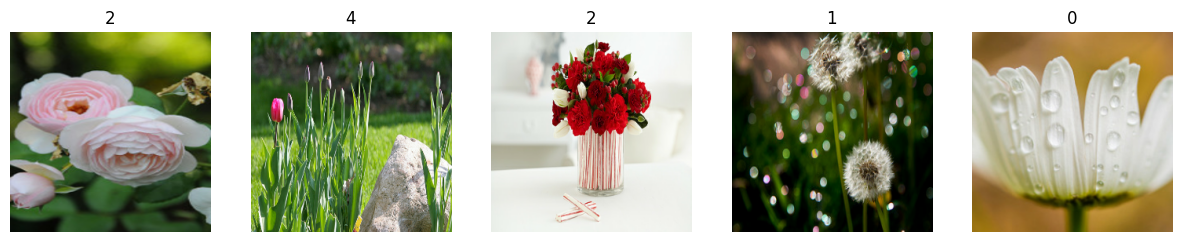

In [10]:
# Printing first five images

class_names = np.unique(y_train)
print(class_names)

# Creating a figure with 5 sub-plots
fig, axs = plt.subplots(1, 5, figsize = (15, 3))

for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].set_title(class_names[y_train[i]])
    axs[i].axis("off")

plt.show()

In [11]:
# Use the to_categorical function from Kears to convert the output data to use One Hot Encoding

y_train_flower = keras.utils.to_categorical(y_train)
y_test_flower = keras.utils.to_categorical(y_test)

In [12]:
# Normalise the images by dividing by 255, so all pixel values lie in the range 0 - 1

x_train_norm = x_train / 255
x_test_norm = x_test / 255

# Recording the width and height of each image, in pixels

width_npix = x_train_norm.shape[1]
height_npix = x_train_norm.shape[2]

# Reshaping my arrays

x_train_norm = x_train_norm.reshape(-1, width_npix, height_npix, 3)
x_test_norm = x_test_norm.reshape(-1, width_npix, height_npix, 3)

# Printing the final shape 
print(x_train_norm.shape)
print(x_test_norm.shape)

(3303, 256, 256, 3)
(367, 256, 256, 3)


In [13]:
# Importing the ImageDataGenerator class from tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining data augmentation parameters

train_datagen = ImageDataGenerator(rotation_range = 20, 
width_shift_range = 0.1, 
height_shift_range = 0.1, 
horizontal_flip = True,
vertical_flip = False, 
shear_range = 0.10, 
zoom_range = 0.10, 
validation_split =0.2 
)

# Fitting the transformation to the training dataset

train_datagen.fit(x_train_norm)

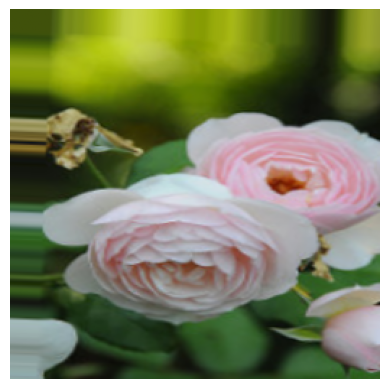

In [14]:
# Applying the random_transform function to the first image in the normalised training set, i.e. x_train_norm[0]

new_image = train_datagen.random_transform(x_train_norm[0])

# Using matplotlib to show the image

plt.imshow(new_image)
plt.gca().axis("off")
plt.show()

In [15]:
# Importing the Sequential model from Tensor Flow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creating an instance of the Sequential class.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses max pooling, with a pool size of 2x2

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer, again with a kernel size of 3x3 and the relu activation function but now with 64 filters

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Adding a second max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Adding a third max pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output to a 1-dimensional array

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer

model.add(Dropout(0.5))

# Using the softmax activation function to represent the probabilities for each of the 5 class labels

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
# Importing Adam class from the Keras library

from keras.optimizers import Adam

# Creating an instance of the Adam class and seting the learning rate

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model

model.compile(adam_optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [17]:
# Training the data

# Specifying the batch size

batch_size = 32

# Fitting the model and recording the history of the fit

# Training the model for 20 epochs

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "validation"))

Epoch 1/20
83/83 [==============================] - 88s 1s/step - loss: 1.3919 - accuracy: 0.3905 - val_loss: 1.1759 - val_accuracy: 0.4697
Epoch 2/20
83/83 [==============================] - 87s 1s/step - loss: 1.2169 - accuracy: 0.4801 - val_loss: 1.1046 - val_accuracy: 0.5530
Epoch 3/20
83/83 [==============================] - 87s 1s/step - loss: 1.1248 - accuracy: 0.5380 - val_loss: 0.9398 - val_accuracy: 0.6288
Epoch 4/20
83/83 [==============================] - 88s 1s/step - loss: 1.0688 - accuracy: 0.5793 - val_loss: 0.9749 - val_accuracy: 0.6106
Epoch 5/20
83/83 [==============================] - 87s 1s/step - loss: 0.9927 - accuracy: 0.6118 - val_loss: 0.8988 - val_accuracy: 0.6227
Epoch 6/20
83/83 [==============================] - 87s 1s/step - loss: 0.9747 - accuracy: 0.6198 - val_loss: 0.8579 - val_accuracy: 0.6545
Epoch 7/20
83/83 [==============================] - 86s 1s/step - loss: 0.9291 - accuracy: 0.6428 - val_loss: 0.8810 - val_accuracy: 0.6606
Epoch 8/20
83/83 [==

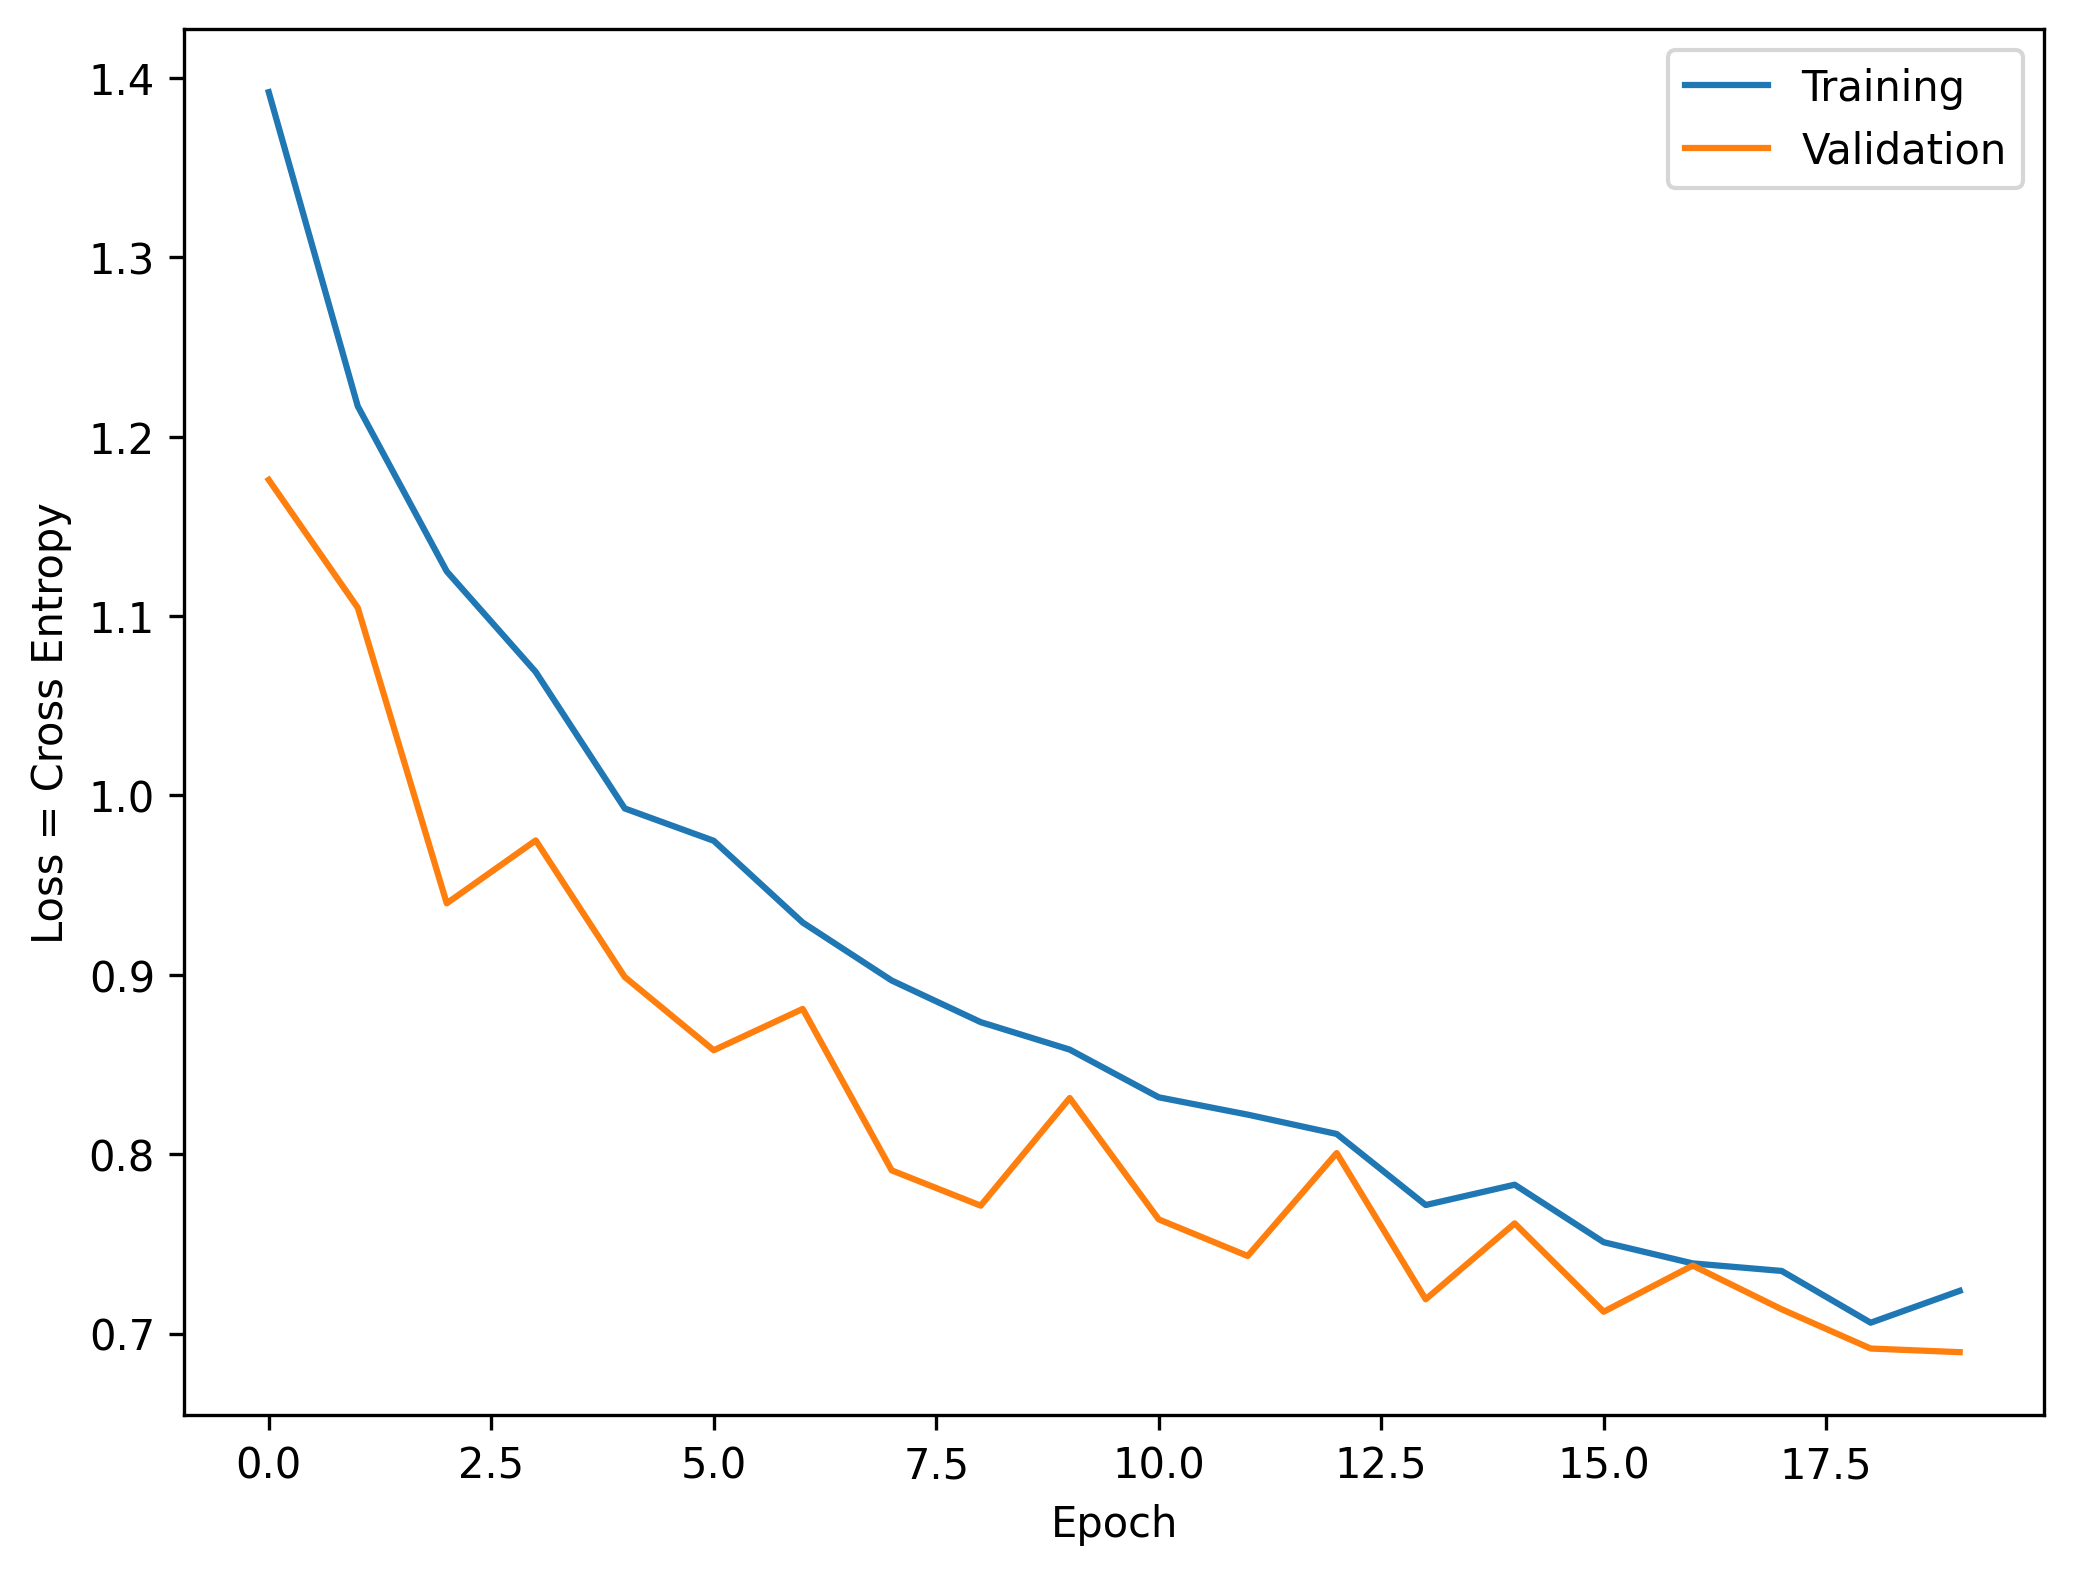

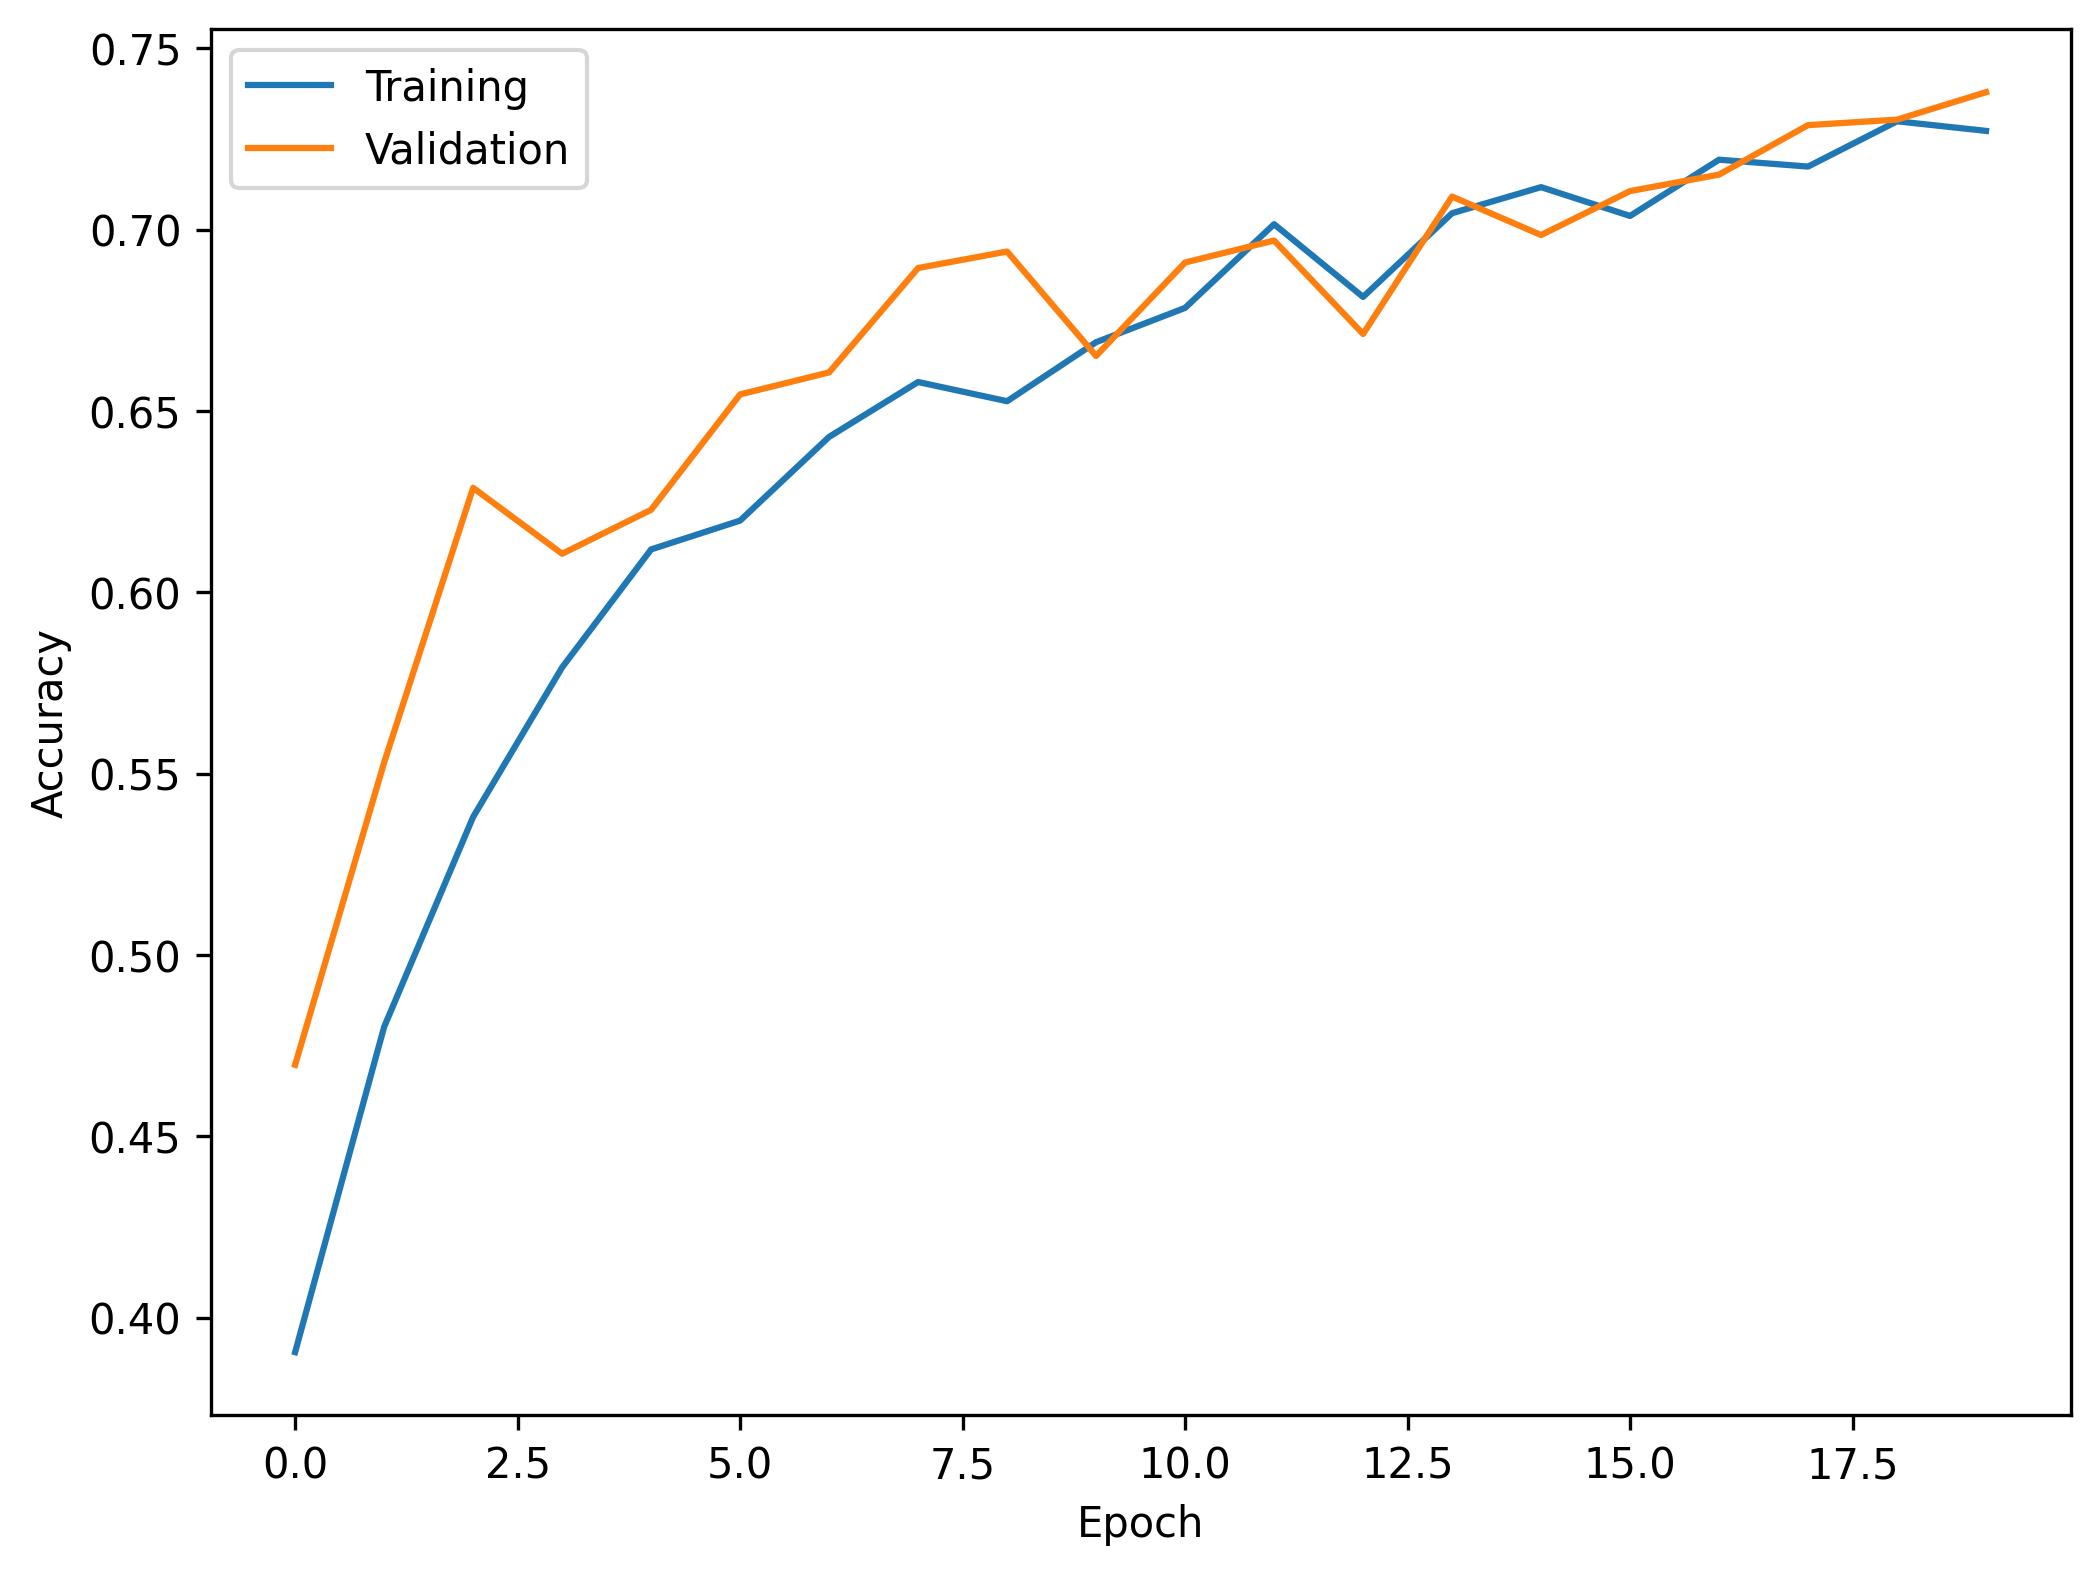

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 3s 210ms/step


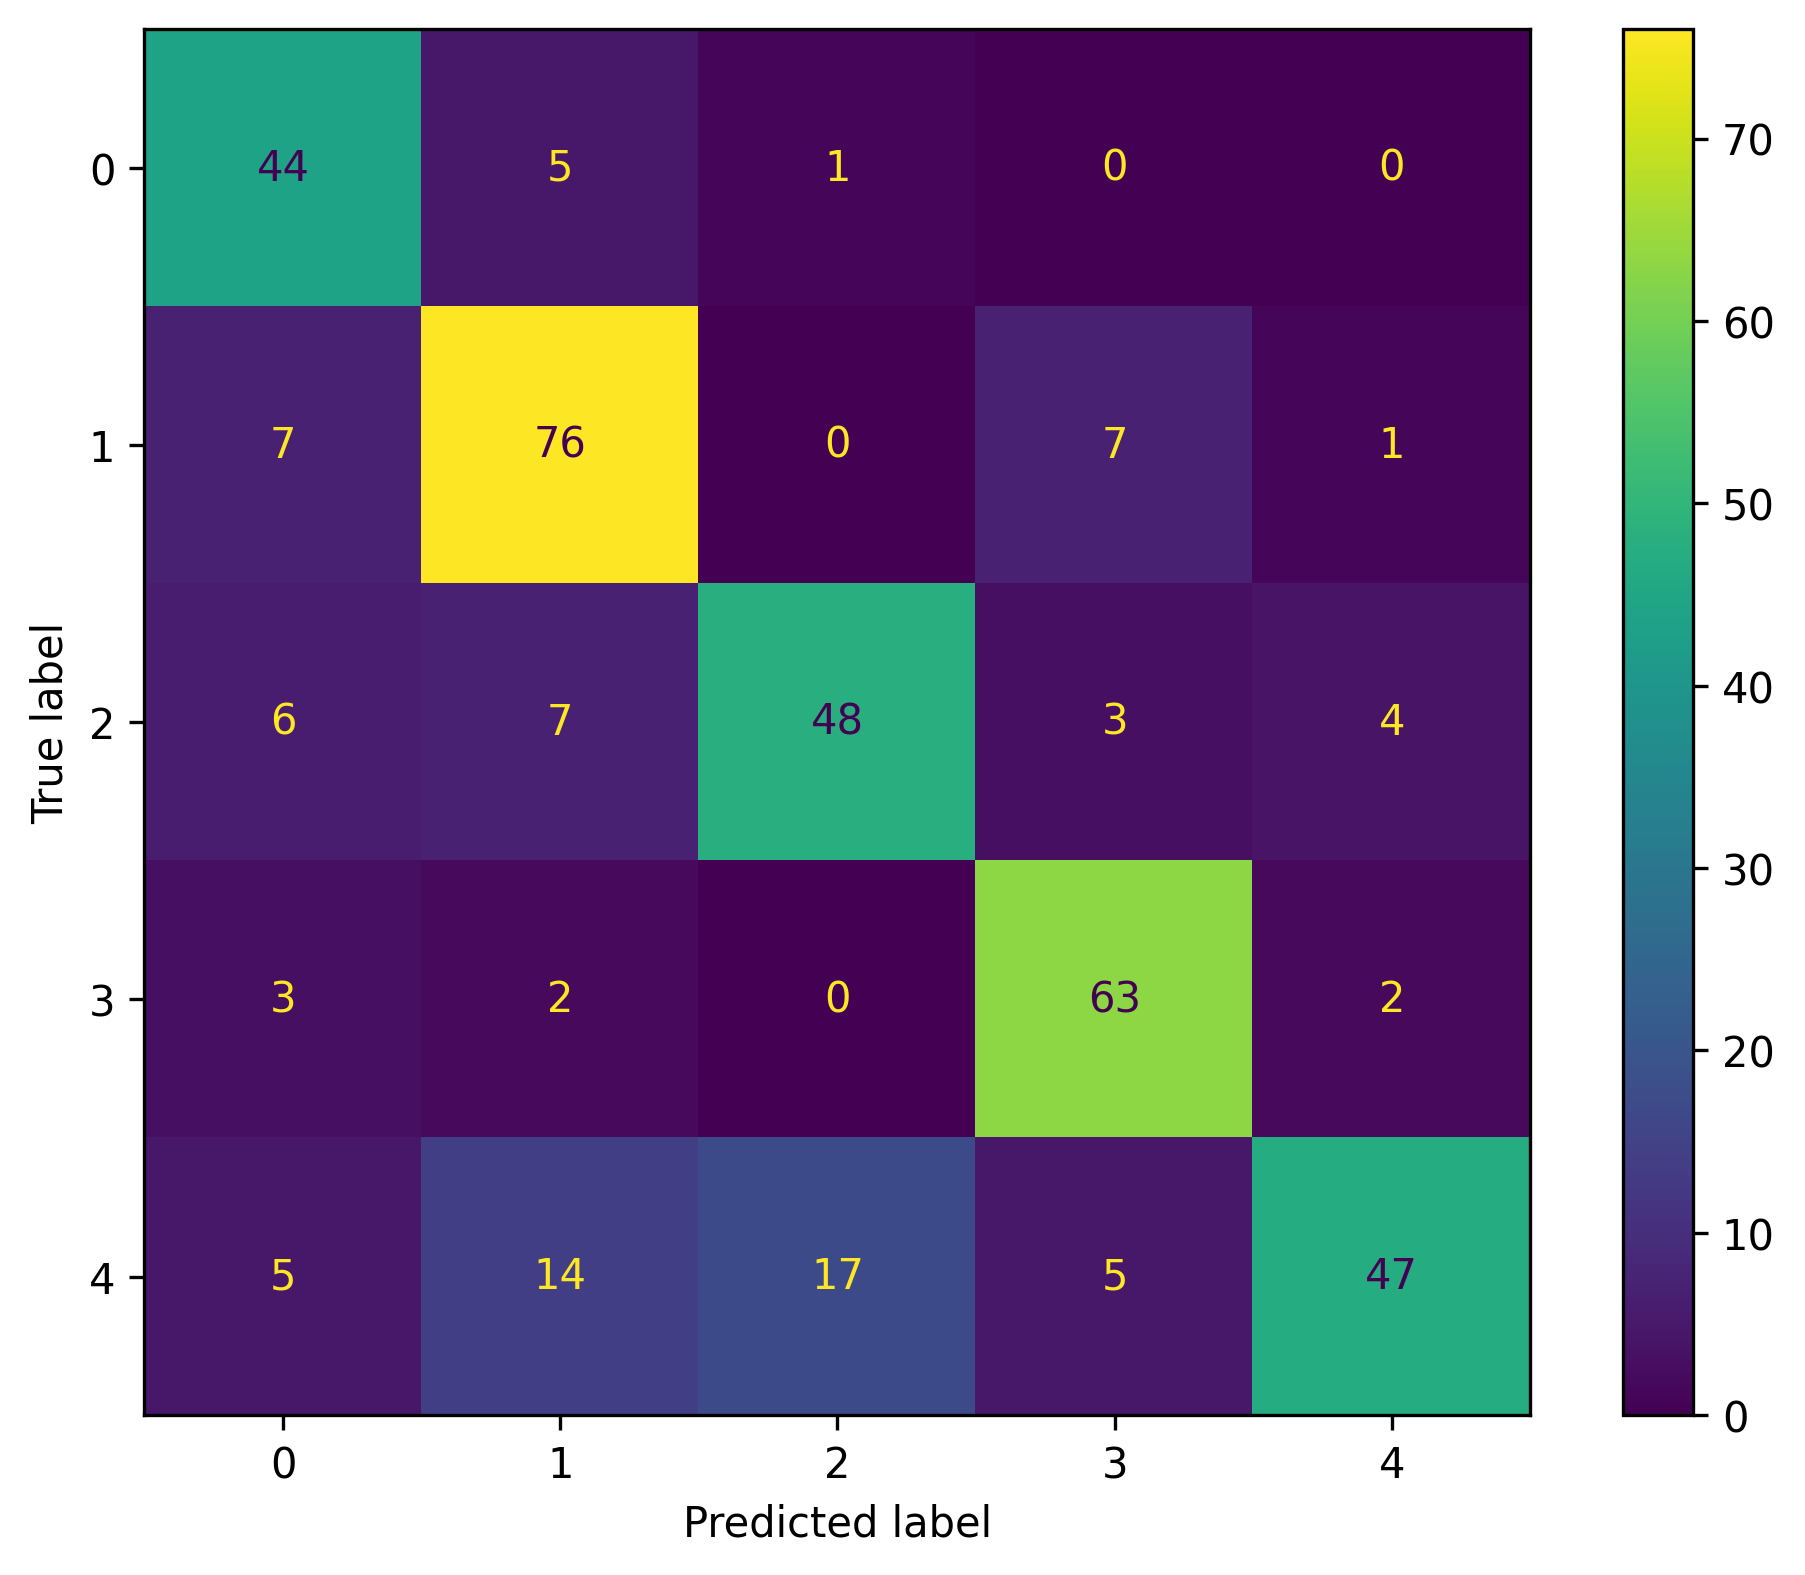

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        50
           1       0.73      0.84      0.78        91
           2       0.73      0.71      0.72        68
           3       0.81      0.90      0.85        70
           4       0.87      0.53      0.66        88

    accuracy                           0.76       367
   macro avg       0.76      0.77      0.75       367
weighted avg       0.77      0.76      0.75       367



In [18]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot
plt.show()


# Plotting the training and validation accuracy versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


# Names of each label

display_labels = ["%d" % (i, ) for i in range(5)]

# Numerical index of each label
numerical_labels = [i for i in range(5)]

# Checking the label strings and the numerical labels to make sure they line up.

print(display_labels)
print(numerical_labels)


# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Using the argmax() function to determine the index of the label with the highest probability for each row in y_pred

y_pred_class = np.argmax(y_pred, axis=1)


# Importing the functions that I will need from sklearn to create and plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot
plt.show()



# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Increasing Batch Size to 128

In [19]:
# Creating an instance of the Sequential class.

model = Sequential()

# Adding the first Convolutional layer

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses max pooling, with a pool size of 2x2

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer, again with a kernel size of 3x3 and the relu activation function but now with 64 filters

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Adding a second max pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer, now with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Adding a third max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output to a 1-dimensional array

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding to the 5 output classes. Using the softmax activation function, which means the resulting output values will represent the probabilitiesfor each of the 5 class labels.

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [20]:
# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model. 

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))


Epoch 1/20
21/21 [==============================] - 91s 4s/step - loss: 1.6719 - accuracy: 0.2902 - val_loss: 1.3131 - val_accuracy: 0.4909
Epoch 2/20
21/21 [==============================] - 87s 4s/step - loss: 1.3257 - accuracy: 0.4374 - val_loss: 1.1869 - val_accuracy: 0.5333
Epoch 3/20
21/21 [==============================] - 89s 4s/step - loss: 1.2289 - accuracy: 0.4767 - val_loss: 1.0892 - val_accuracy: 0.5788
Epoch 4/20
21/21 [==============================] - 87s 4s/step - loss: 1.1857 - accuracy: 0.4994 - val_loss: 1.0262 - val_accuracy: 0.5500
Epoch 5/20
21/21 [==============================] - 87s 4s/step - loss: 1.1238 - accuracy: 0.5376 - val_loss: 0.9879 - val_accuracy: 0.6318
Epoch 6/20
21/21 [==============================] - 85s 4s/step - loss: 1.1268 - accuracy: 0.5384 - val_loss: 1.0536 - val_accuracy: 0.5742
Epoch 7/20
21/21 [==============================] - 85s 4s/step - loss: 1.0893 - accuracy: 0.5634 - val_loss: 0.9697 - val_accuracy: 0.6303
Epoch 8/20
21/21 [==

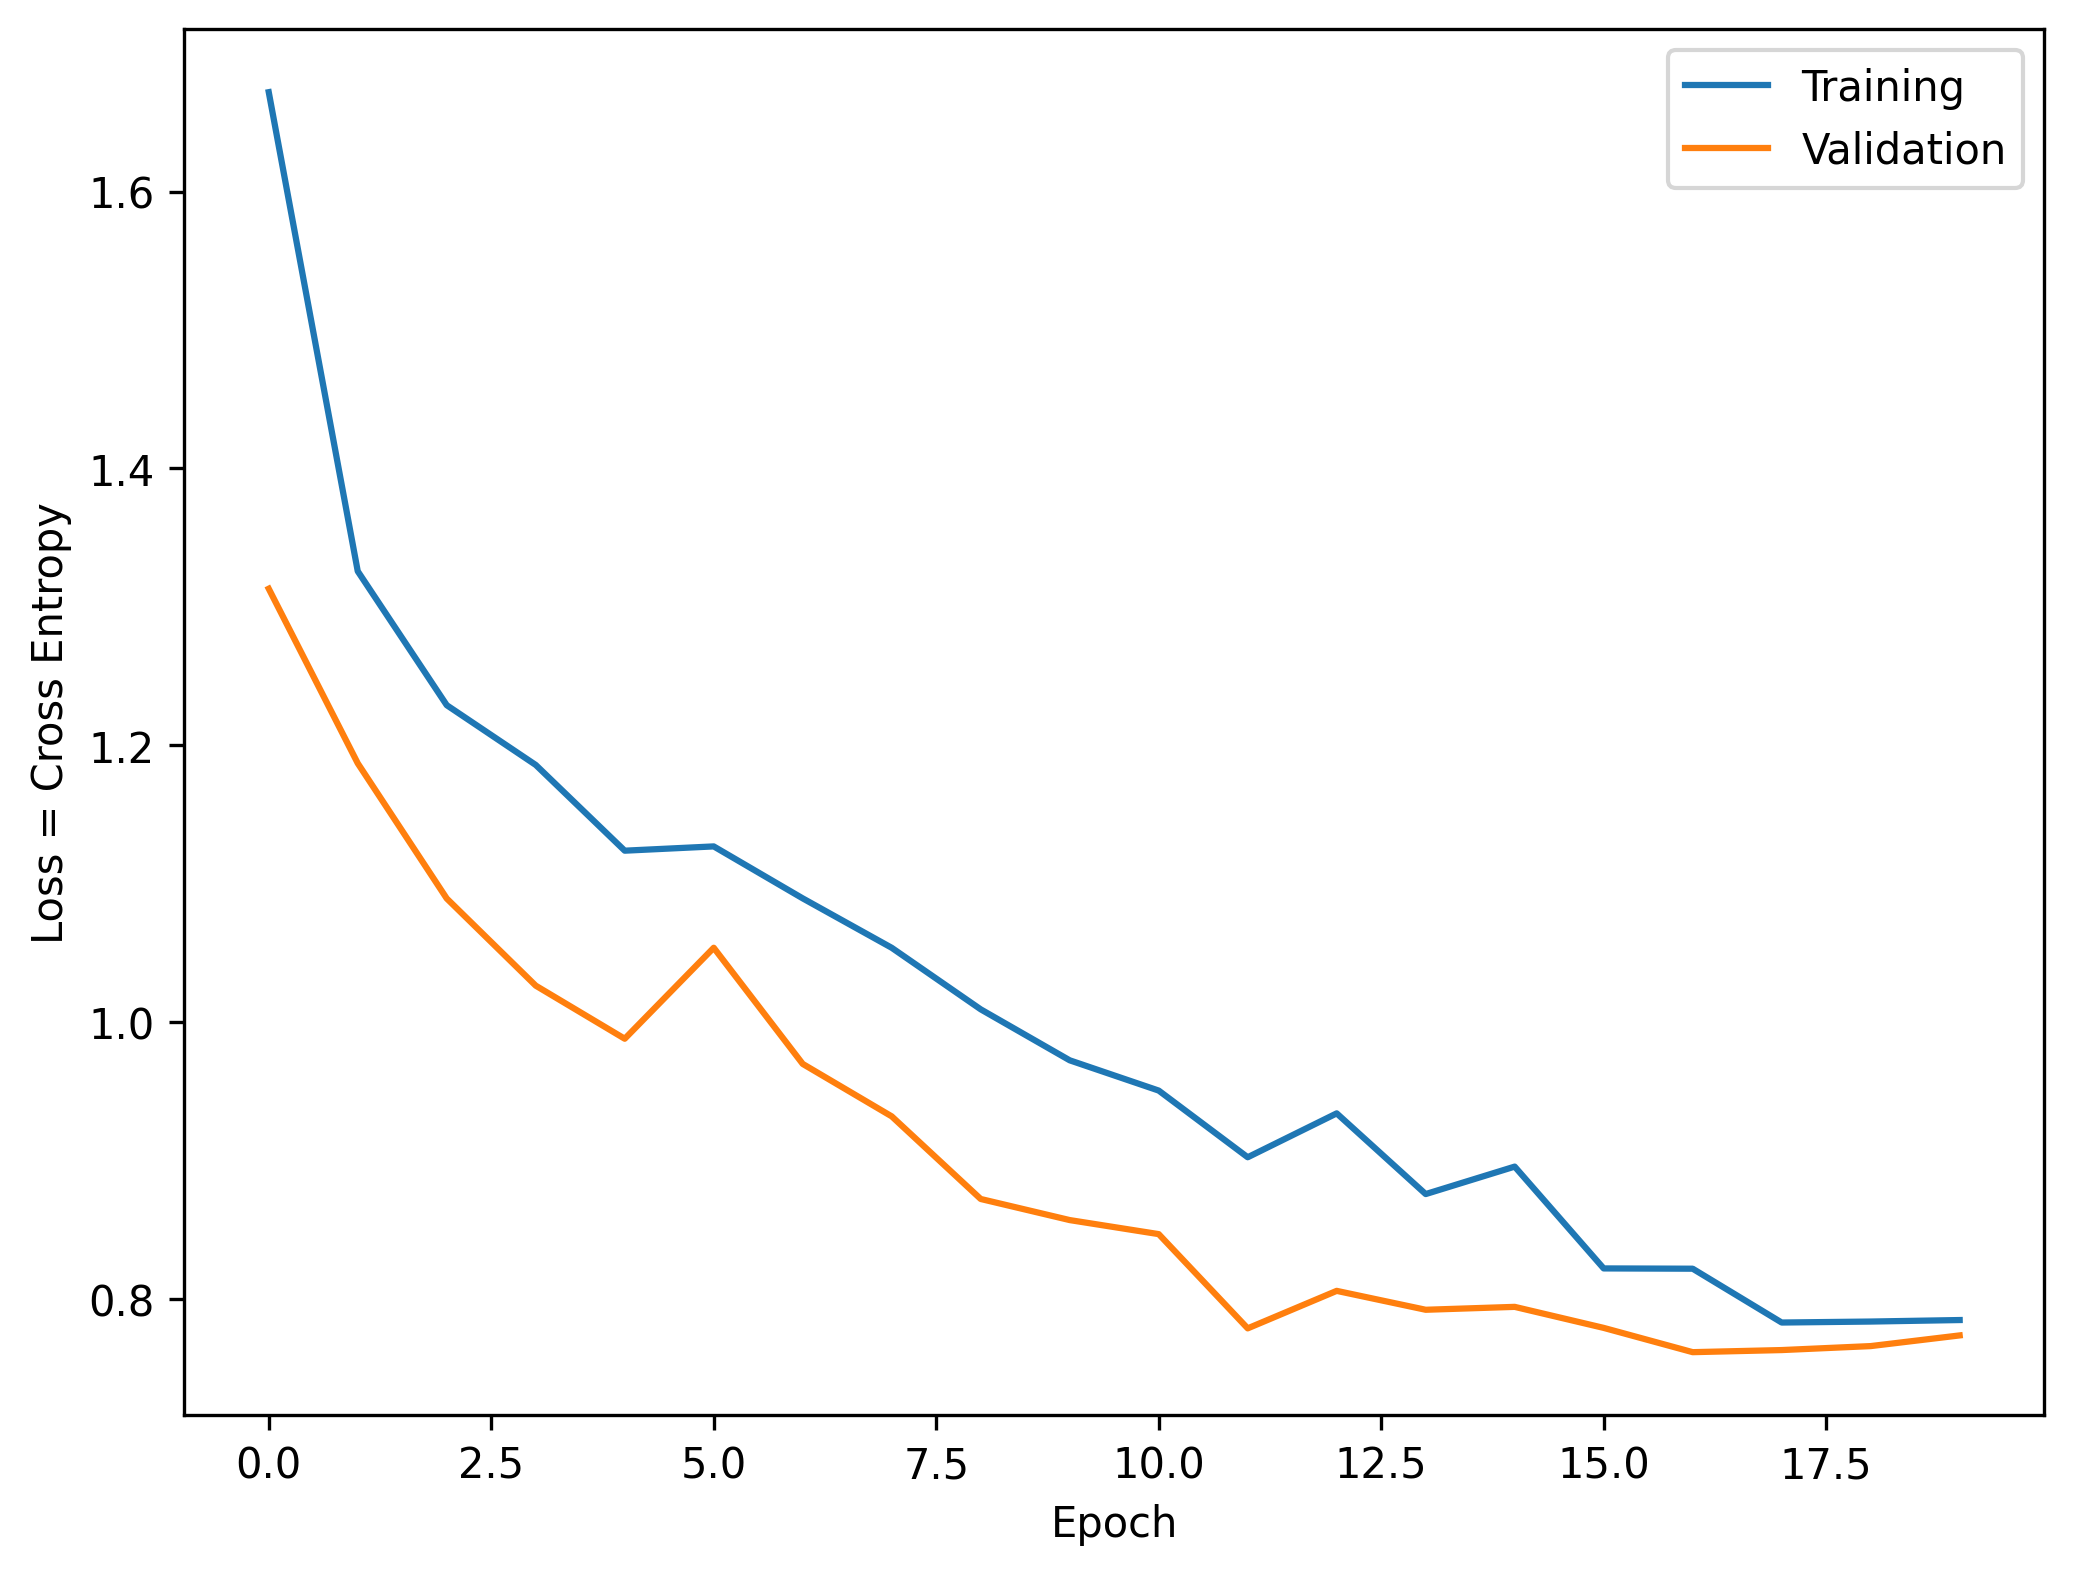

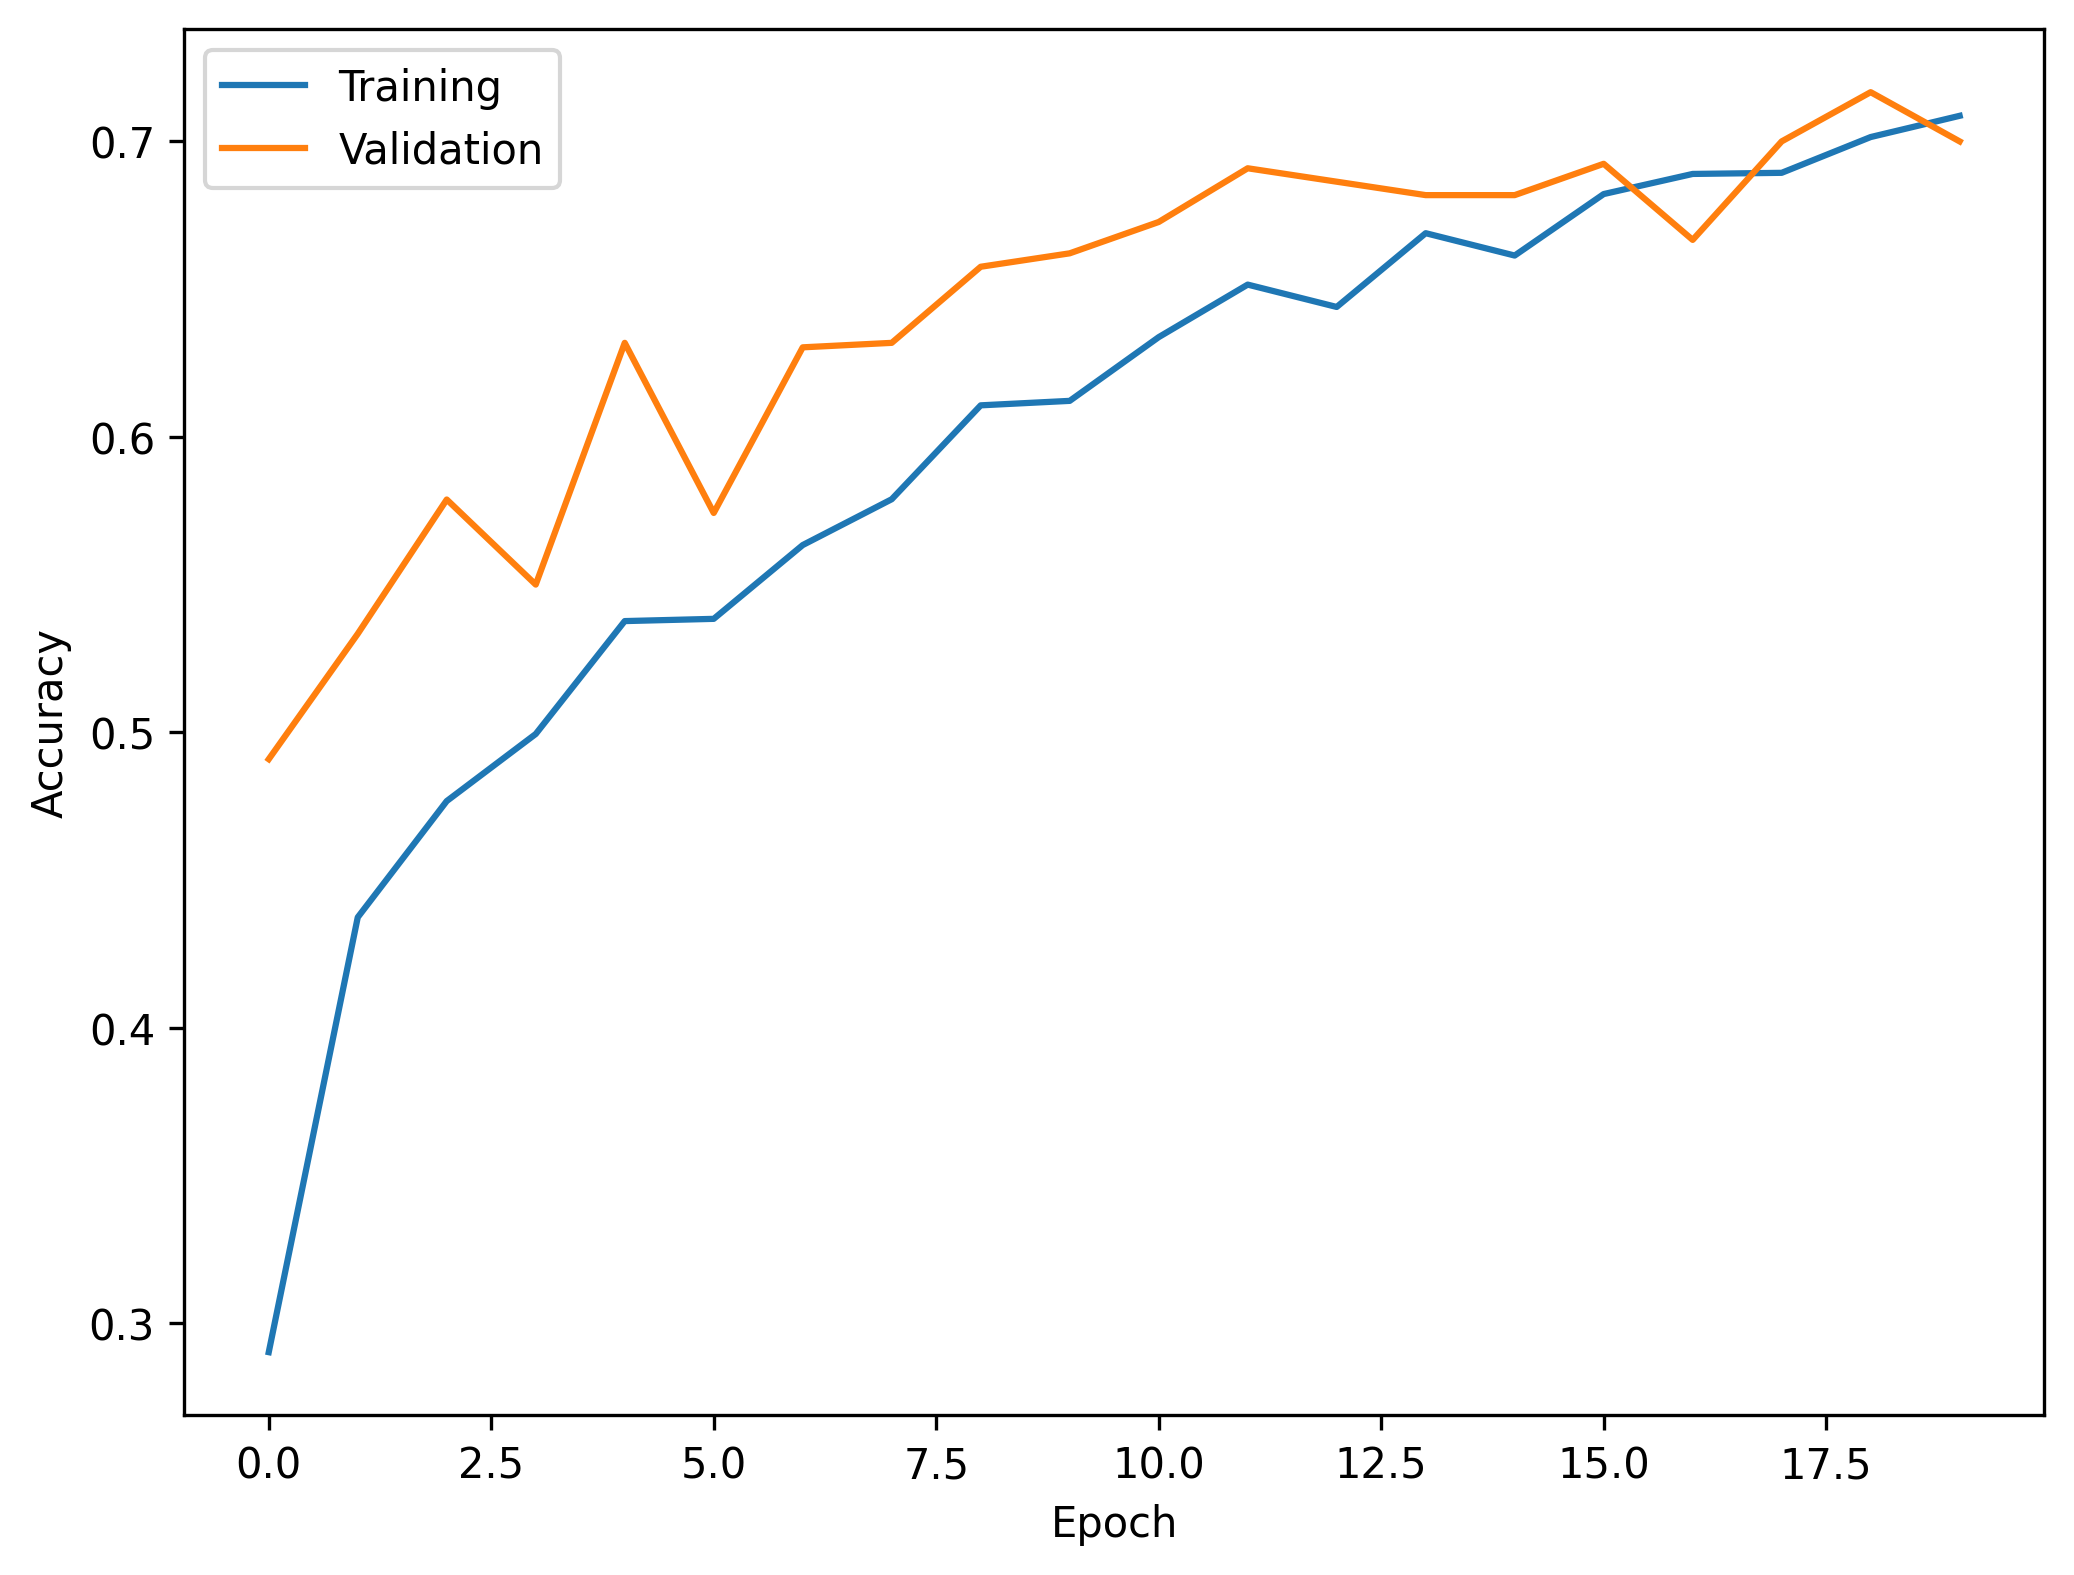

12/12 [==============================] - 3s 204ms/step


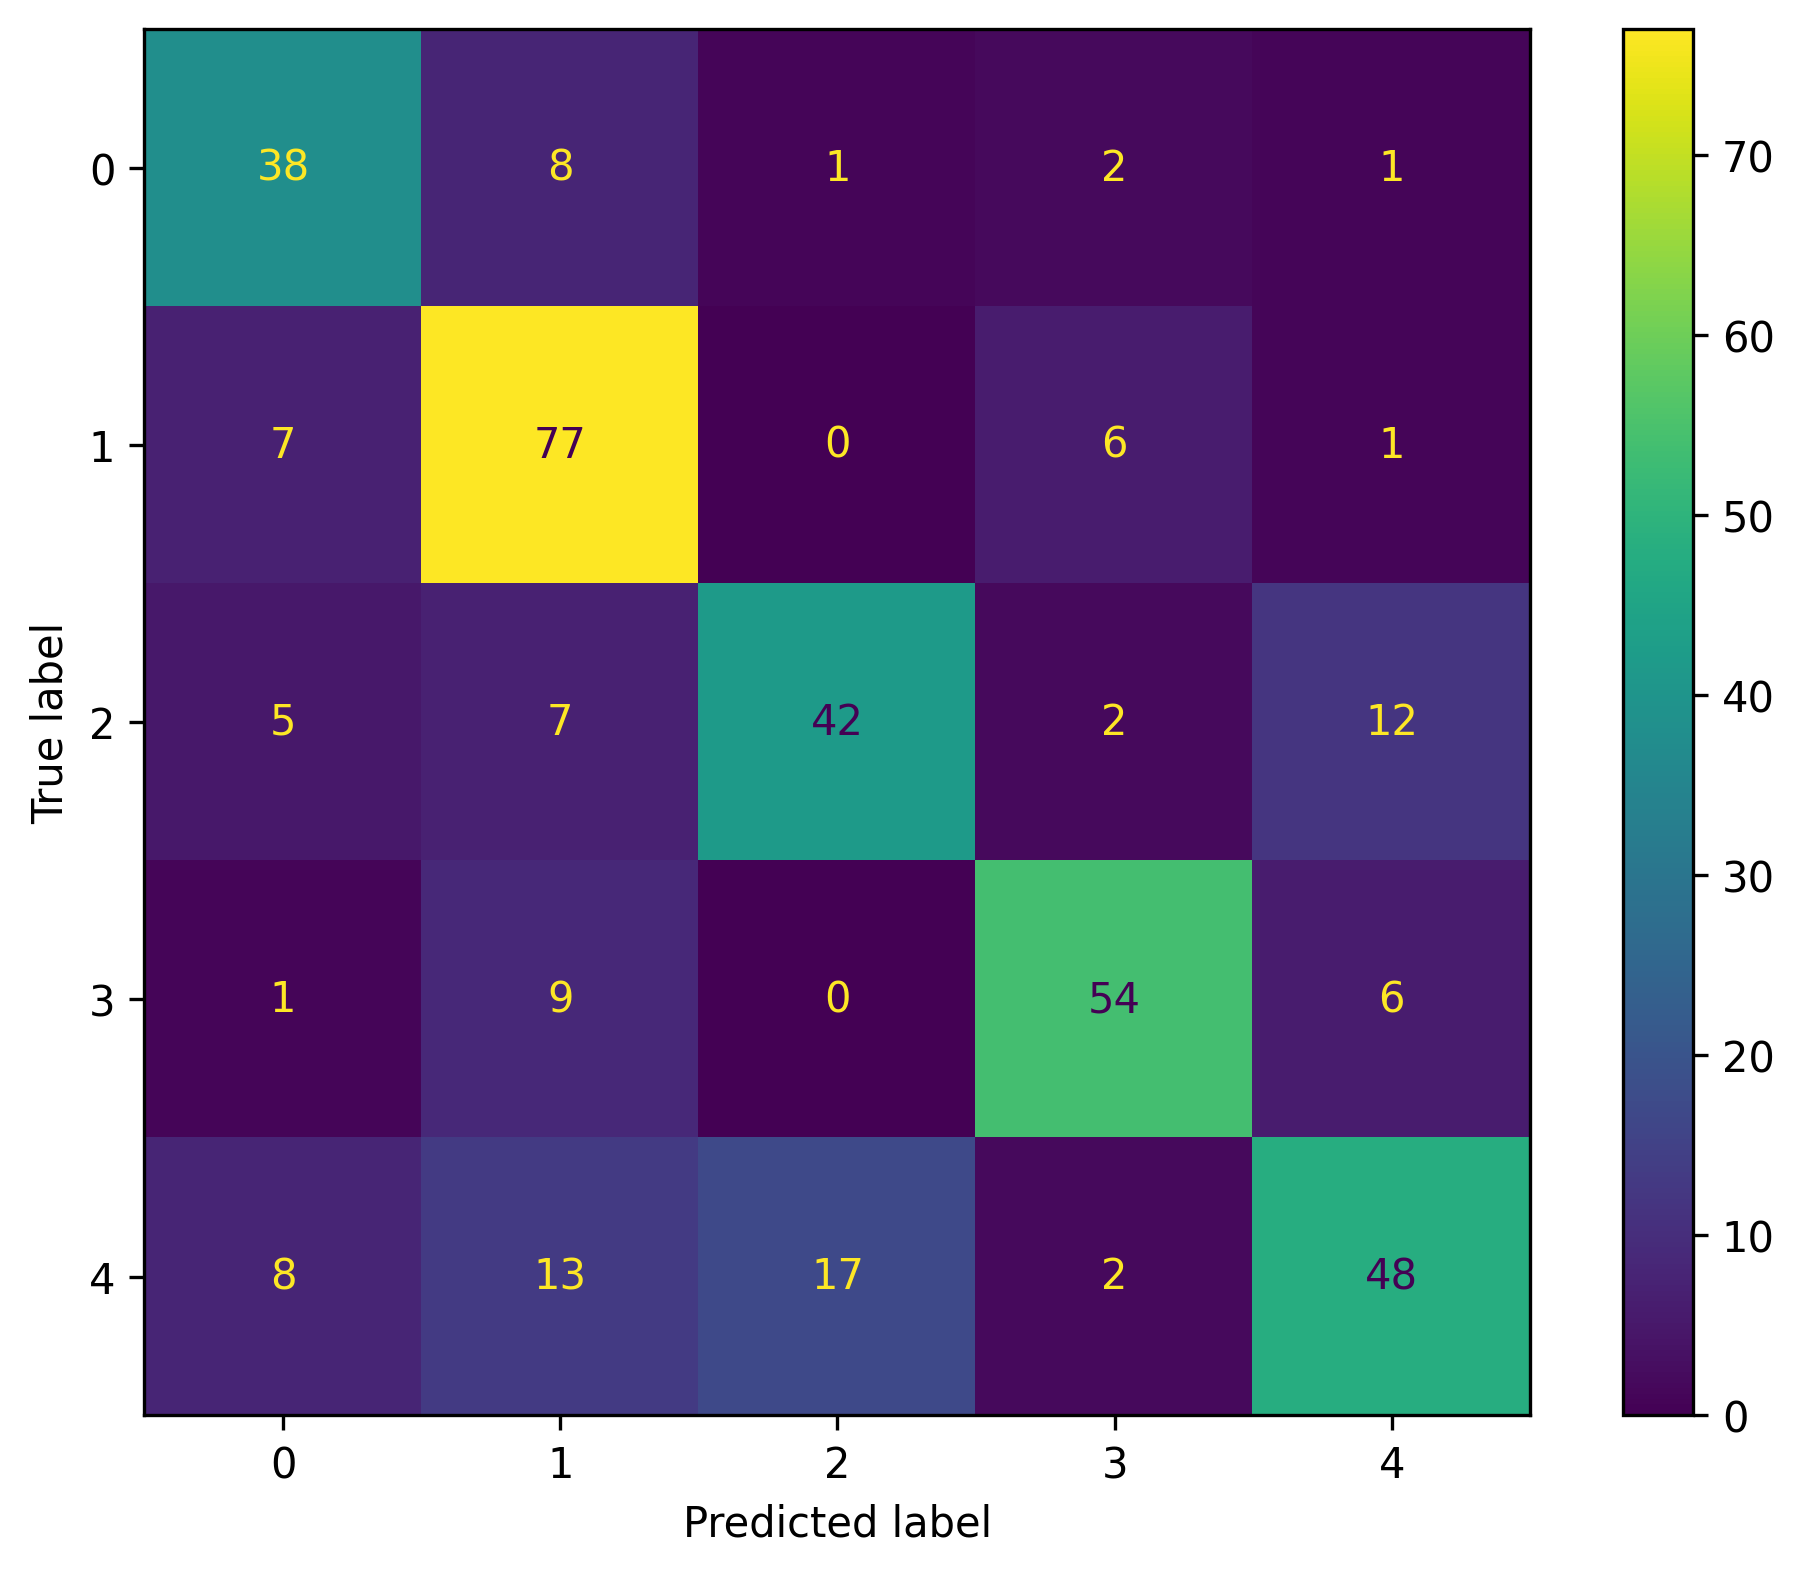

              precision    recall  f1-score   support

           0       0.64      0.76      0.70        50
           1       0.68      0.85      0.75        91
           2       0.70      0.62      0.66        68
           3       0.82      0.77      0.79        70
           4       0.71      0.55      0.62        88

    accuracy                           0.71       367
   macro avg       0.71      0.71      0.70       367
weighted avg       0.71      0.71      0.70       367



In [21]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Varying the droput rate (Using 0.25)

In [22]:
# Creating an instance of the Sequential class.

model = Sequential()

# Adding the first Convolutional layer

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses max pooling, with a pool size of 2x2

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer, again with a kernel size of 3x3 and the relu activation function but now with 64 filters

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Adding a second max pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer, now with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Adding a third max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output to a 1-dimensional array

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 25% to the dense layer.

model.add(Dropout(0.25))

# The output layer needs 5 units, corresponding to the 5 output classes. Using the softmax activation function, which means the resulting output values will represent the probabilitiesfor each of the 5 class labels.

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()



# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model. 

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

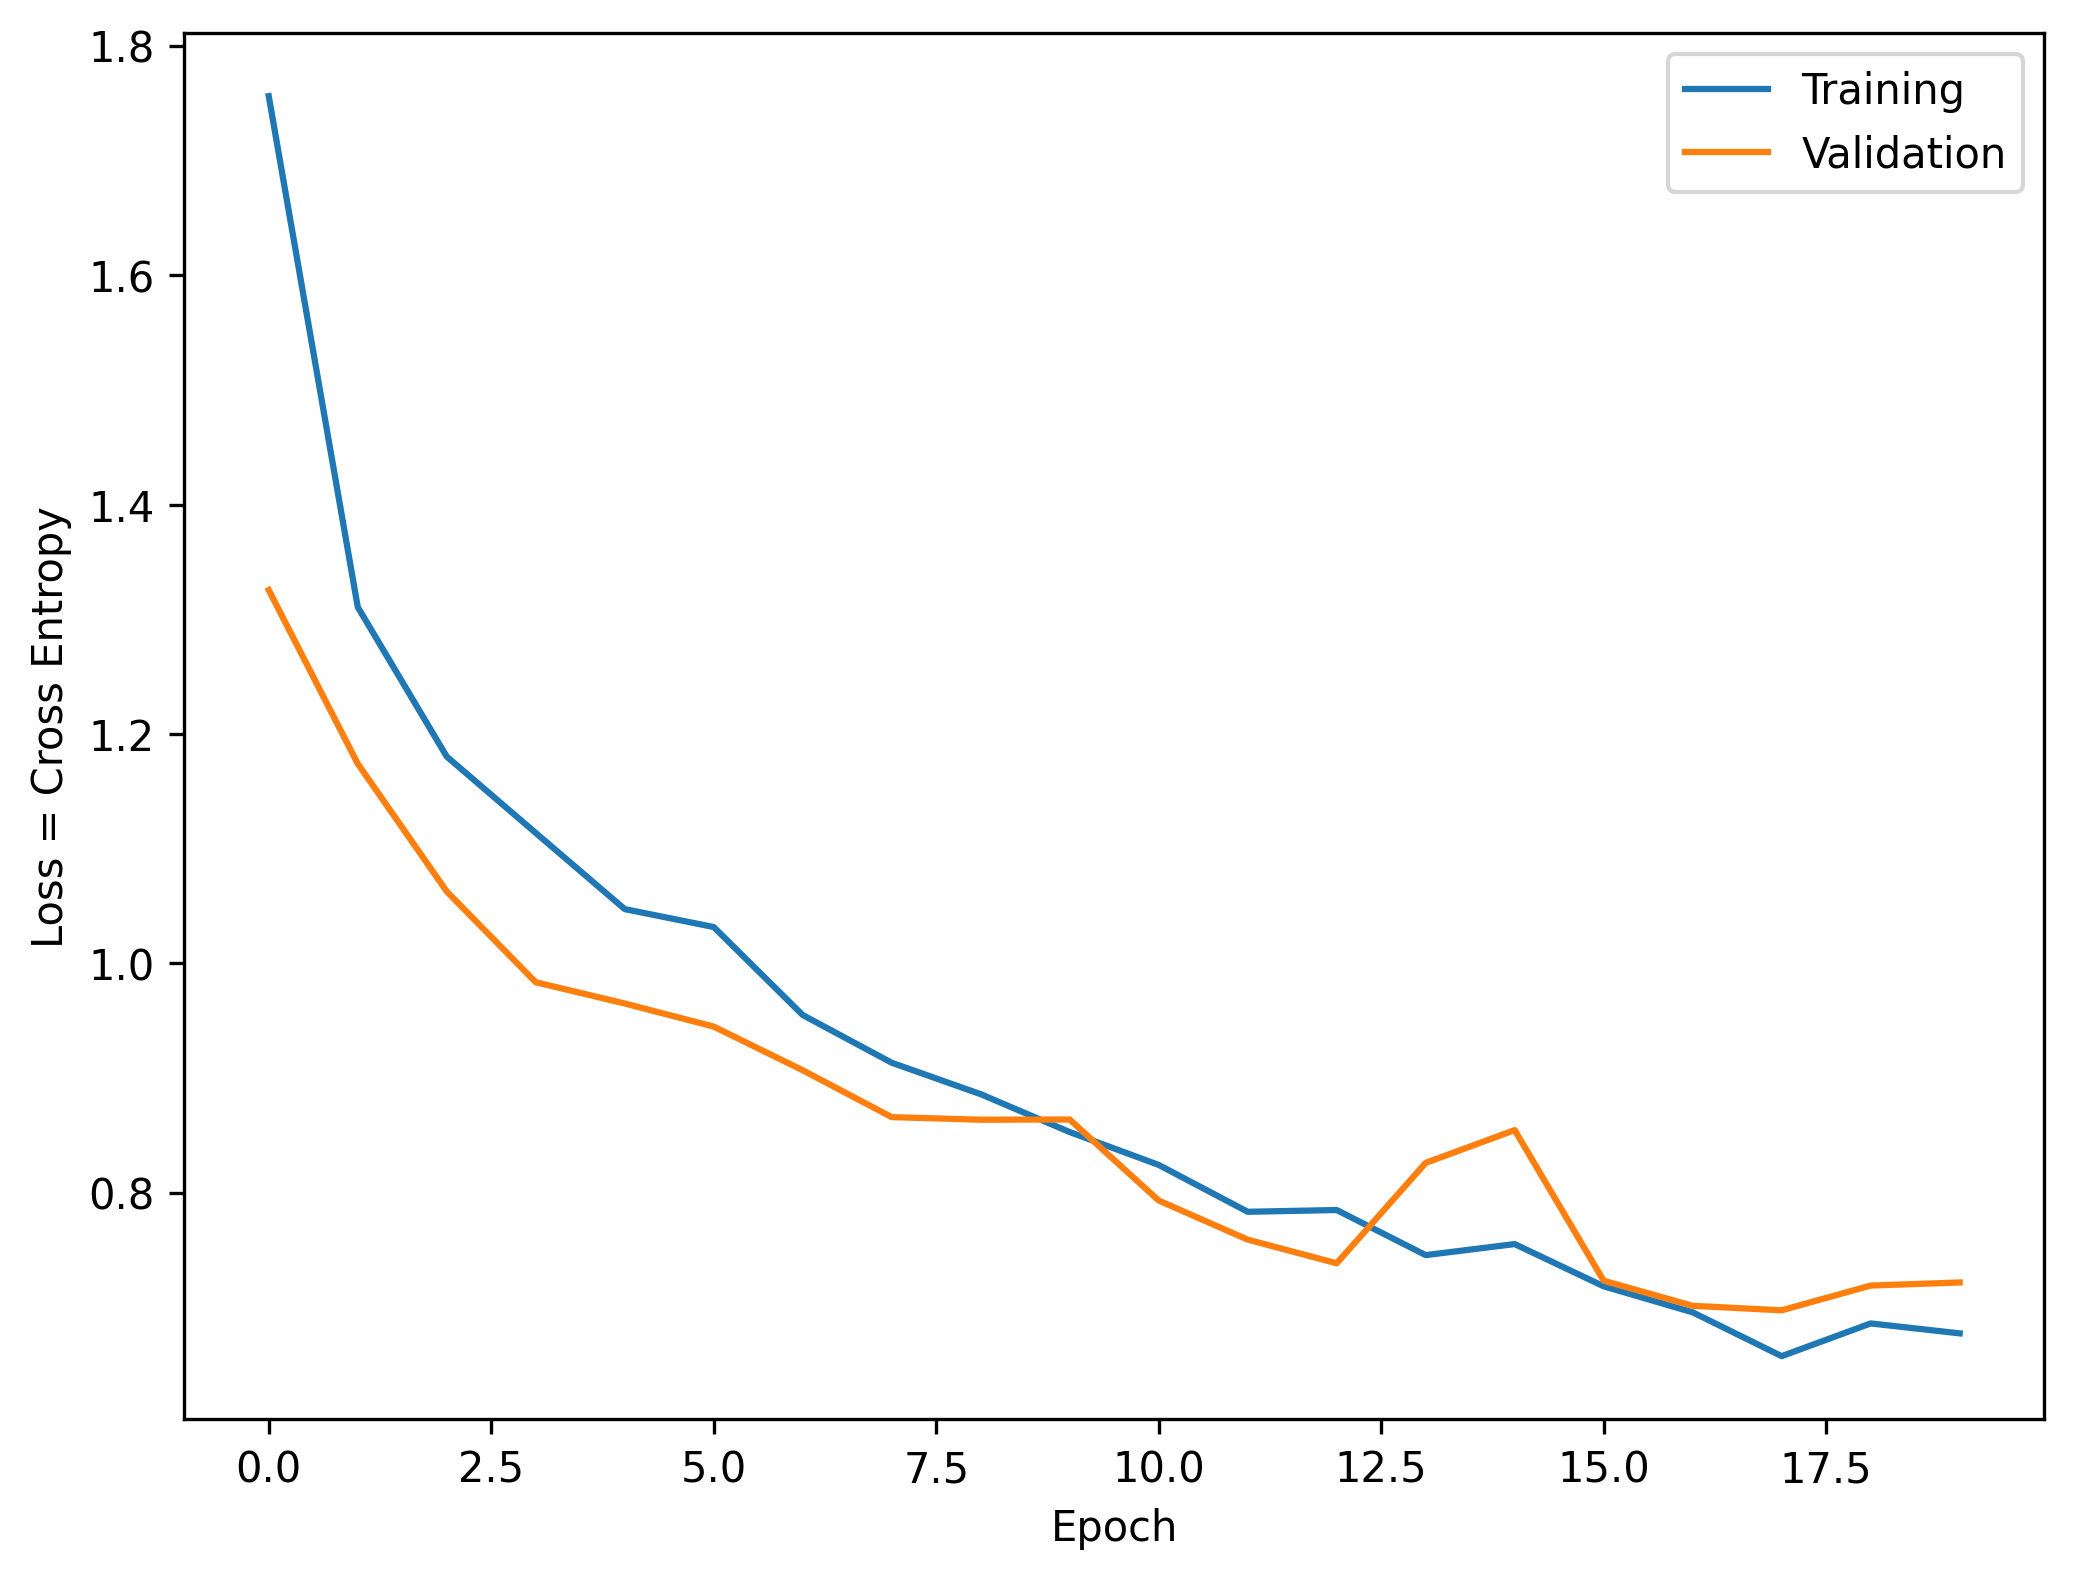

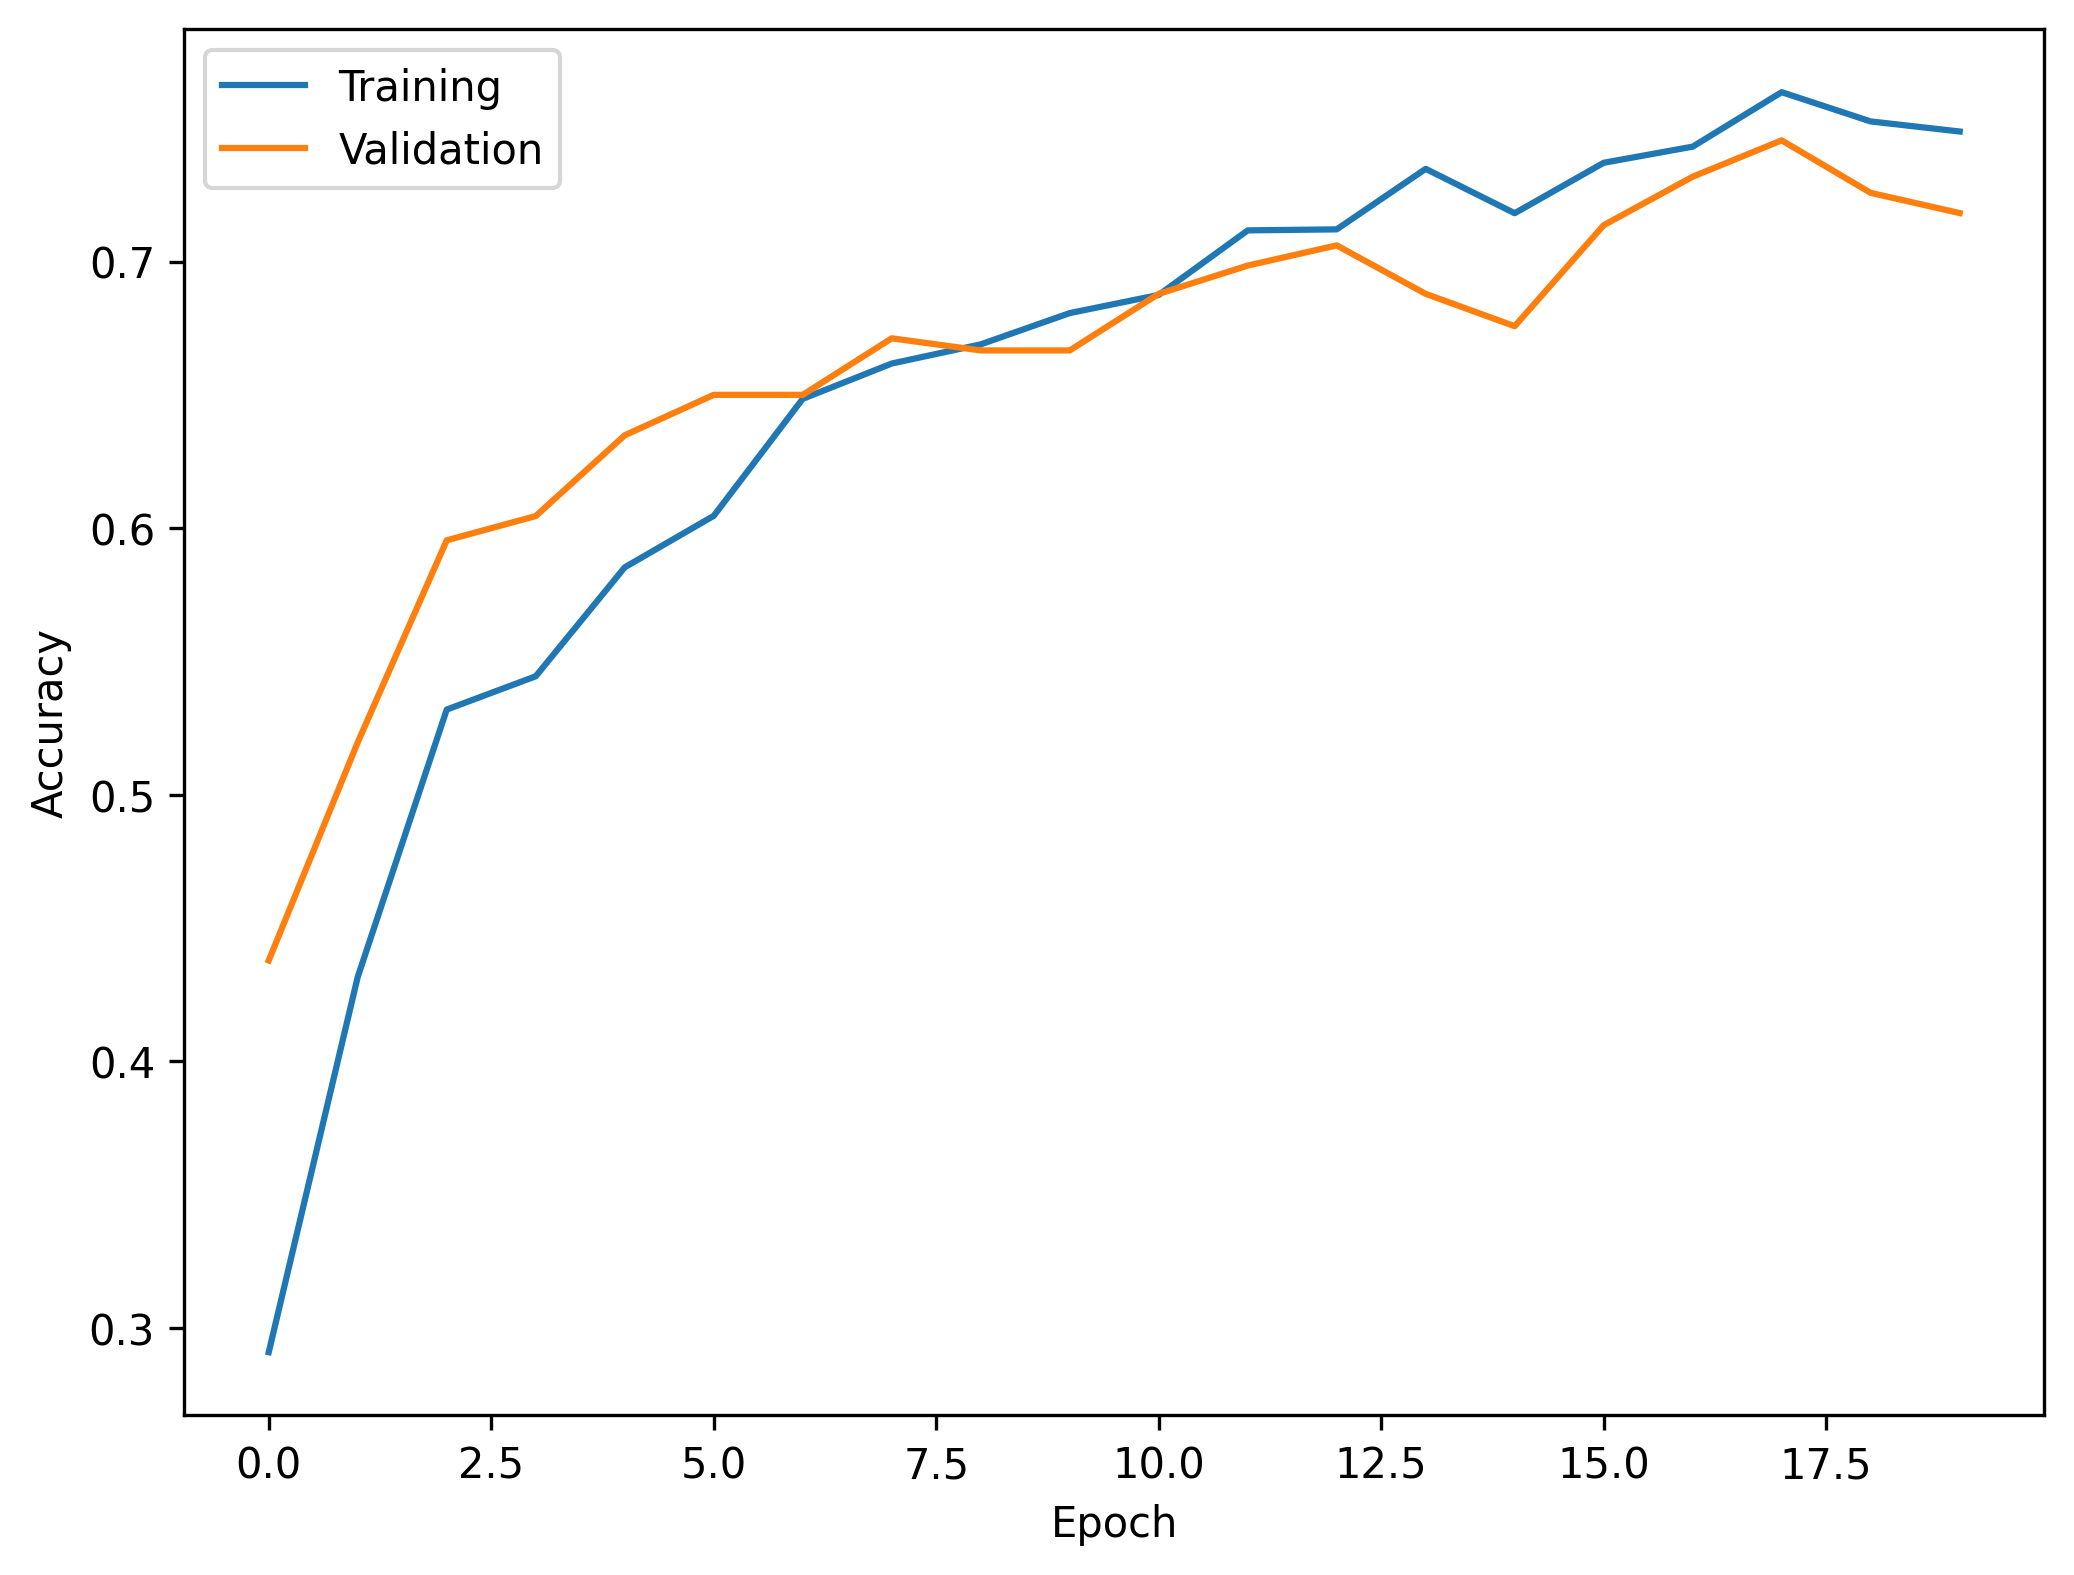

12/12 [==============================] - 3s 209ms/step


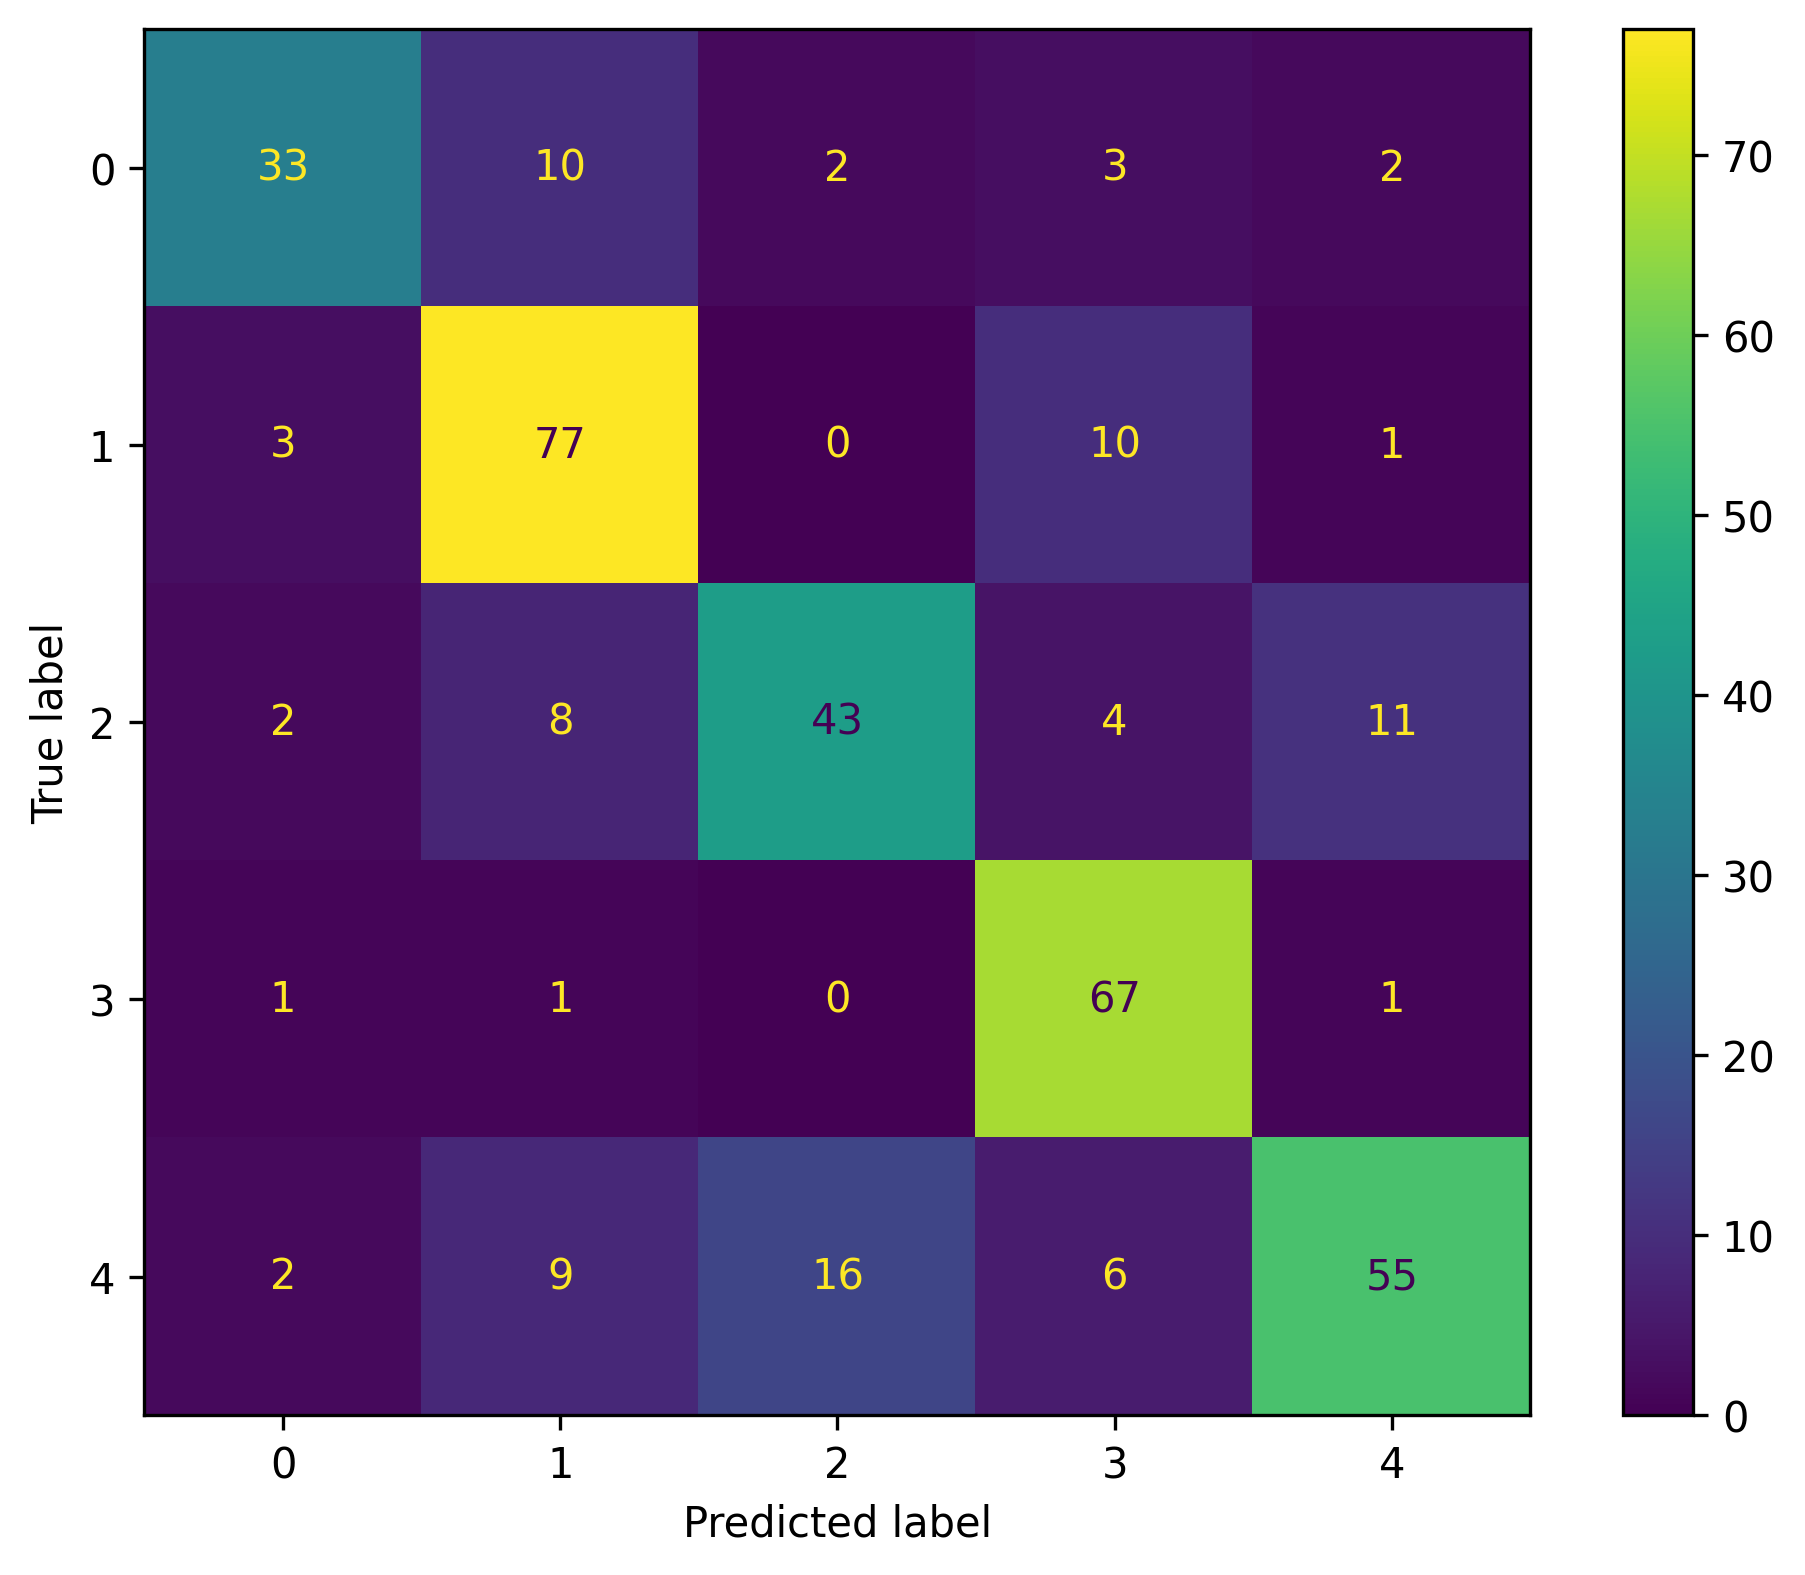

              precision    recall  f1-score   support

           0       0.80      0.66      0.73        50
           1       0.73      0.85      0.79        91
           2       0.70      0.63      0.67        68
           3       0.74      0.96      0.84        70
           4       0.79      0.62      0.70        88

    accuracy                           0.75       367
   macro avg       0.75      0.74      0.74       367
weighted avg       0.75      0.75      0.74       367



In [23]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Introducing early stopping (Patience = 10)

In [24]:
# Creating an instance of the Sequential class.

model = Sequential()

# Adding early stoppage with patience = 10

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 10)

# Adding the first Convolutional layer

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses max pooling, with a pool size of 2x2

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer, again with a kernel size of 3x3 and the relu activation function but now with 64 filters

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Adding a second max pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer, now with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Adding a third max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output to a 1-dimensional array

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.50))

# The output layer needs 5 units, corresponding to the 5 output classes. Using the softmax activation function, which means the resulting output values will represent the probabilitiesfor each of the 5 class labels.

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()



# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model. 

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 128)      

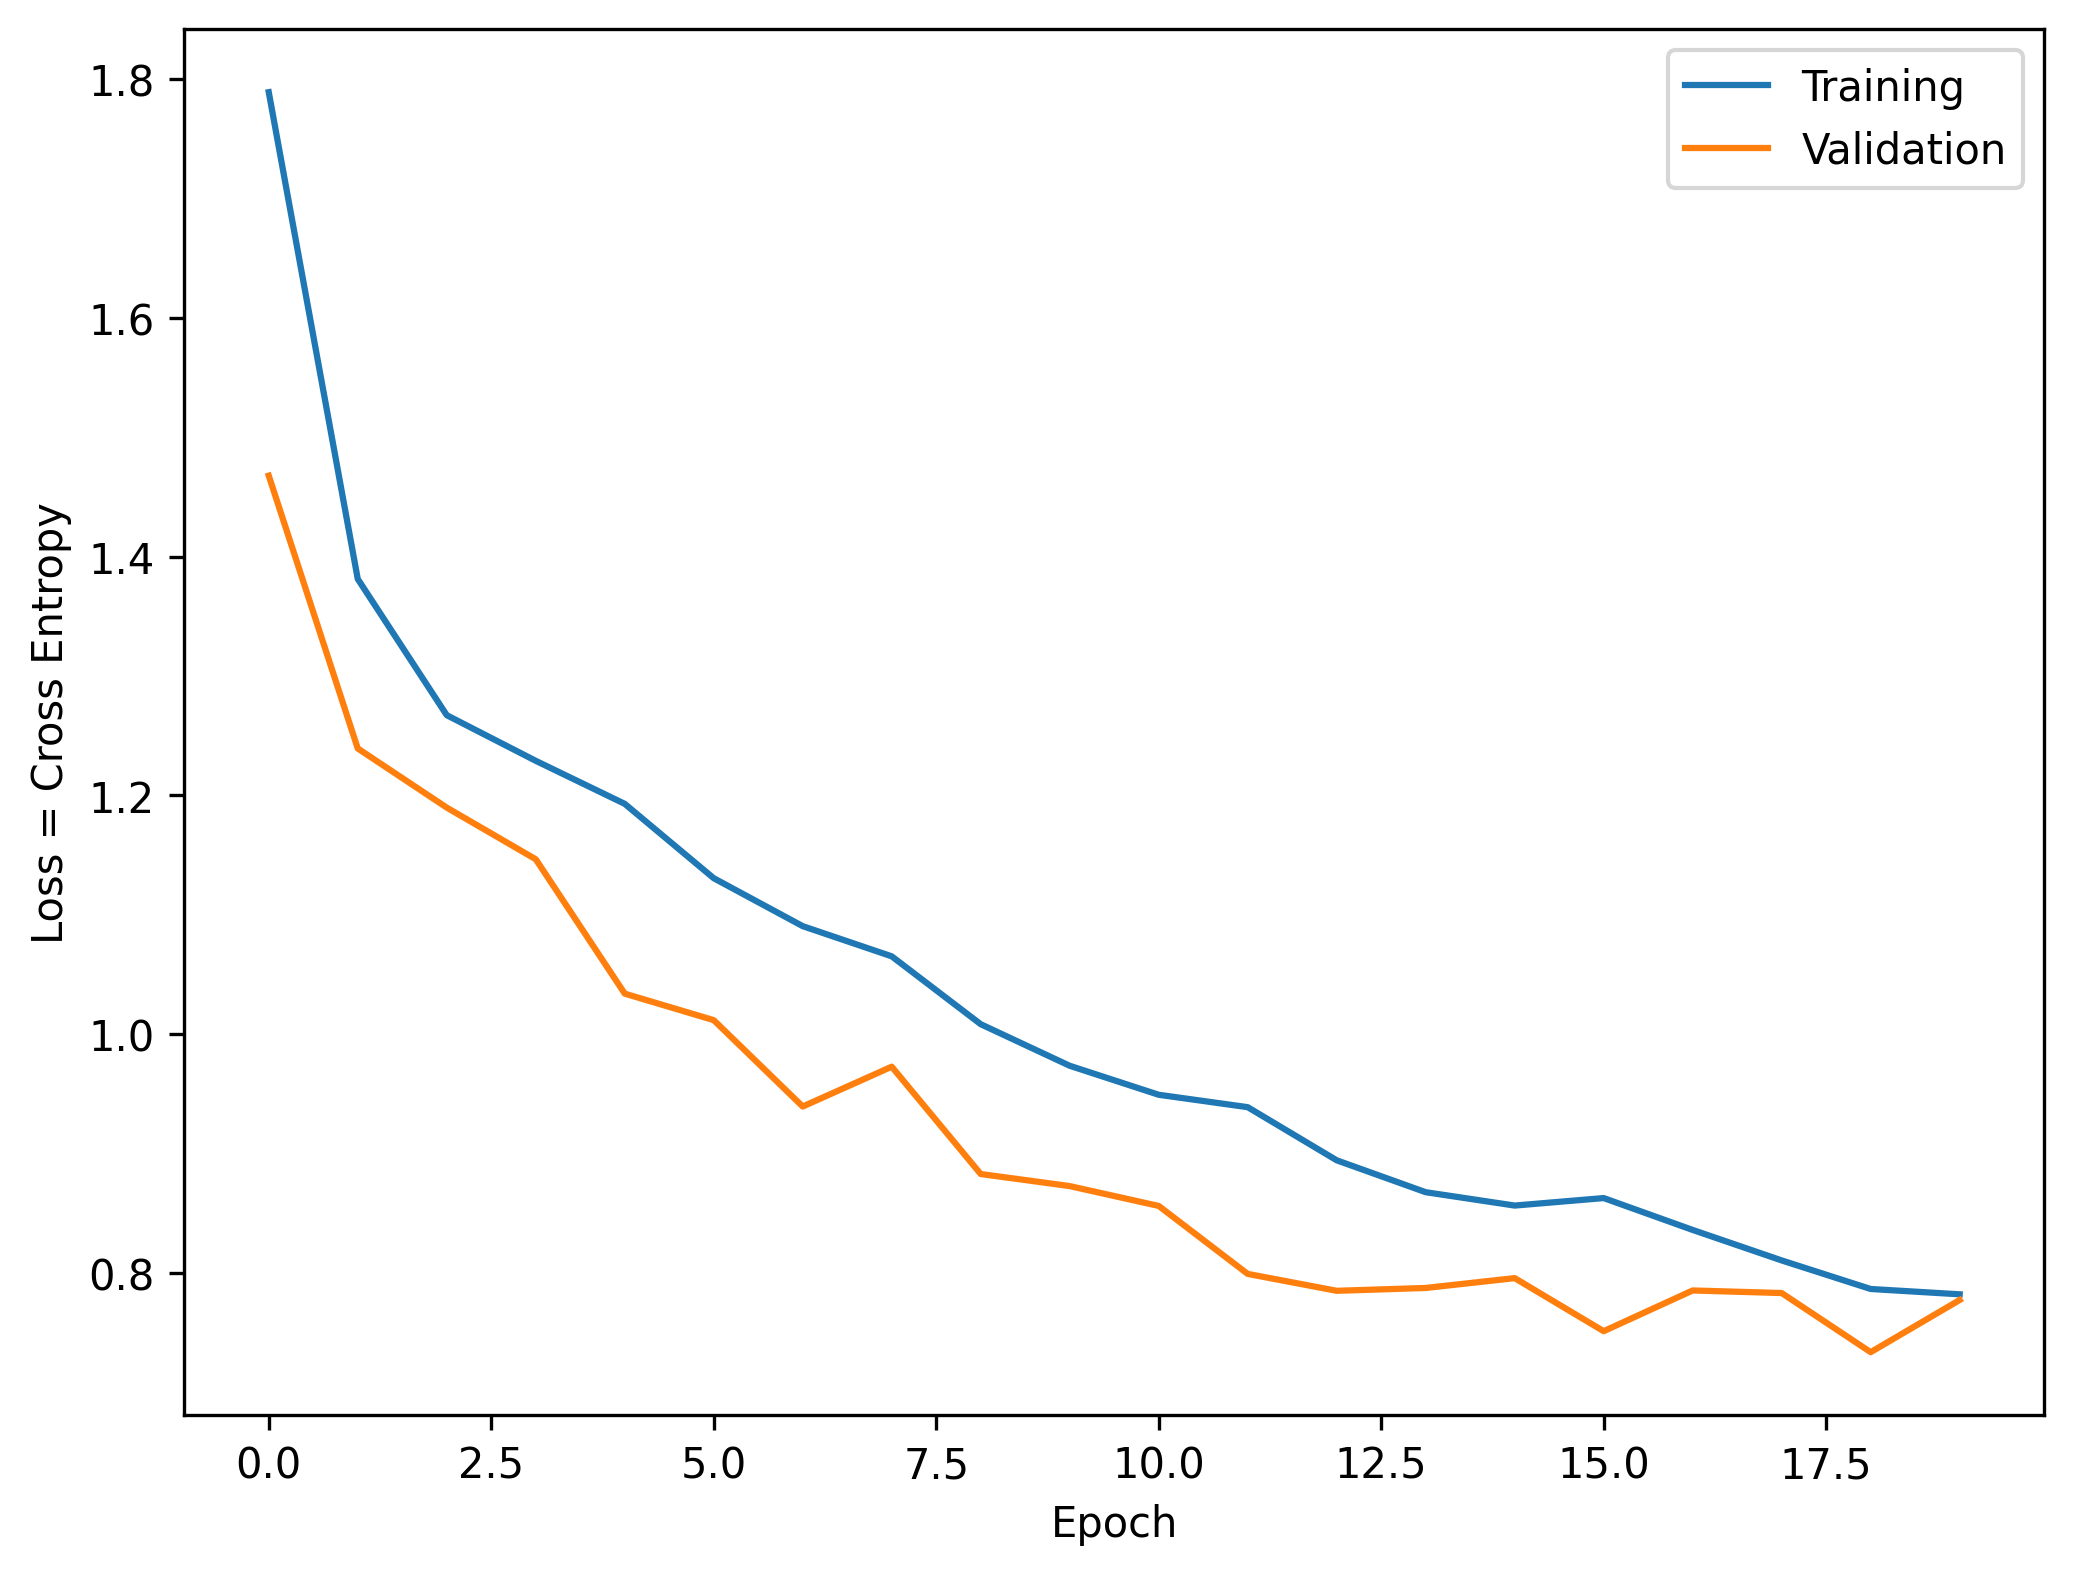

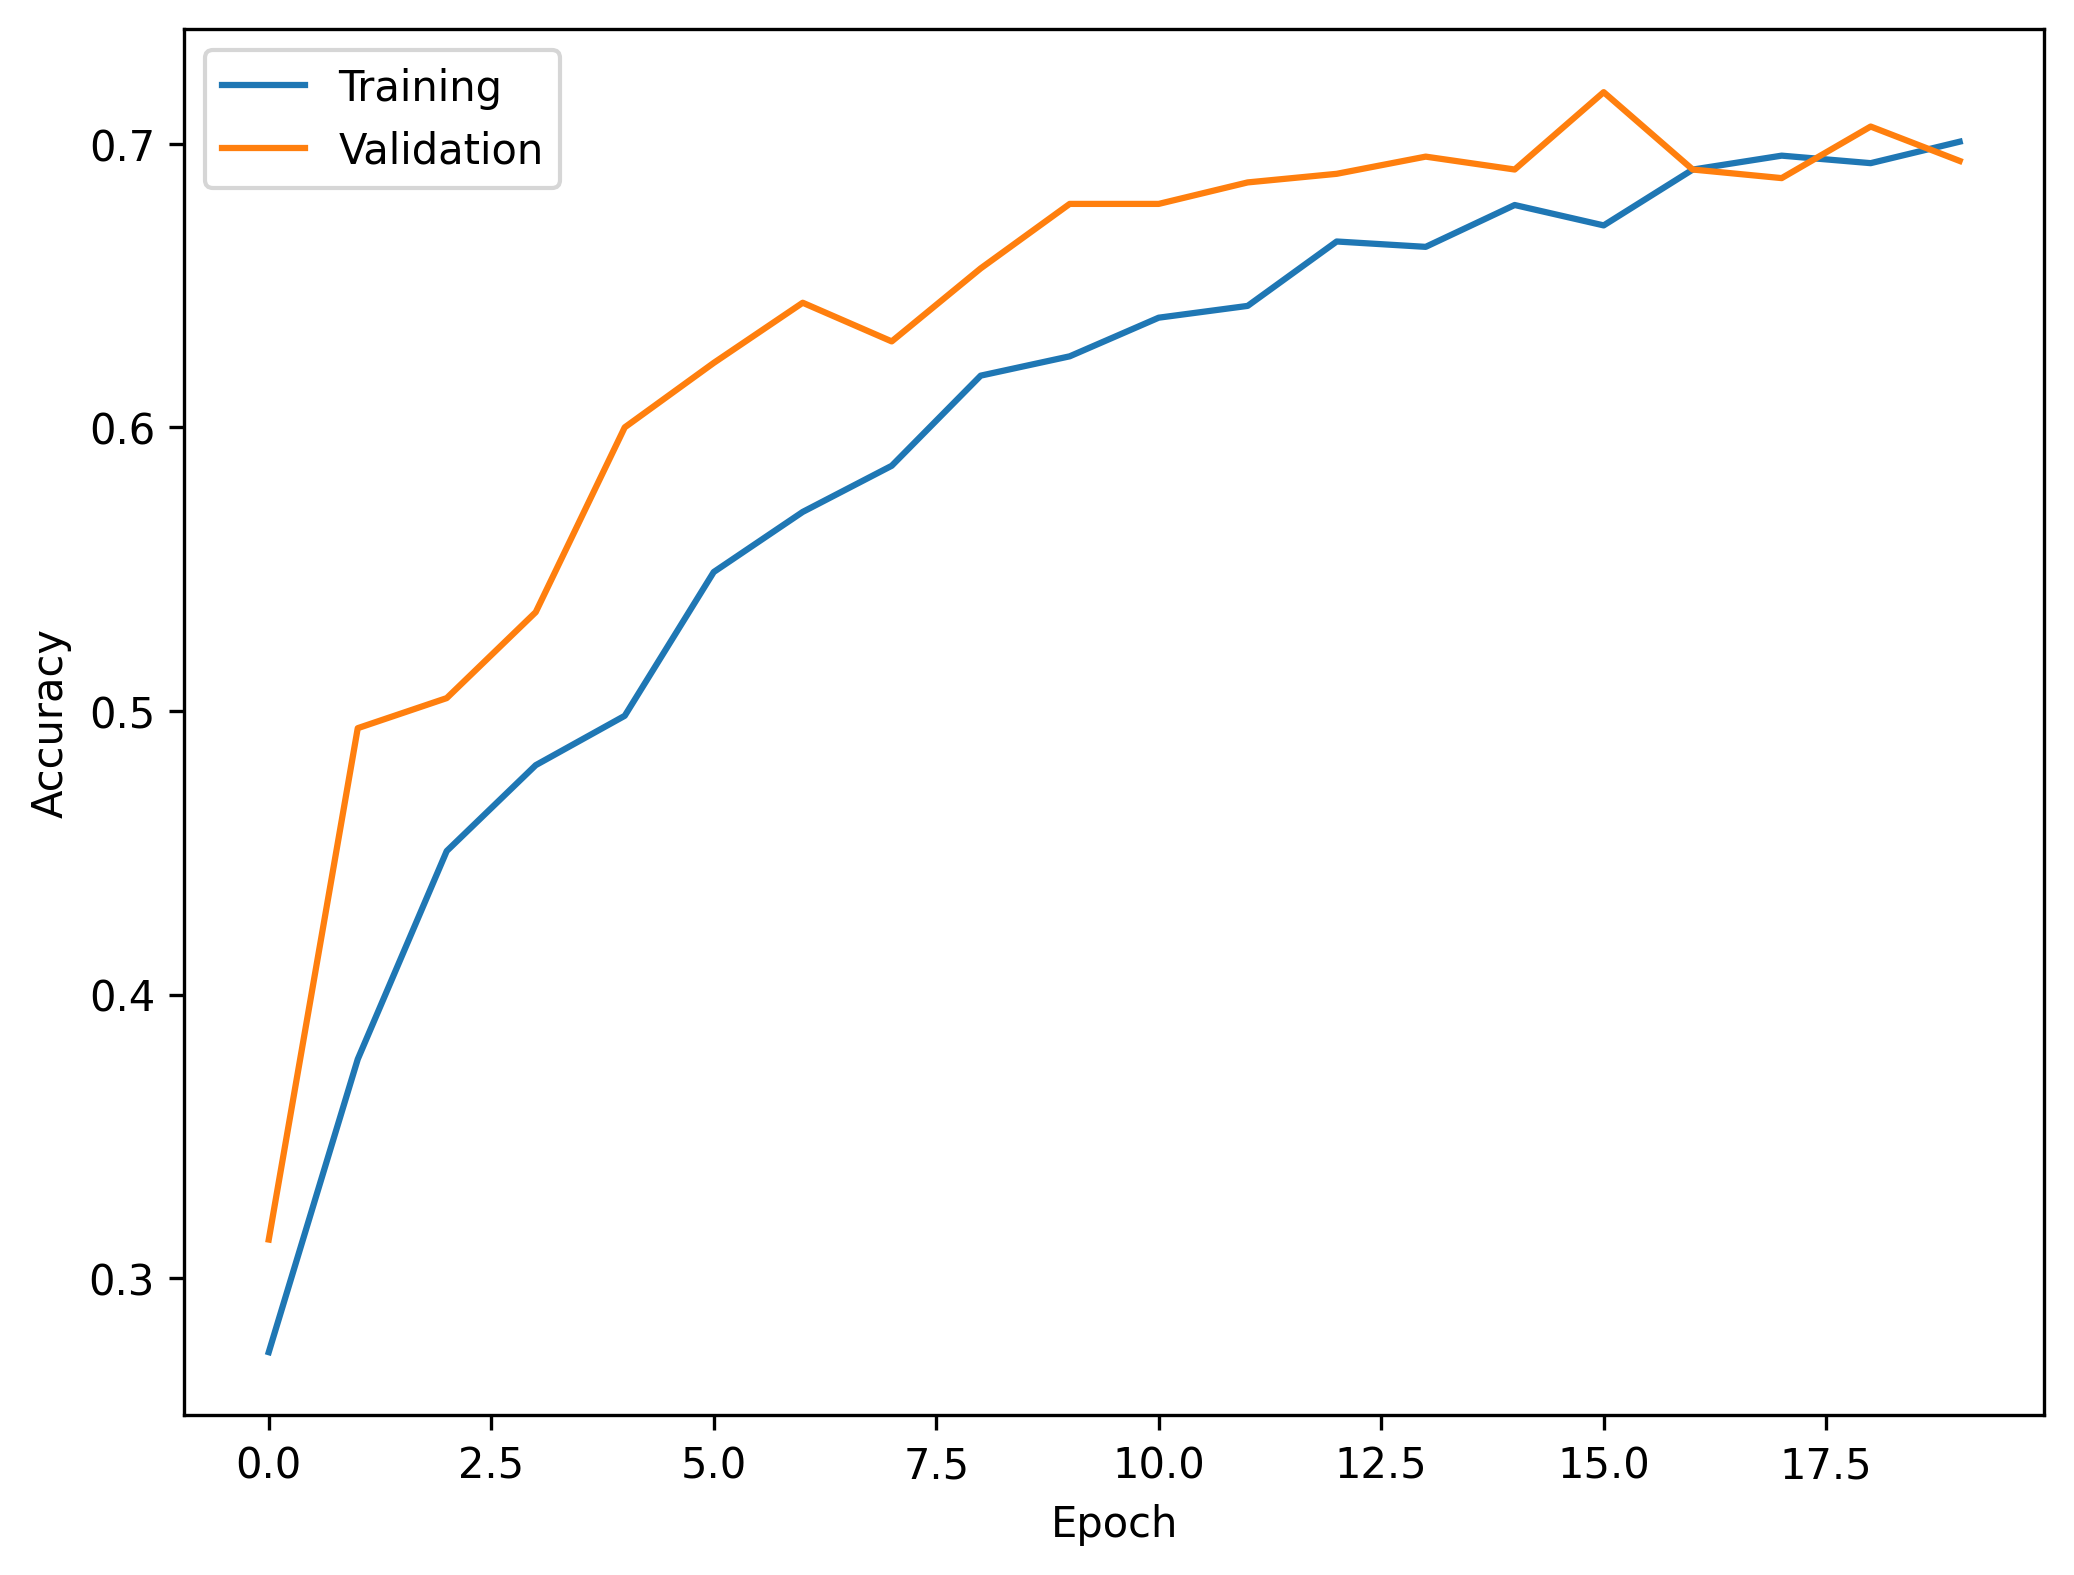

12/12 [==============================] - 3s 220ms/step


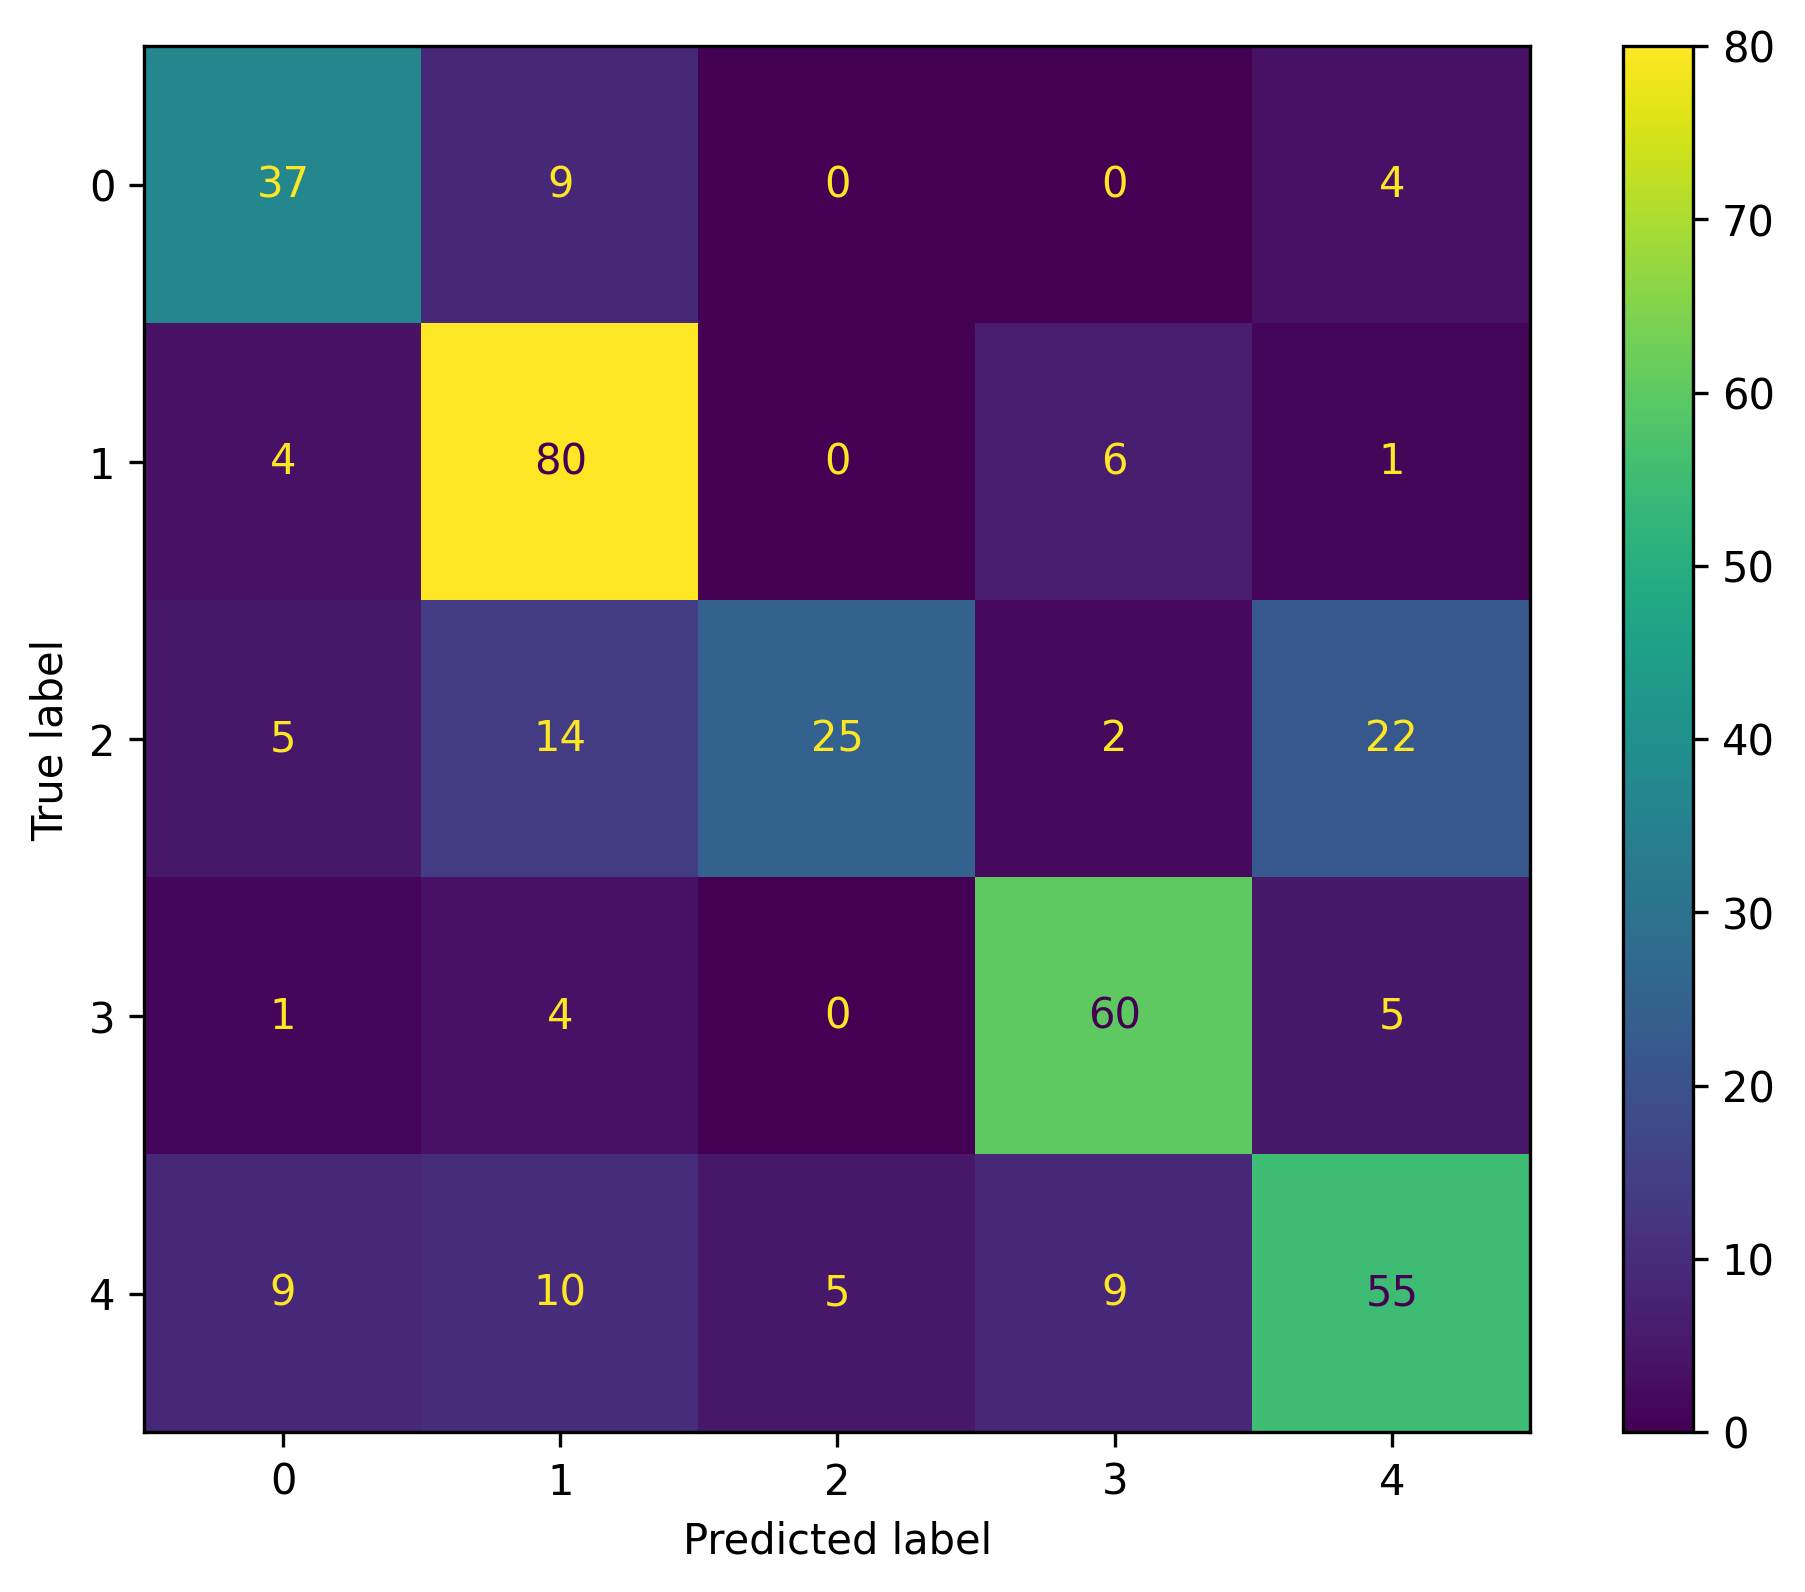

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        50
           1       0.68      0.88      0.77        91
           2       0.83      0.37      0.51        68
           3       0.78      0.86      0.82        70
           4       0.63      0.62      0.63        88

    accuracy                           0.70       367
   macro avg       0.72      0.69      0.68       367
weighted avg       0.71      0.70      0.69       367



In [25]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Increasing the Stride Length on the Conv2D Layers to 2

In [27]:
# Creating an instance of the Sequential class.

model = Sequential()

# Adding the first Convolutional layer

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses max pooling,with a pool size of 2x2. 

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Adding a second convolutional layer, again with a kernel size of 3x3 an the relu activation function but now with 64 filters.

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a second max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Adding a third convolutional layer, now with 128 filters.

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Flattening the output to a 1-dimensional array

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

# Using the softmax activation function

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 128)        

In [28]:
# Creating an instance of the Adam class,and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model.

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

Epoch 1/20
21/21 [==============================] - 37s 2s/step - loss: 1.5191 - accuracy: 0.3118 - val_loss: 1.2775 - val_accuracy: 0.4742
Epoch 2/20
21/21 [==============================] - 34s 2s/step - loss: 1.2751 - accuracy: 0.4404 - val_loss: 1.1691 - val_accuracy: 0.5106
Epoch 3/20
21/21 [==============================] - 34s 2s/step - loss: 1.1943 - accuracy: 0.4892 - val_loss: 1.0928 - val_accuracy: 0.5591
Epoch 4/20
21/21 [==============================] - 33s 2s/step - loss: 1.1495 - accuracy: 0.5244 - val_loss: 1.0597 - val_accuracy: 0.5970
Epoch 5/20
21/21 [==============================] - 33s 2s/step - loss: 1.1196 - accuracy: 0.5342 - val_loss: 1.0462 - val_accuracy: 0.5894
Epoch 6/20
21/21 [==============================] - 34s 2s/step - loss: 1.0823 - accuracy: 0.5592 - val_loss: 0.9911 - val_accuracy: 0.5924
Epoch 7/20
21/21 [==============================] - 34s 2s/step - loss: 1.0379 - accuracy: 0.5834 - val_loss: 0.9157 - val_accuracy: 0.6561
Epoch 8/20
21/21 [==

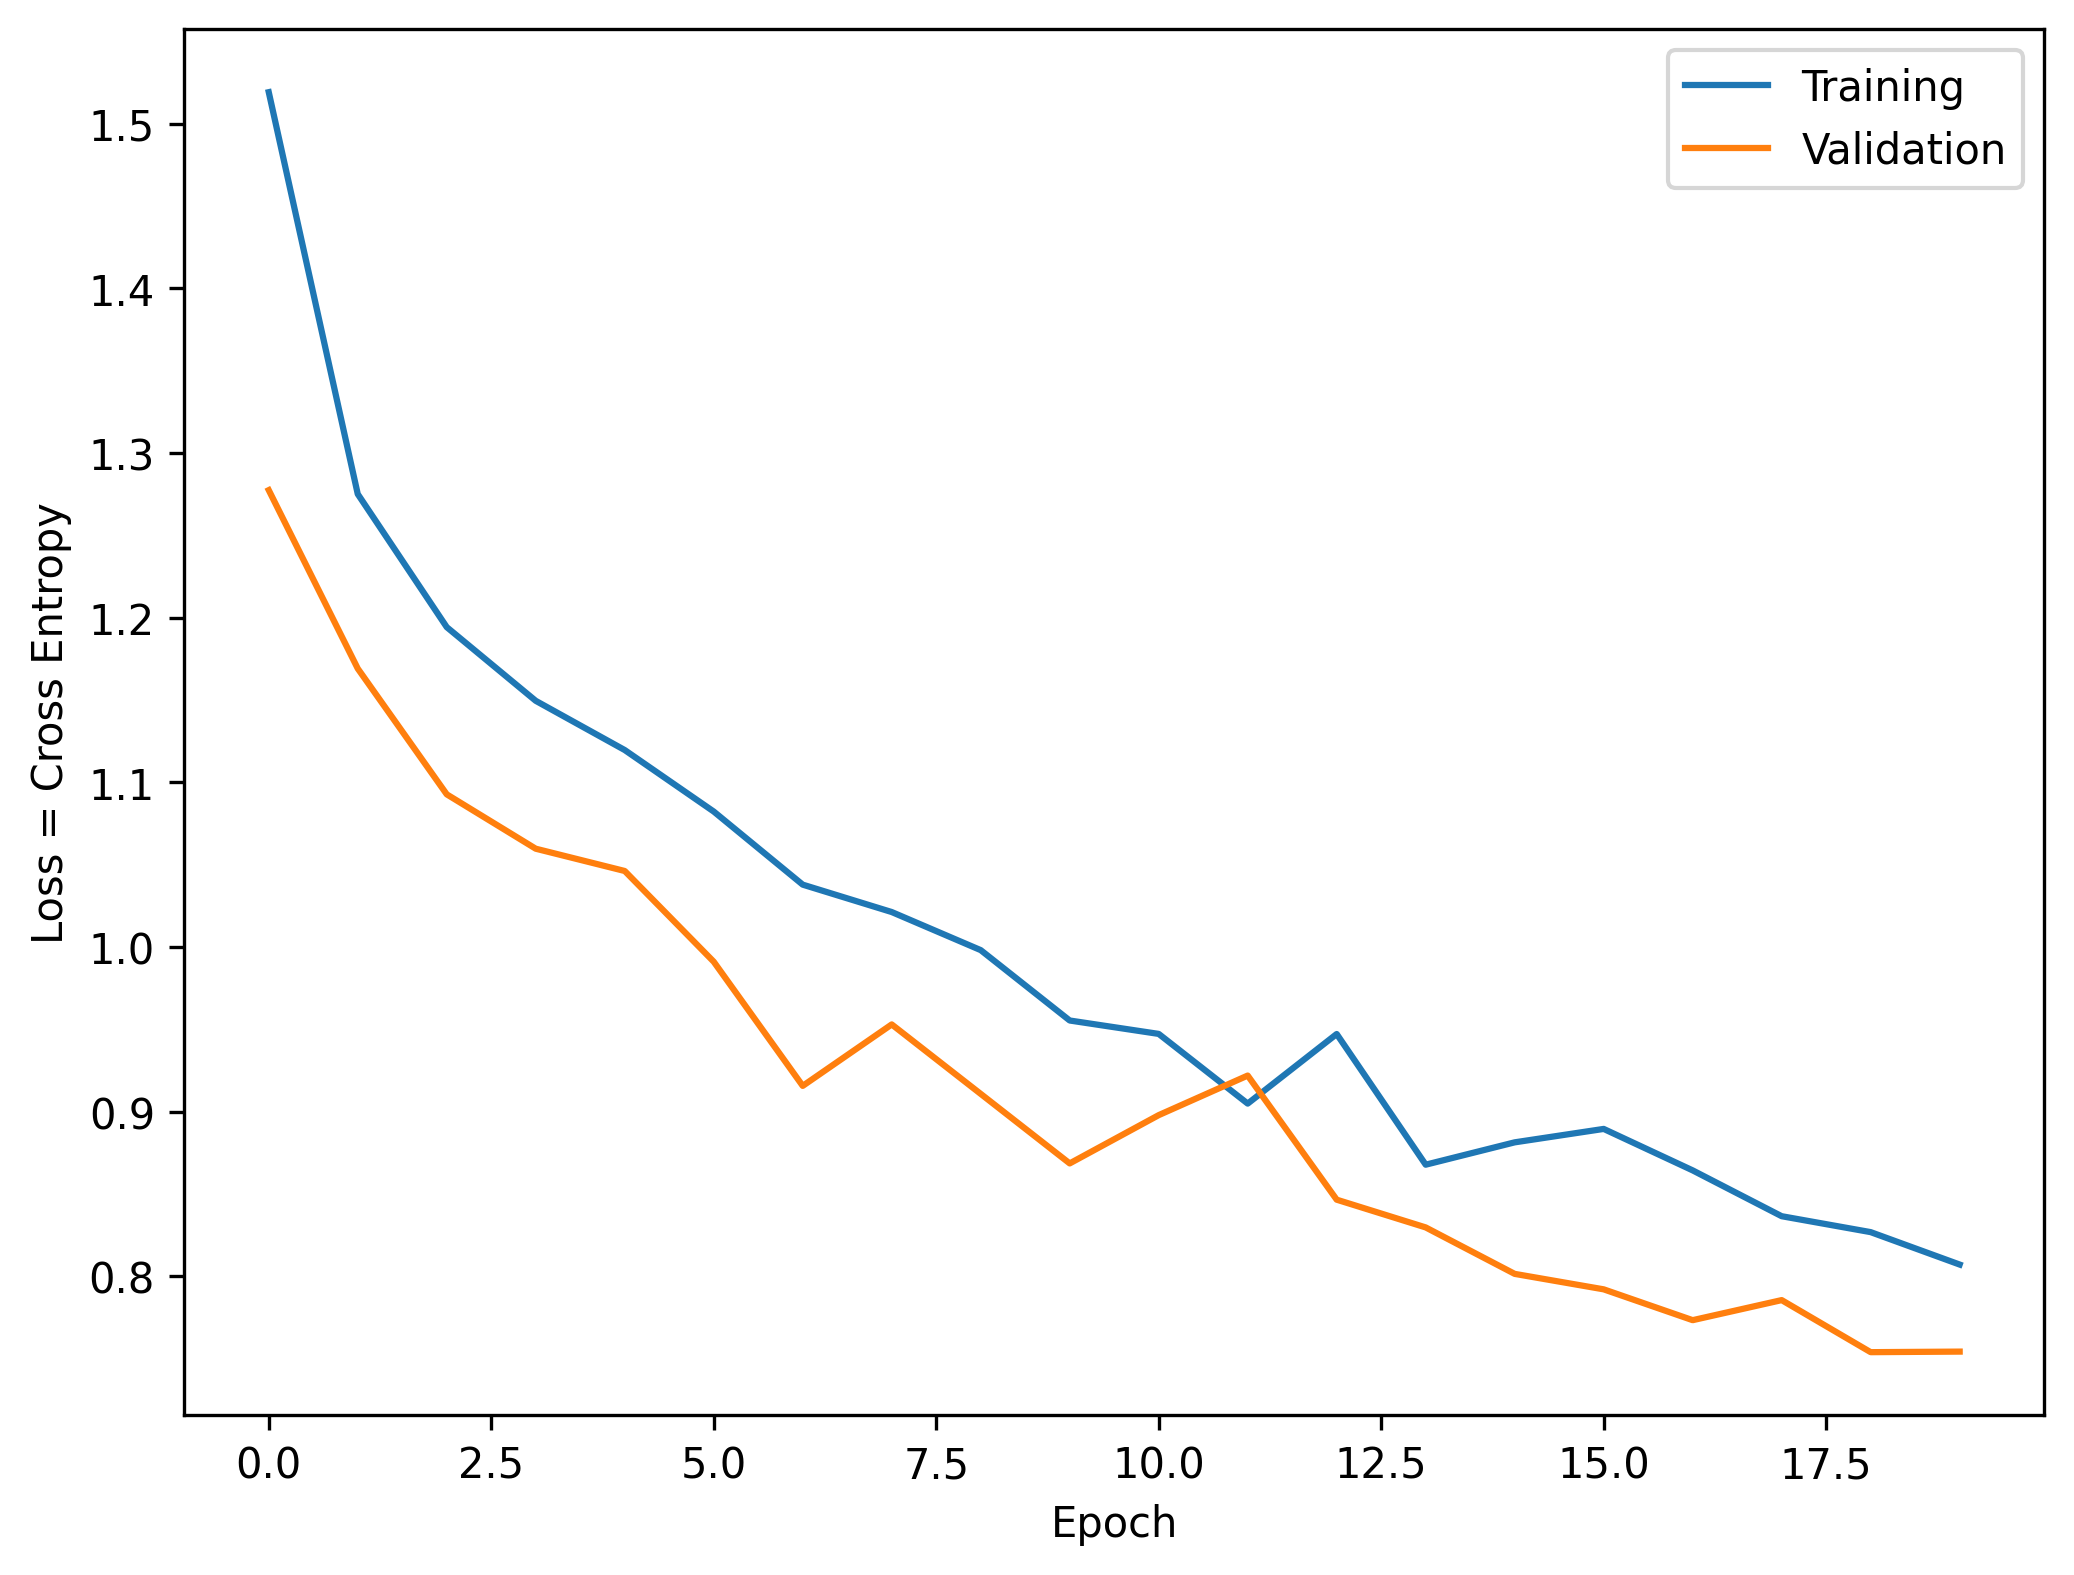

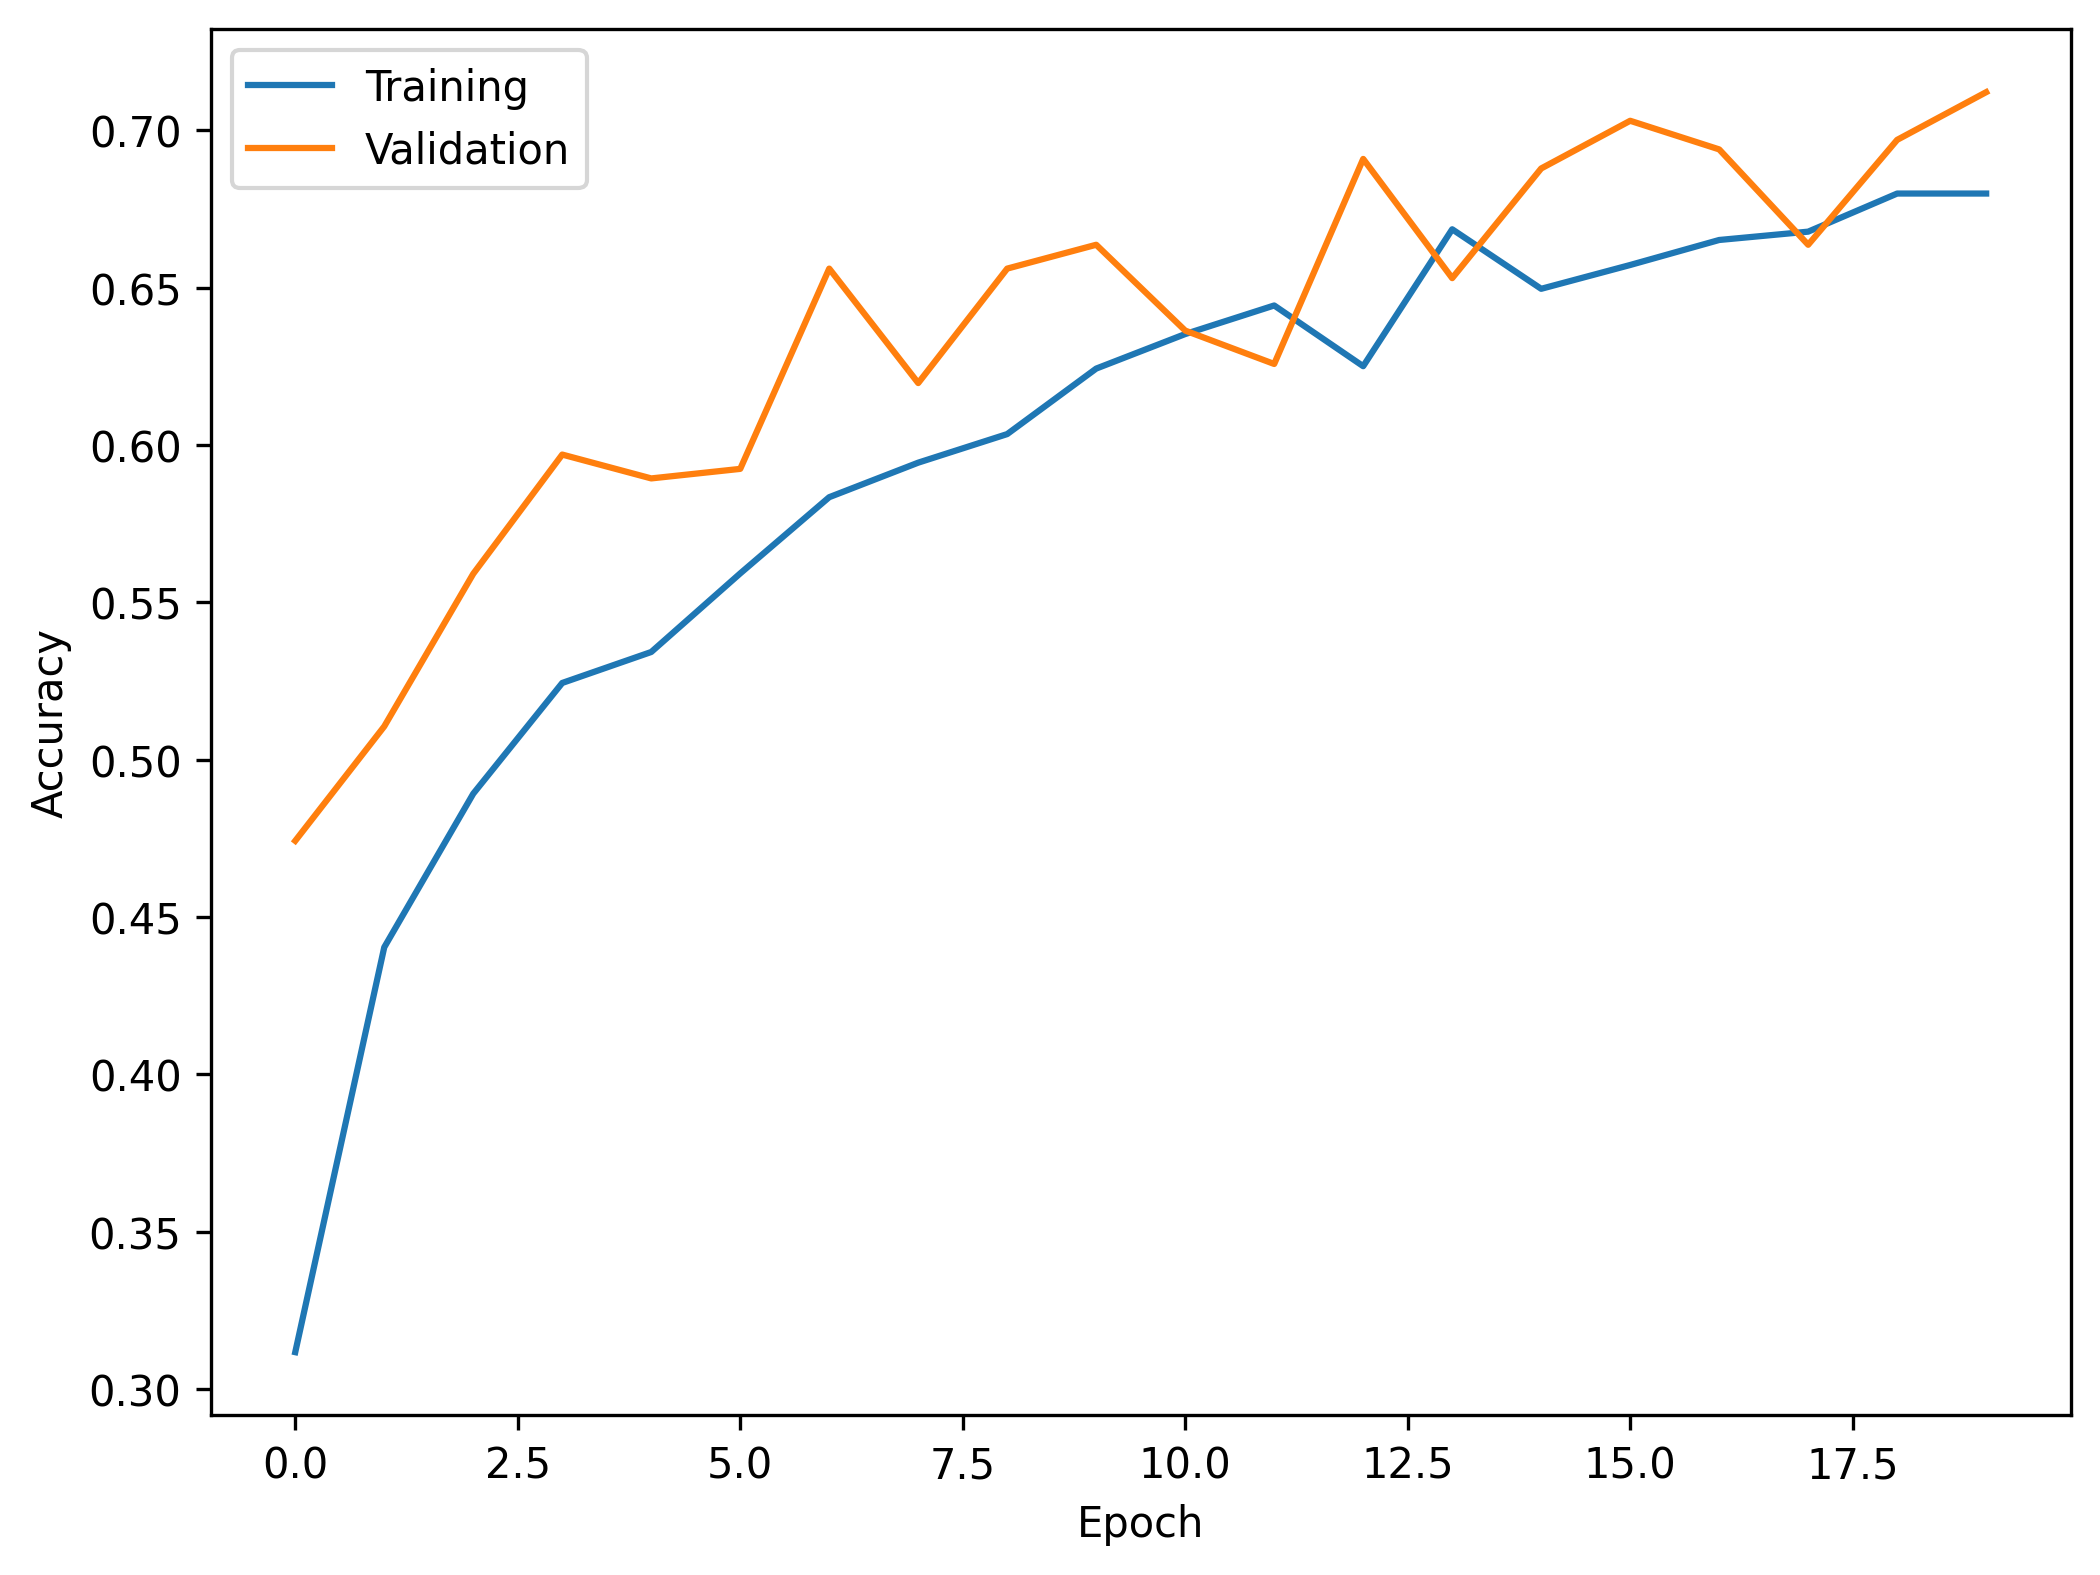

12/12 [==============================] - 0s 29ms/step


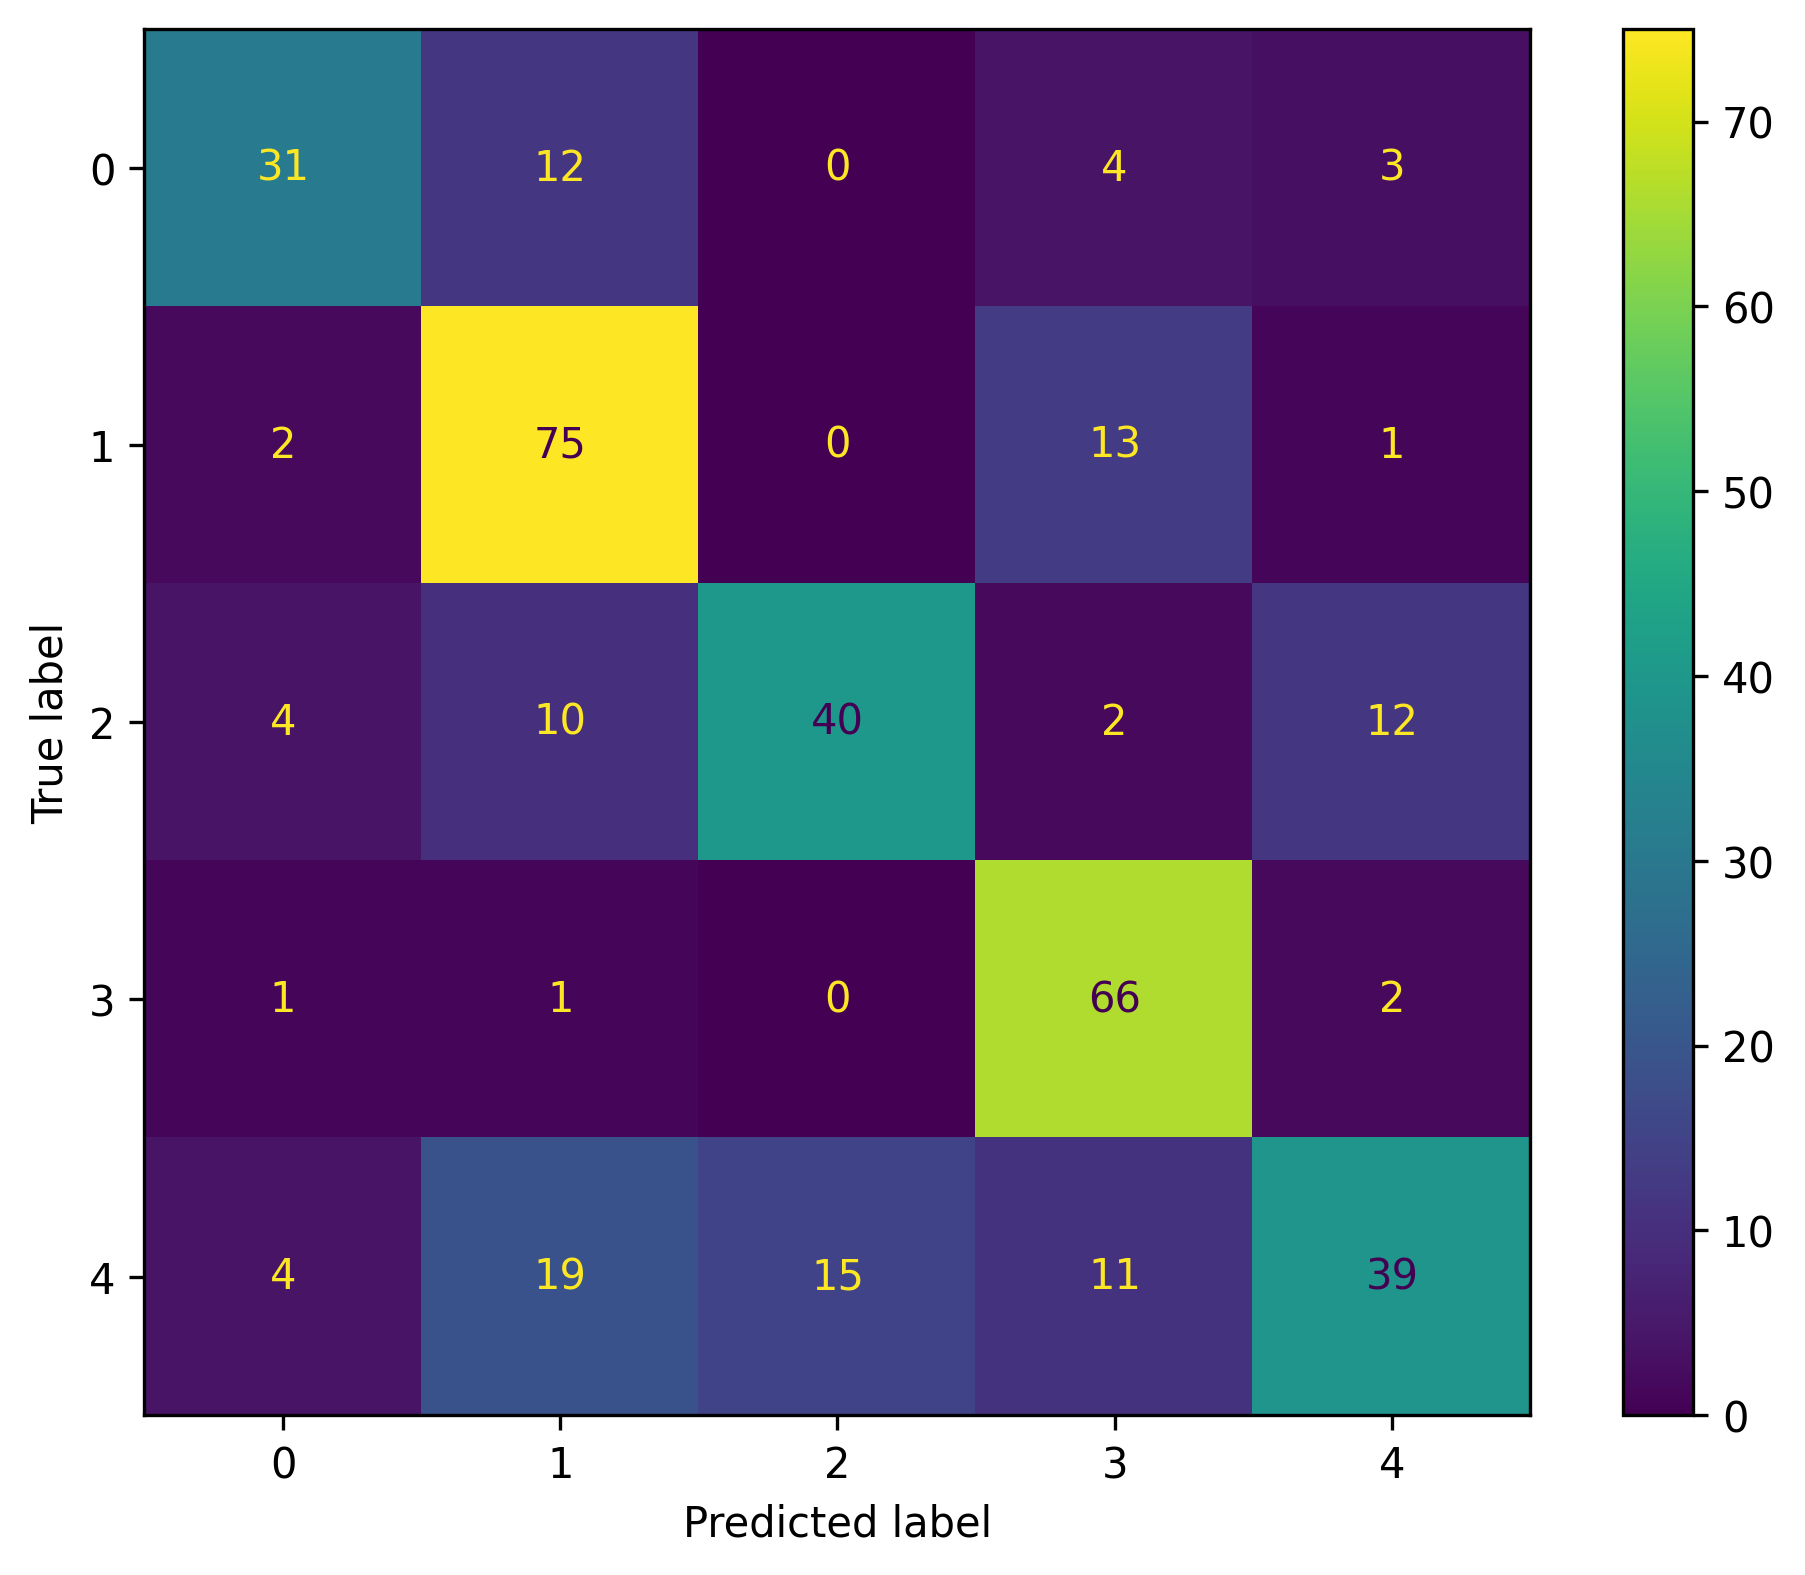

              precision    recall  f1-score   support

           0       0.74      0.62      0.67        50
           1       0.64      0.82      0.72        91
           2       0.73      0.59      0.65        68
           3       0.69      0.94      0.80        70
           4       0.68      0.44      0.54        88

    accuracy                           0.68       367
   macro avg       0.70      0.68      0.68       367
weighted avg       0.69      0.68      0.67       367



In [29]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot.

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Increasing the kernel size to (5x5)

In [30]:
# Creating an instance of the Sequential class

model = Sequential()

# Adding the first Convolutional layer.

model.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Adding a second convolutional layer

model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a second max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Adding a third convolutional layer, now with 128 filters.

model.add(Conv2D(filters = 128, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third max pooling layer.

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# Flattening the output to a 1-dimensional array,

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neuron and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

# Using the softmax activation function

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 4, 4, 128)        

In [31]:
# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model. 

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

Epoch 1/20
21/21 [==============================] - 40s 2s/step - loss: 1.5705 - accuracy: 0.2713 - val_loss: 1.4315 - val_accuracy: 0.3652
Epoch 2/20
21/21 [==============================] - 38s 2s/step - loss: 1.3397 - accuracy: 0.4105 - val_loss: 1.1735 - val_accuracy: 0.5318
Epoch 3/20
21/21 [==============================] - 39s 2s/step - loss: 1.2118 - accuracy: 0.4956 - val_loss: 1.1218 - val_accuracy: 0.5591
Epoch 4/20
21/21 [==============================] - 38s 2s/step - loss: 1.1522 - accuracy: 0.5301 - val_loss: 1.0201 - val_accuracy: 0.5909
Epoch 5/20
21/21 [==============================] - 40s 2s/step - loss: 1.1089 - accuracy: 0.5407 - val_loss: 0.9800 - val_accuracy: 0.6182
Epoch 6/20
21/21 [==============================] - 38s 2s/step - loss: 1.0702 - accuracy: 0.5827 - val_loss: 0.9595 - val_accuracy: 0.6455
Epoch 7/20
21/21 [==============================] - 39s 2s/step - loss: 1.0109 - accuracy: 0.5997 - val_loss: 0.9009 - val_accuracy: 0.6545
Epoch 8/20
21/21 [==

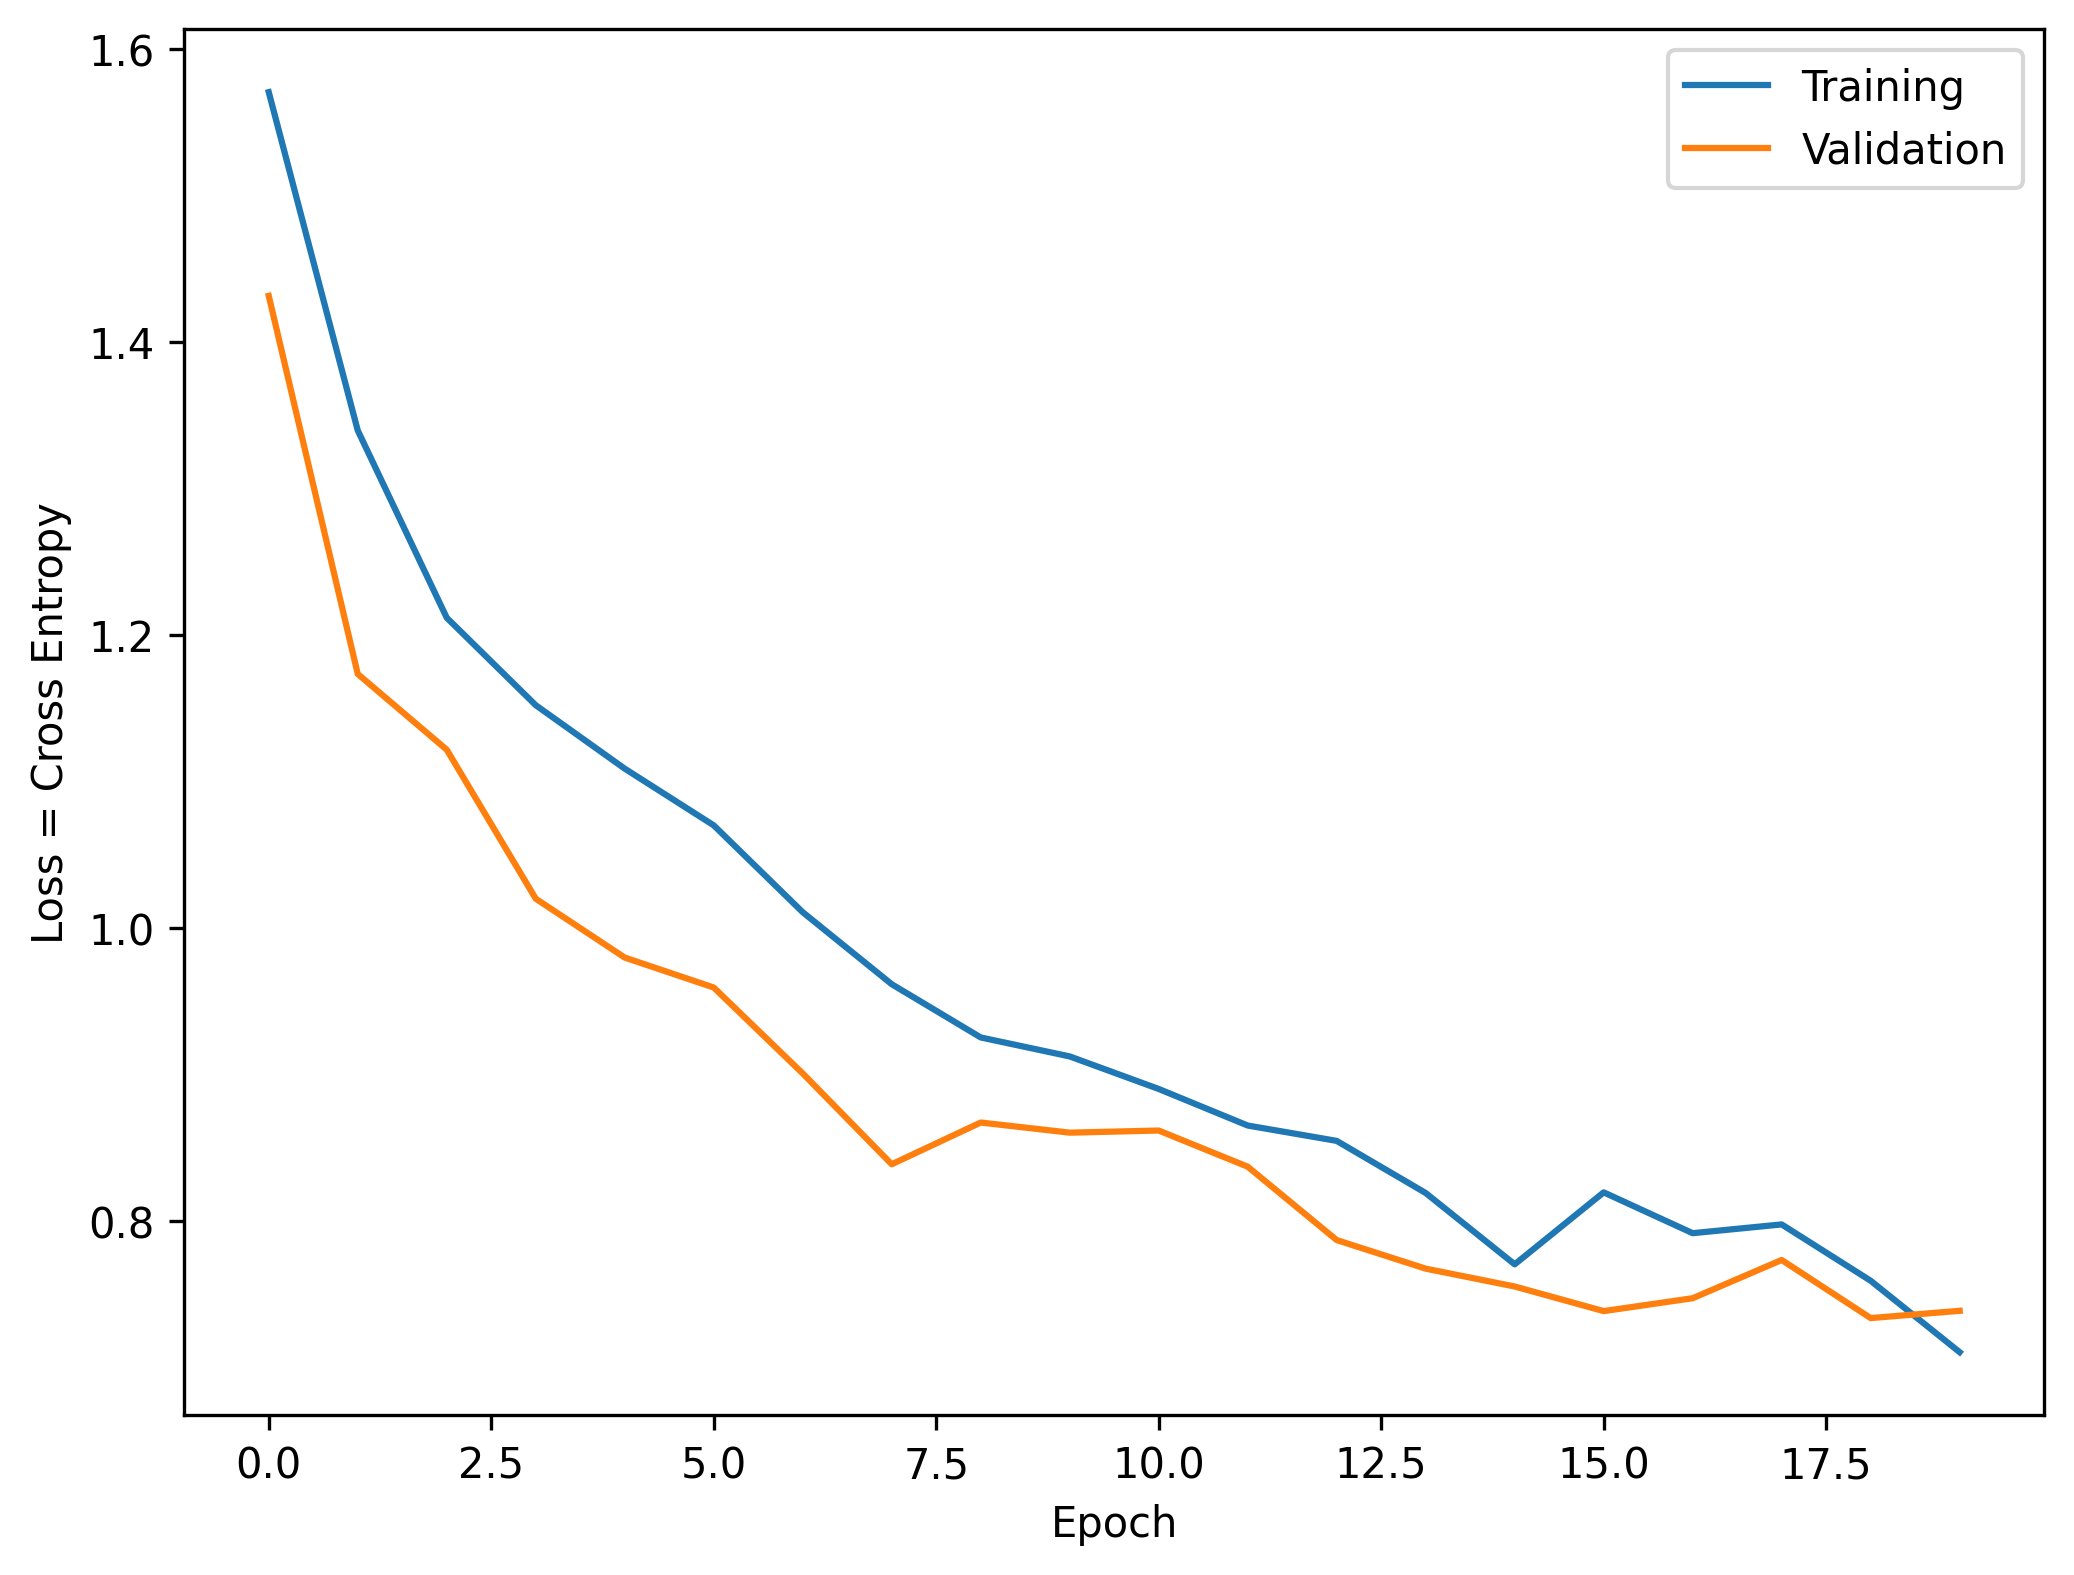

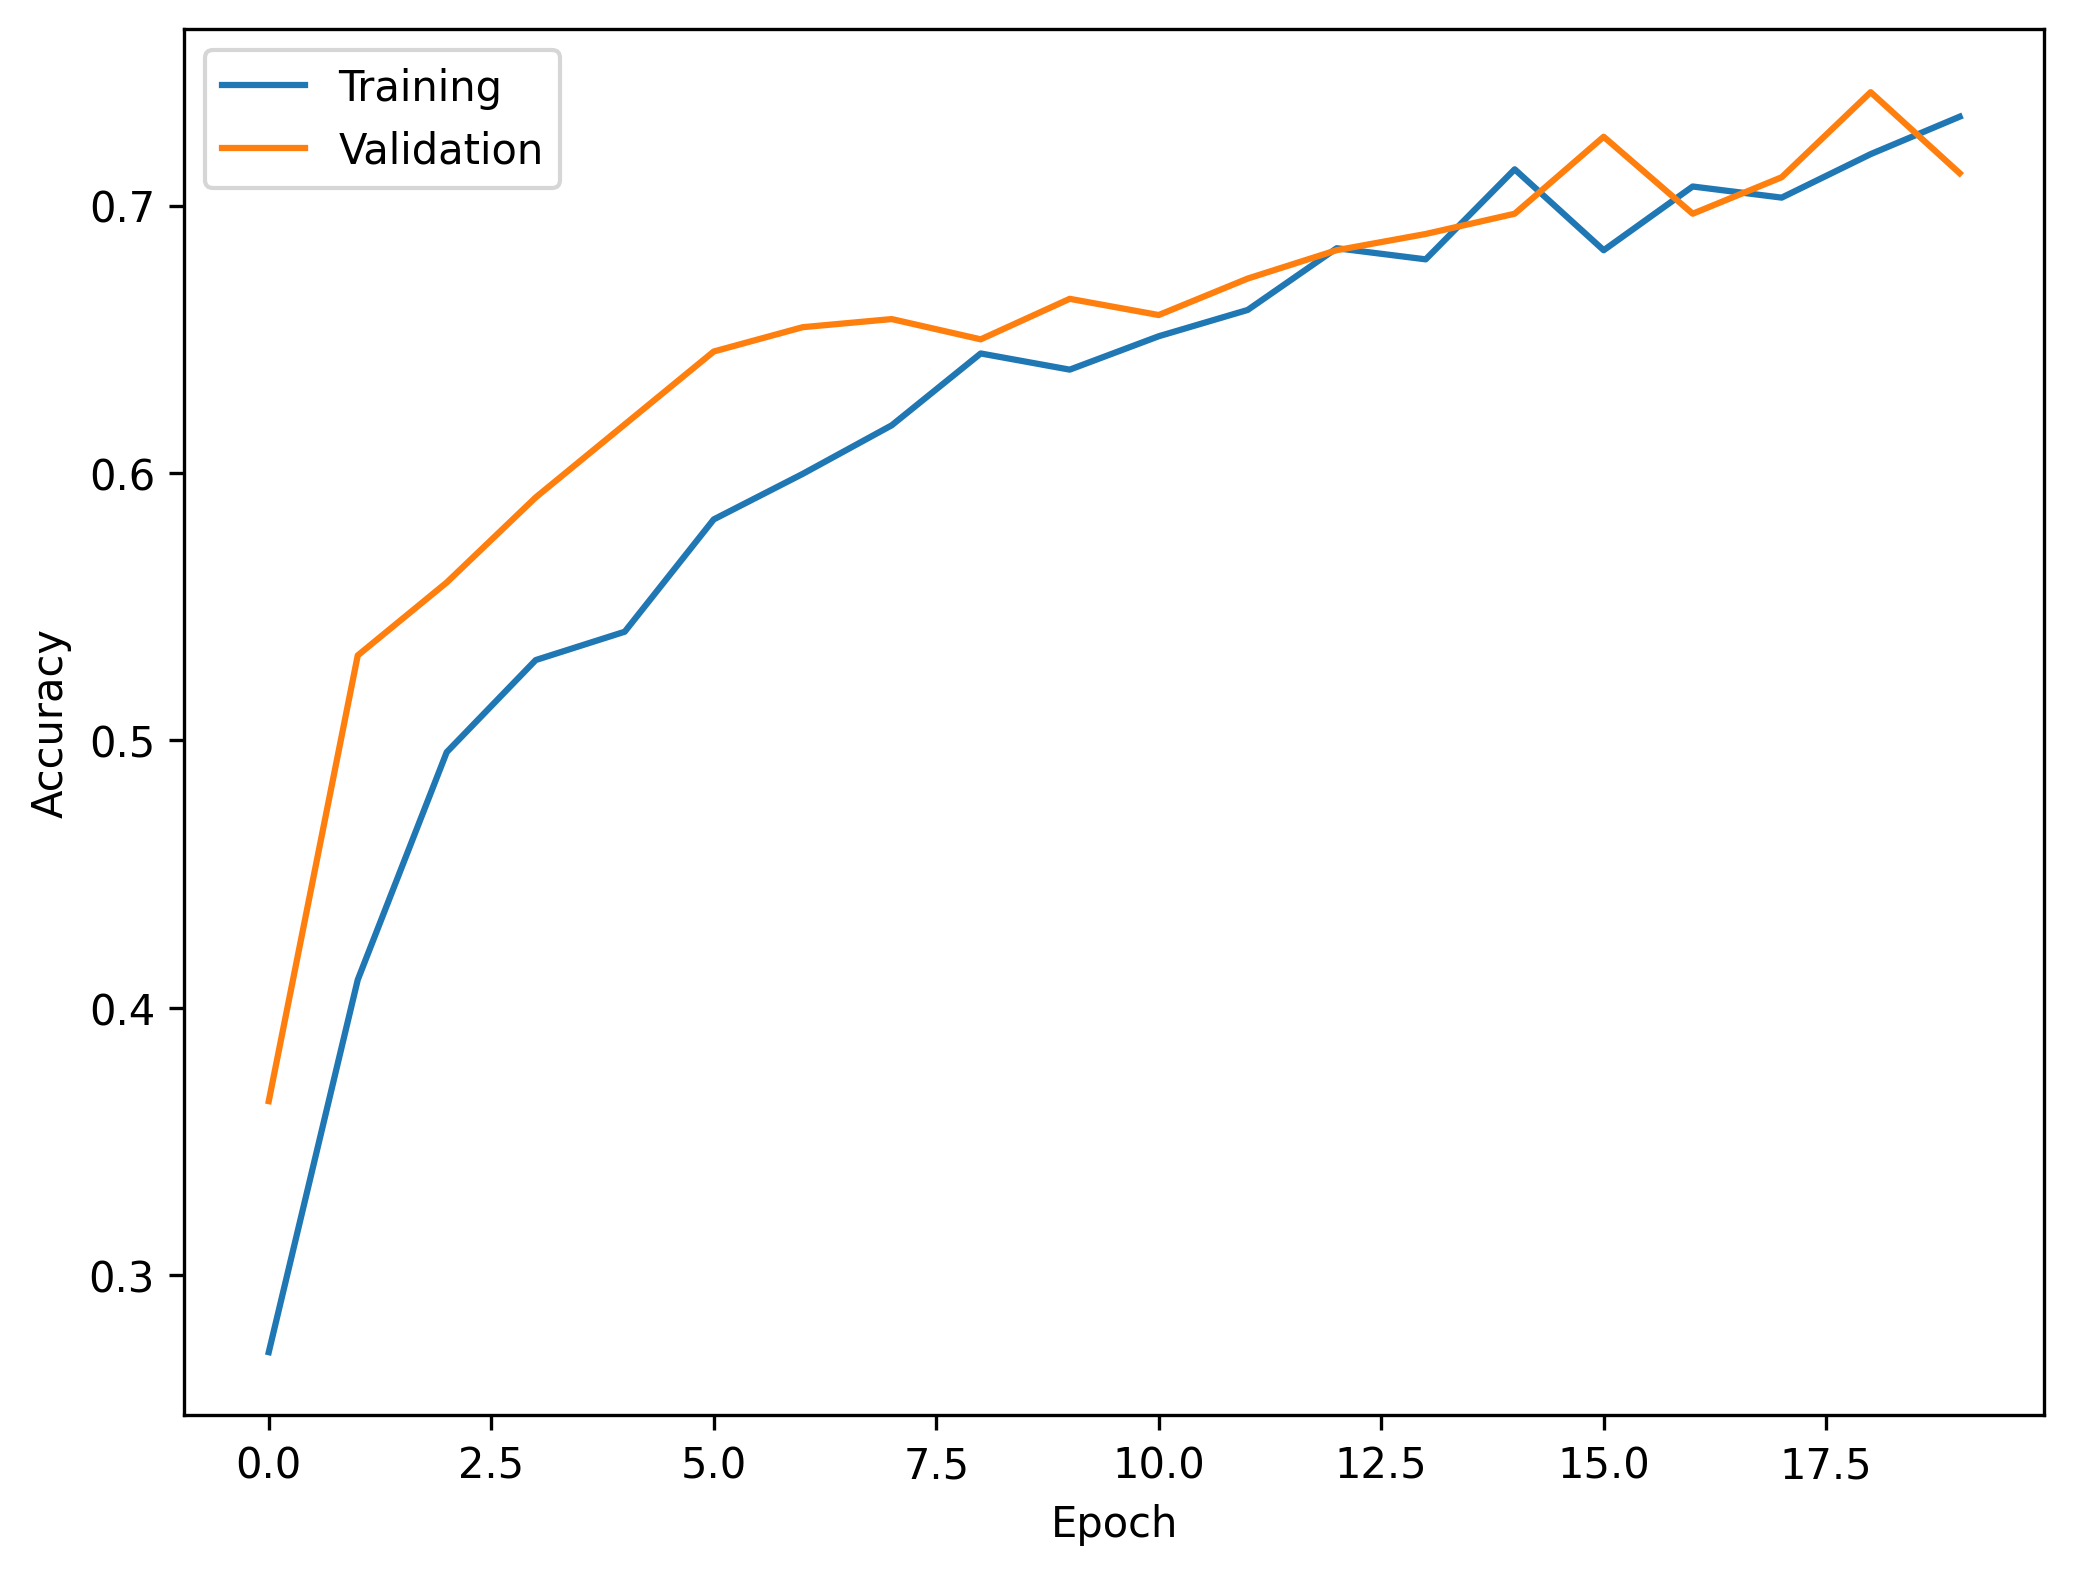

12/12 [==============================] - 1s 43ms/step


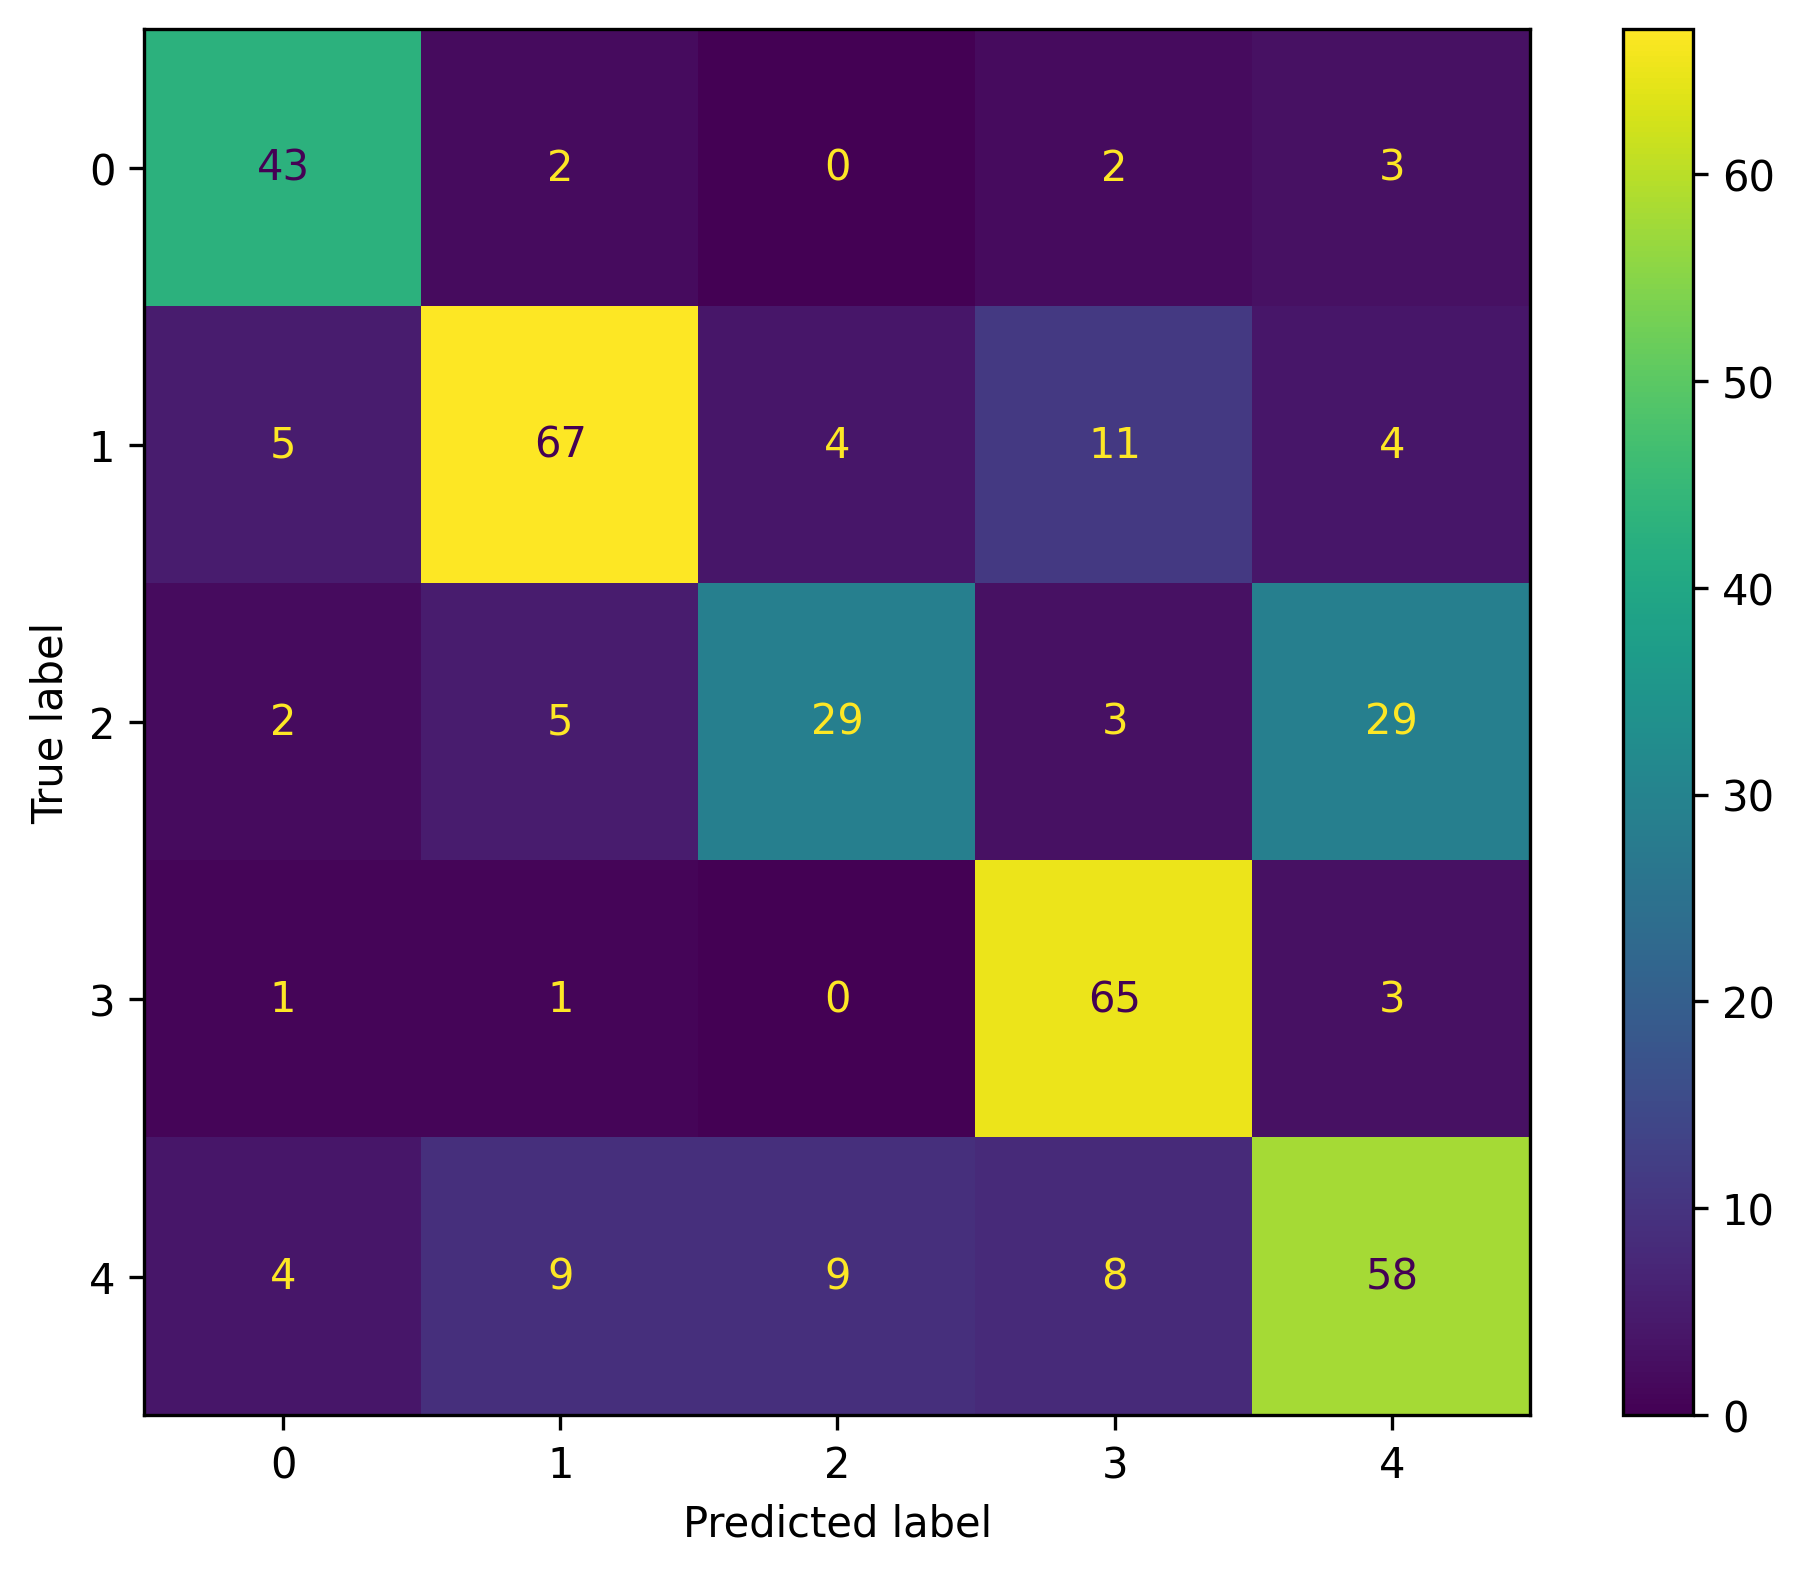

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        50
           1       0.80      0.74      0.77        91
           2       0.69      0.43      0.53        68
           3       0.73      0.93      0.82        70
           4       0.60      0.66      0.63        88

    accuracy                           0.71       367
   macro avg       0.72      0.72      0.71       367
weighted avg       0.71      0.71      0.71       367



In [32]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot.

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot
plt.show()



# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Replacing MaxPooling with AveragePooling

In [33]:
# Importing the AveragePooling2D layer from Keras.

from tensorflow.keras.layers import AveragePooling2D

# Creating an instance of the Sequential class.

model = Sequential()

# Adding the first Convolutional layer. 

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer that uses average pooling, with a pool size of 2x2. 

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Adding a second convolutional layer

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a second average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Adding a third convolutional layer, now with 128 filters.

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Flattening the output to a 1-dimensional array,

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

# Using the softmax activation function

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 64, 64, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 4, 4, 128)        

In [34]:
# Creating an instance of the Adam class, and set the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and record the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

Epoch 1/20
21/21 [==============================] - 36s 2s/step - loss: 1.5363 - accuracy: 0.2902 - val_loss: 1.3693 - val_accuracy: 0.4152
Epoch 2/20
21/21 [==============================] - 33s 2s/step - loss: 1.3724 - accuracy: 0.3859 - val_loss: 1.2371 - val_accuracy: 0.4652
Epoch 3/20
21/21 [==============================] - 33s 2s/step - loss: 1.2950 - accuracy: 0.4397 - val_loss: 1.1958 - val_accuracy: 0.4985
Epoch 4/20
21/21 [==============================] - 33s 2s/step - loss: 1.2437 - accuracy: 0.4544 - val_loss: 1.1602 - val_accuracy: 0.5318
Epoch 5/20
21/21 [==============================] - 33s 2s/step - loss: 1.1938 - accuracy: 0.4771 - val_loss: 1.1339 - val_accuracy: 0.4939
Epoch 6/20
21/21 [==============================] - 33s 2s/step - loss: 1.1621 - accuracy: 0.5025 - val_loss: 1.0970 - val_accuracy: 0.5455
Epoch 7/20
21/21 [==============================] - 32s 2s/step - loss: 1.1592 - accuracy: 0.5074 - val_loss: 1.0944 - val_accuracy: 0.5379
Epoch 8/20
21/21 [==

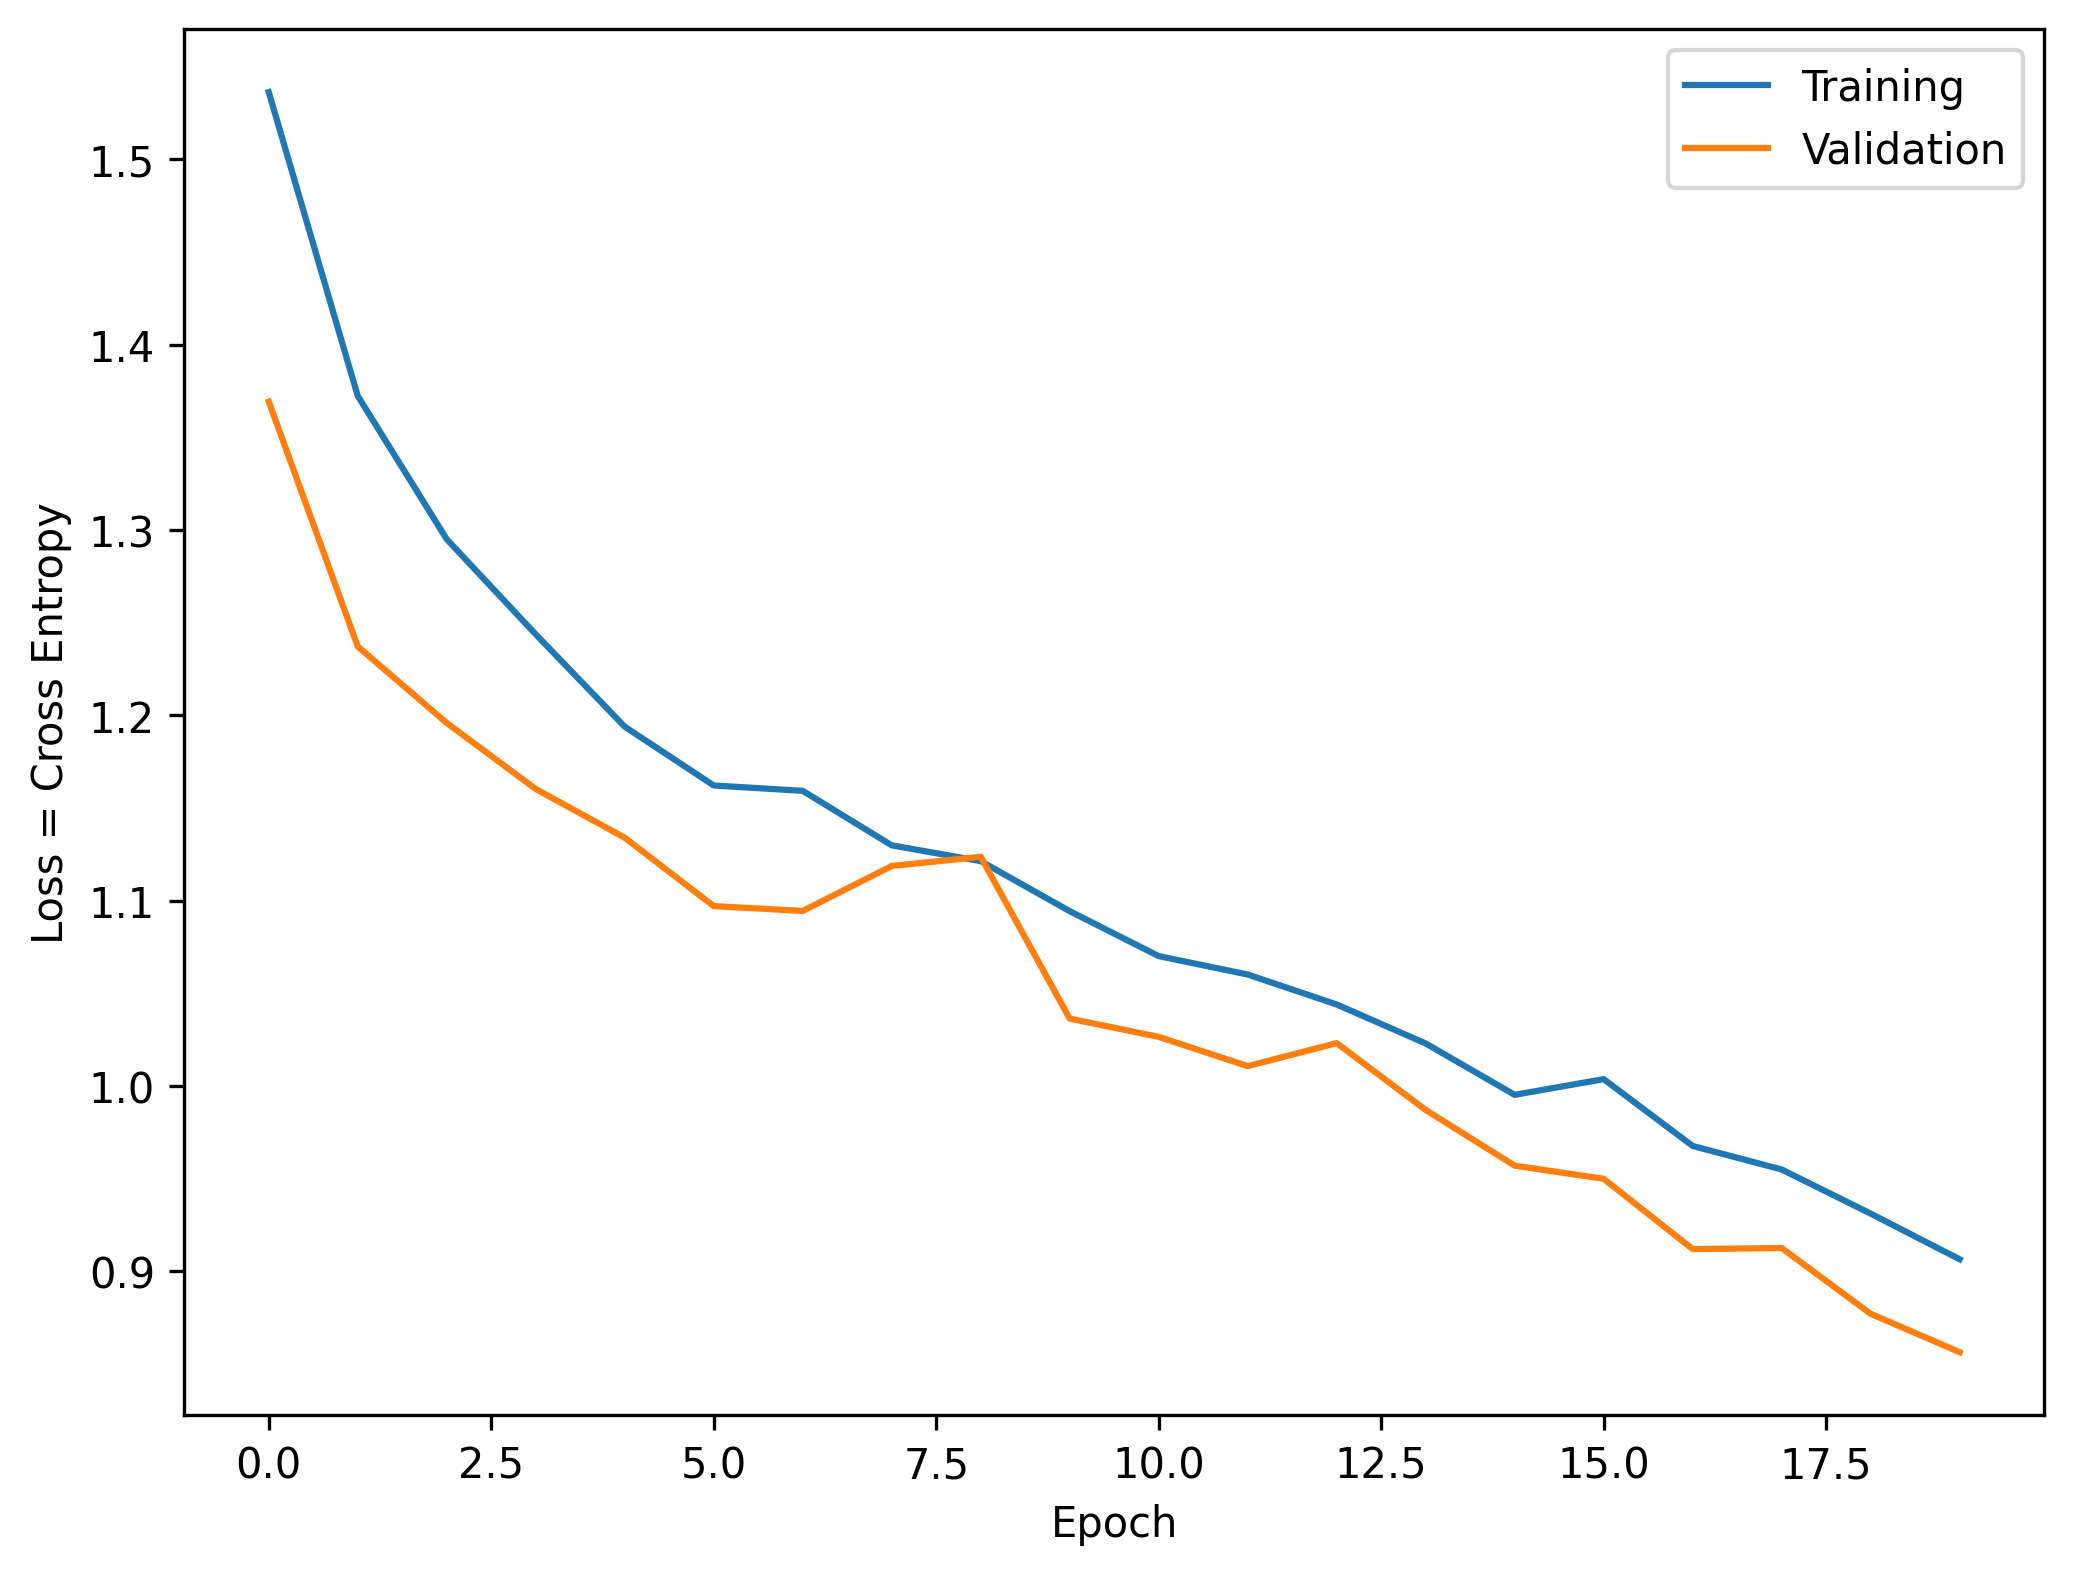

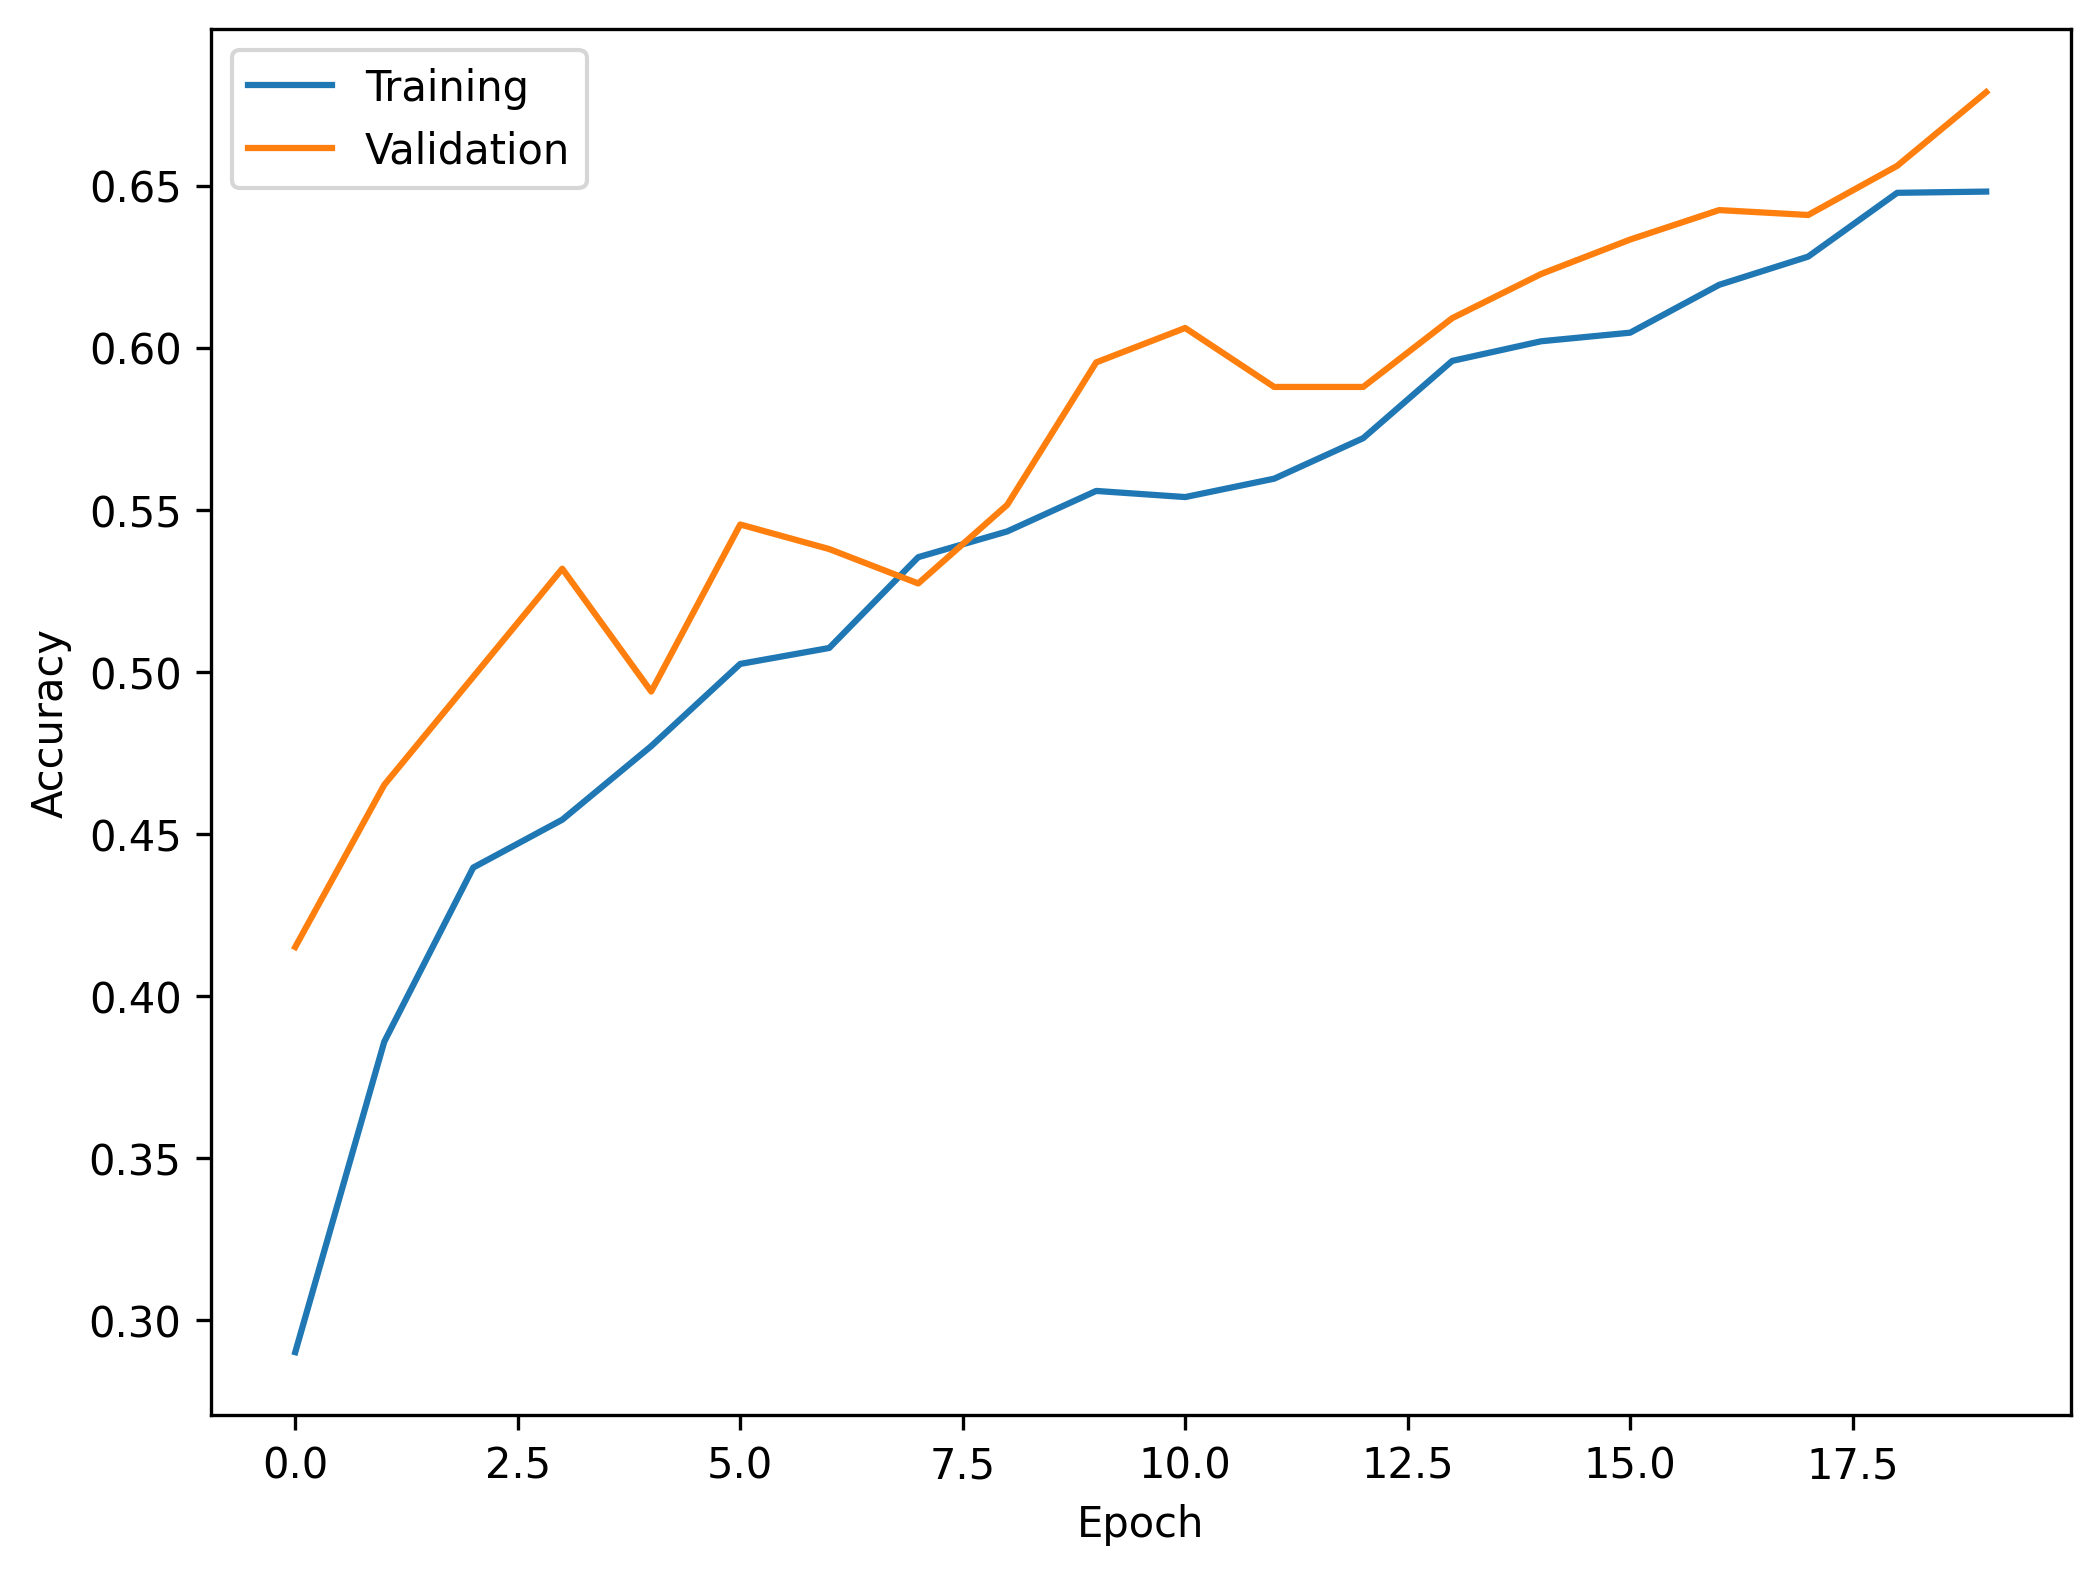

12/12 [==============================] - 0s 33ms/step


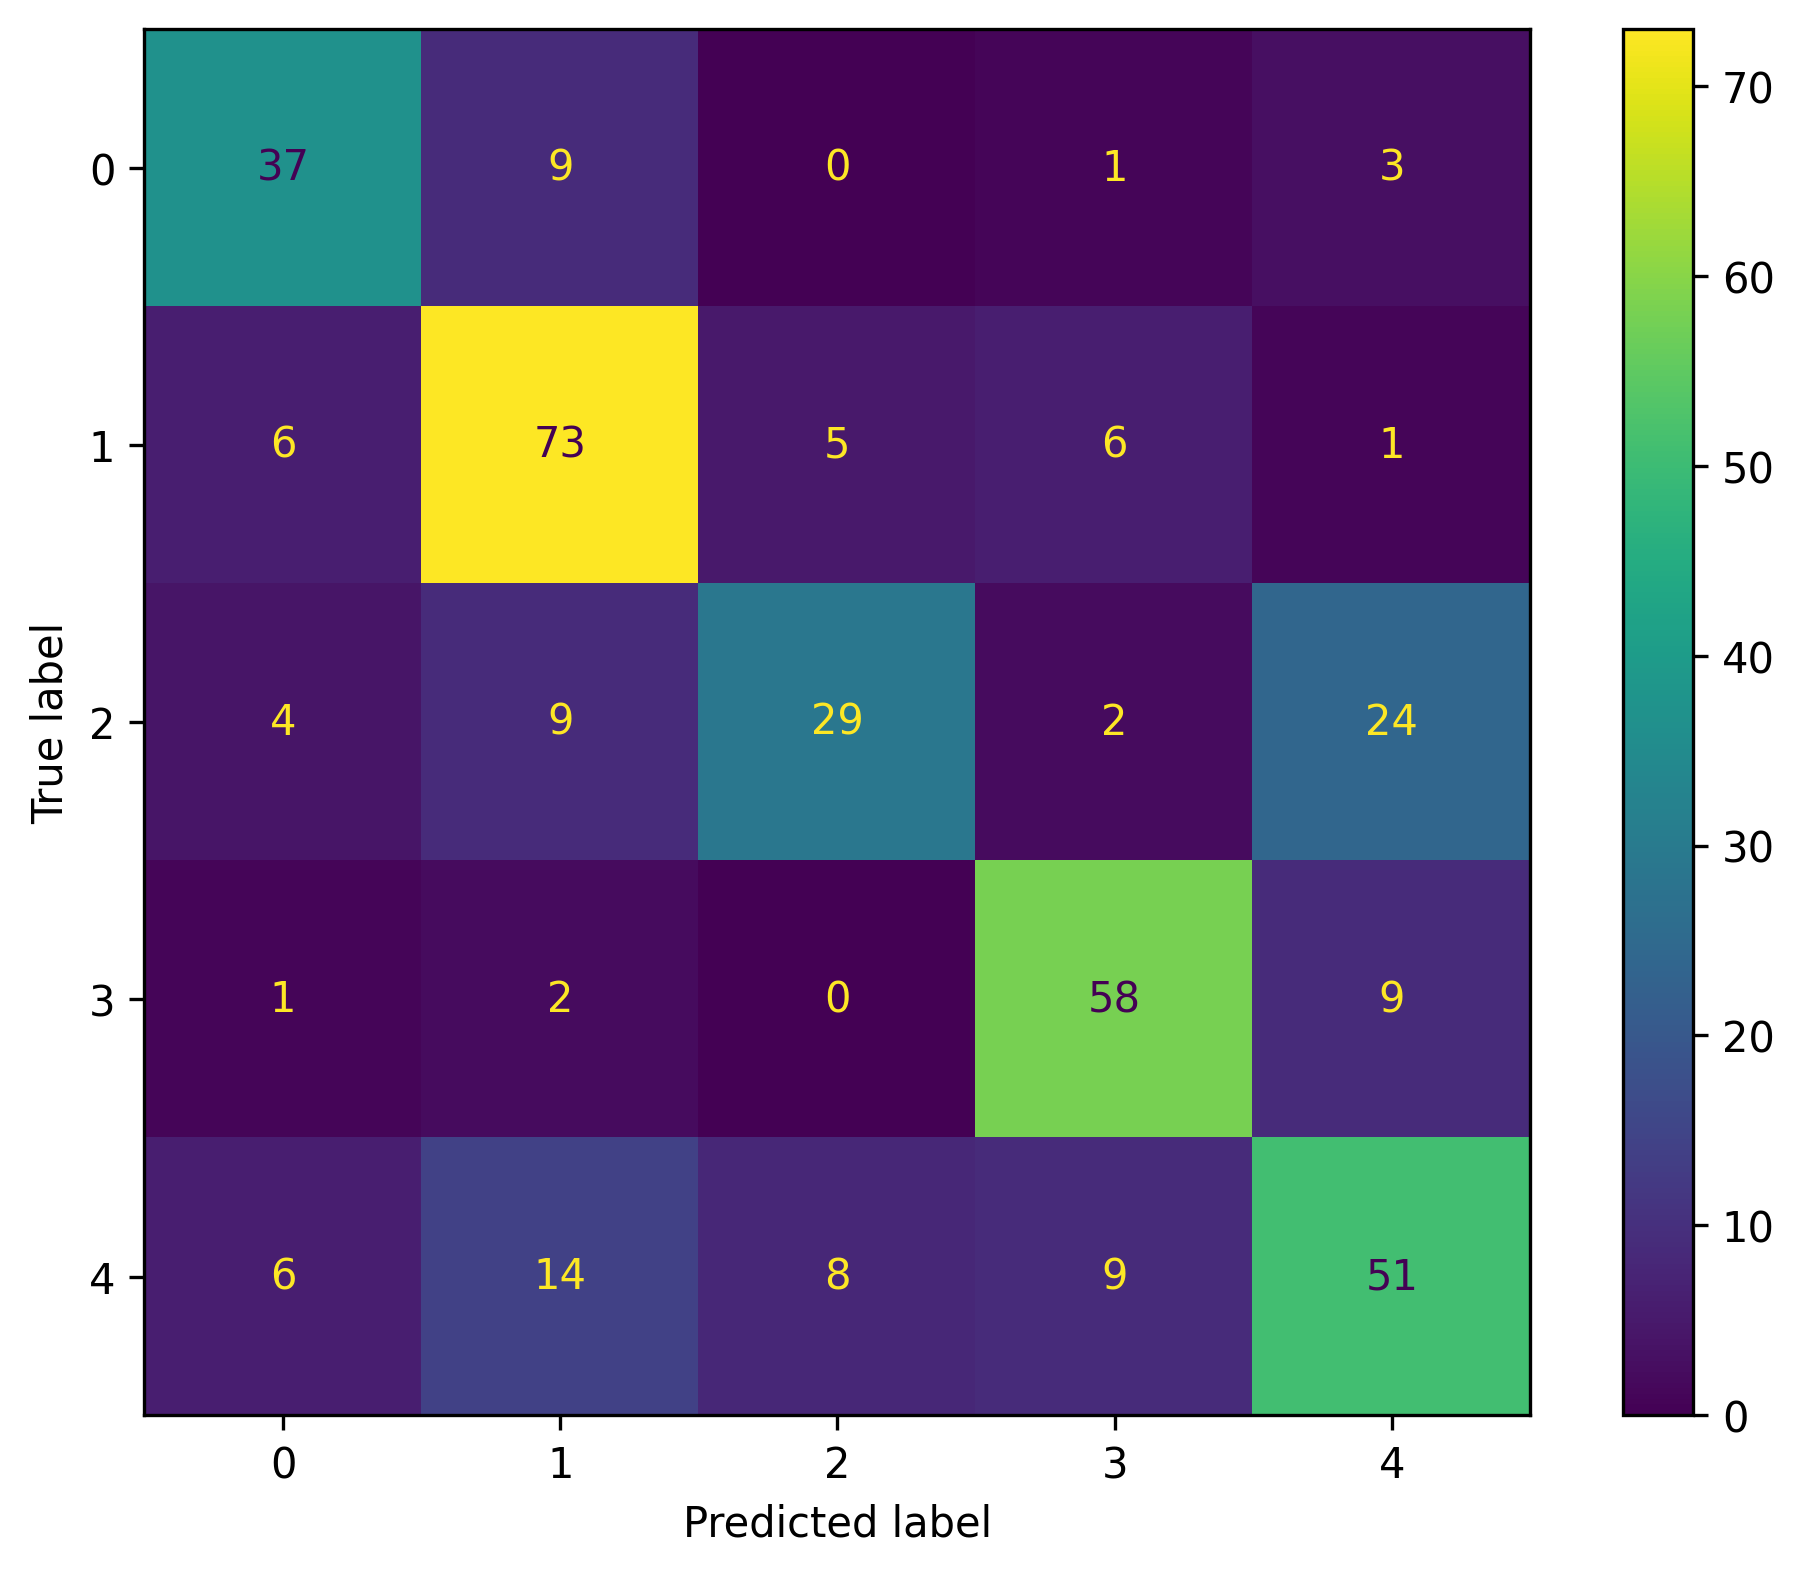

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        50
           1       0.68      0.80      0.74        91
           2       0.69      0.43      0.53        68
           3       0.76      0.83      0.79        70
           4       0.58      0.58      0.58        88

    accuracy                           0.68       367
   macro avg       0.68      0.68      0.67       367
weighted avg       0.67      0.68      0.67       367



In [35]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot.

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot
plt.show()



# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Introducing Batch Normalisation

In [36]:
# Importing the BatchNormalization layer from Keras.

from tensorflow.keras.layers import BatchNormalization

# Creating an instance of the Sequential class.

model = Sequential()

# Adding the first Convolutional layer. 

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer. In this example we have set the momentum parameter to 0.9

model.add(BatchNormalization(momentum = 0.9))

# Adding a second convolutional layer

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a second average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer. In this example we have set the momentum parameter to 0.9. 

model.add(BatchNormalization(momentum = 0.9))

# Adding a third convolutional layer, now with 128 filters.

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer. In this example we have set the momentum parameter to 0.9

model.add(BatchNormalization(momentum = 0.9))

# flattening the output to a 1-dimensional array,

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model.

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d_3 (Avera  (None, 64, 64, 32)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_4 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                      

In [37]:
# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compiling the model.

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128

# Fitting the model, and recording the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size =batch_size, subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

Epoch 1/20
21/21 [==============================] - 36s 2s/step - loss: 1.6975 - accuracy: 0.3999 - val_loss: 1.9627 - val_accuracy: 0.2470
Epoch 2/20
21/21 [==============================] - 34s 2s/step - loss: 1.3487 - accuracy: 0.4949 - val_loss: 1.4274 - val_accuracy: 0.4576
Epoch 3/20
21/21 [==============================] - 34s 2s/step - loss: 1.2114 - accuracy: 0.5320 - val_loss: 1.1534 - val_accuracy: 0.5545
Epoch 4/20
21/21 [==============================] - 34s 2s/step - loss: 1.1067 - accuracy: 0.5808 - val_loss: 0.9927 - val_accuracy: 0.6030
Epoch 5/20
21/21 [==============================] - 35s 2s/step - loss: 1.0428 - accuracy: 0.5940 - val_loss: 1.0543 - val_accuracy: 0.6152
Epoch 6/20
21/21 [==============================] - 35s 2s/step - loss: 1.0122 - accuracy: 0.6065 - val_loss: 0.9710 - val_accuracy: 0.6167
Epoch 7/20
21/21 [==============================] - 36s 2s/step - loss: 0.9836 - accuracy: 0.6179 - val_loss: 0.9513 - val_accuracy: 0.6121
Epoch 8/20
21/21 [==

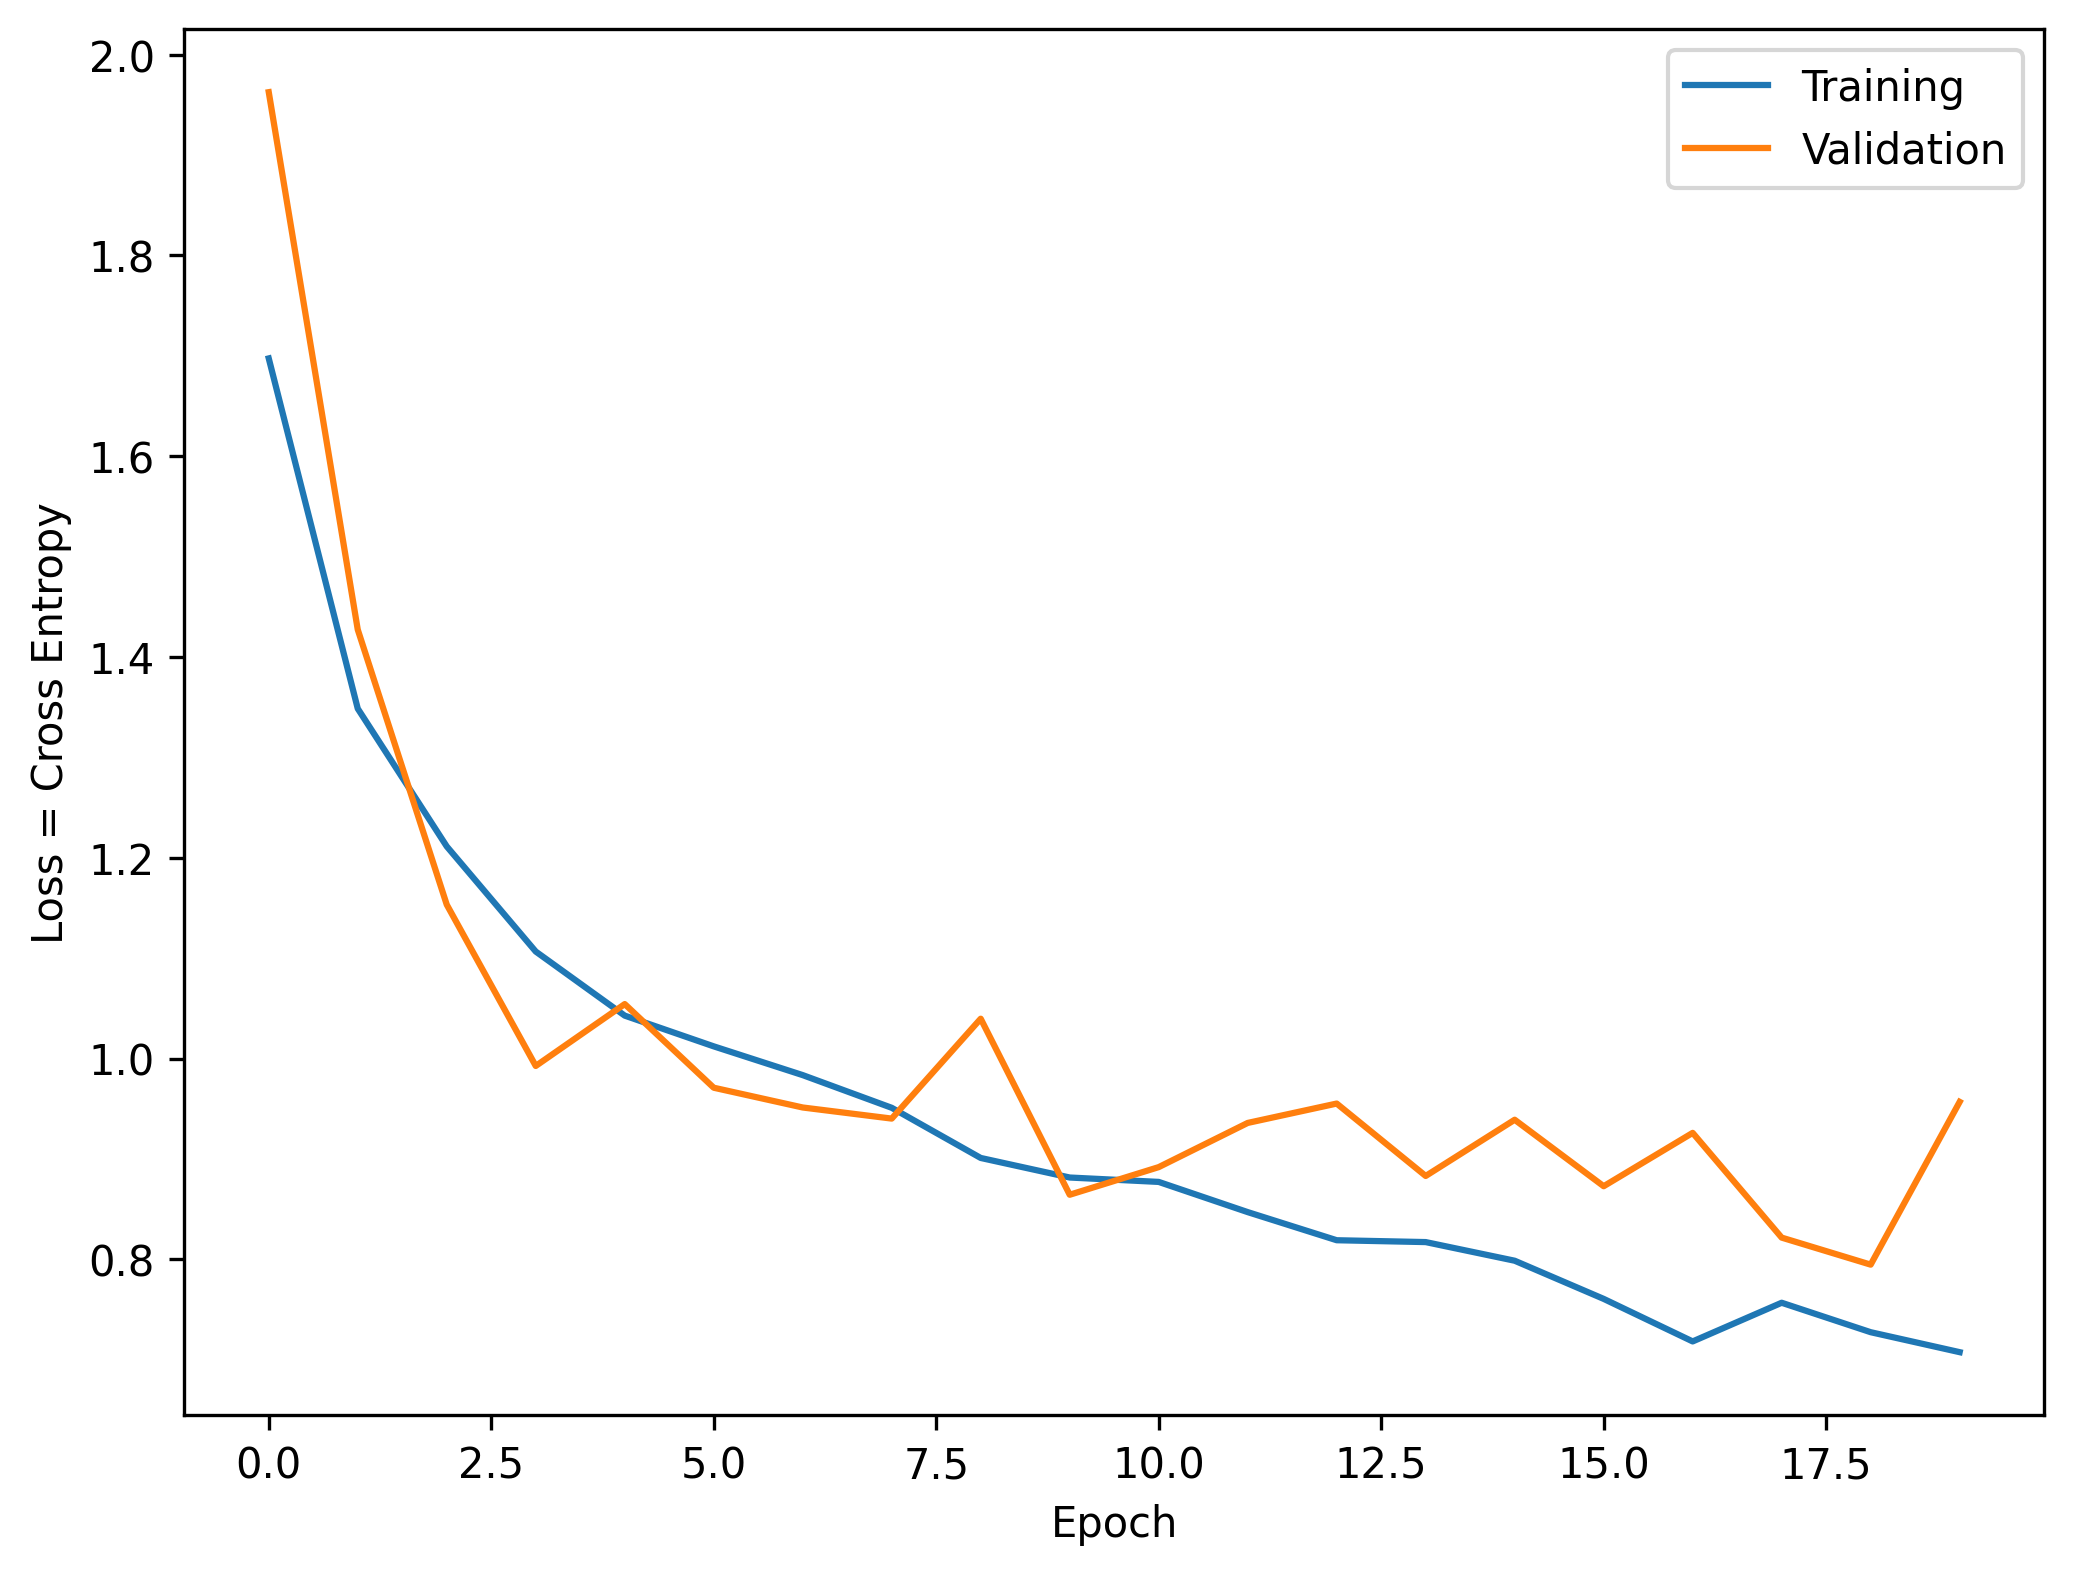

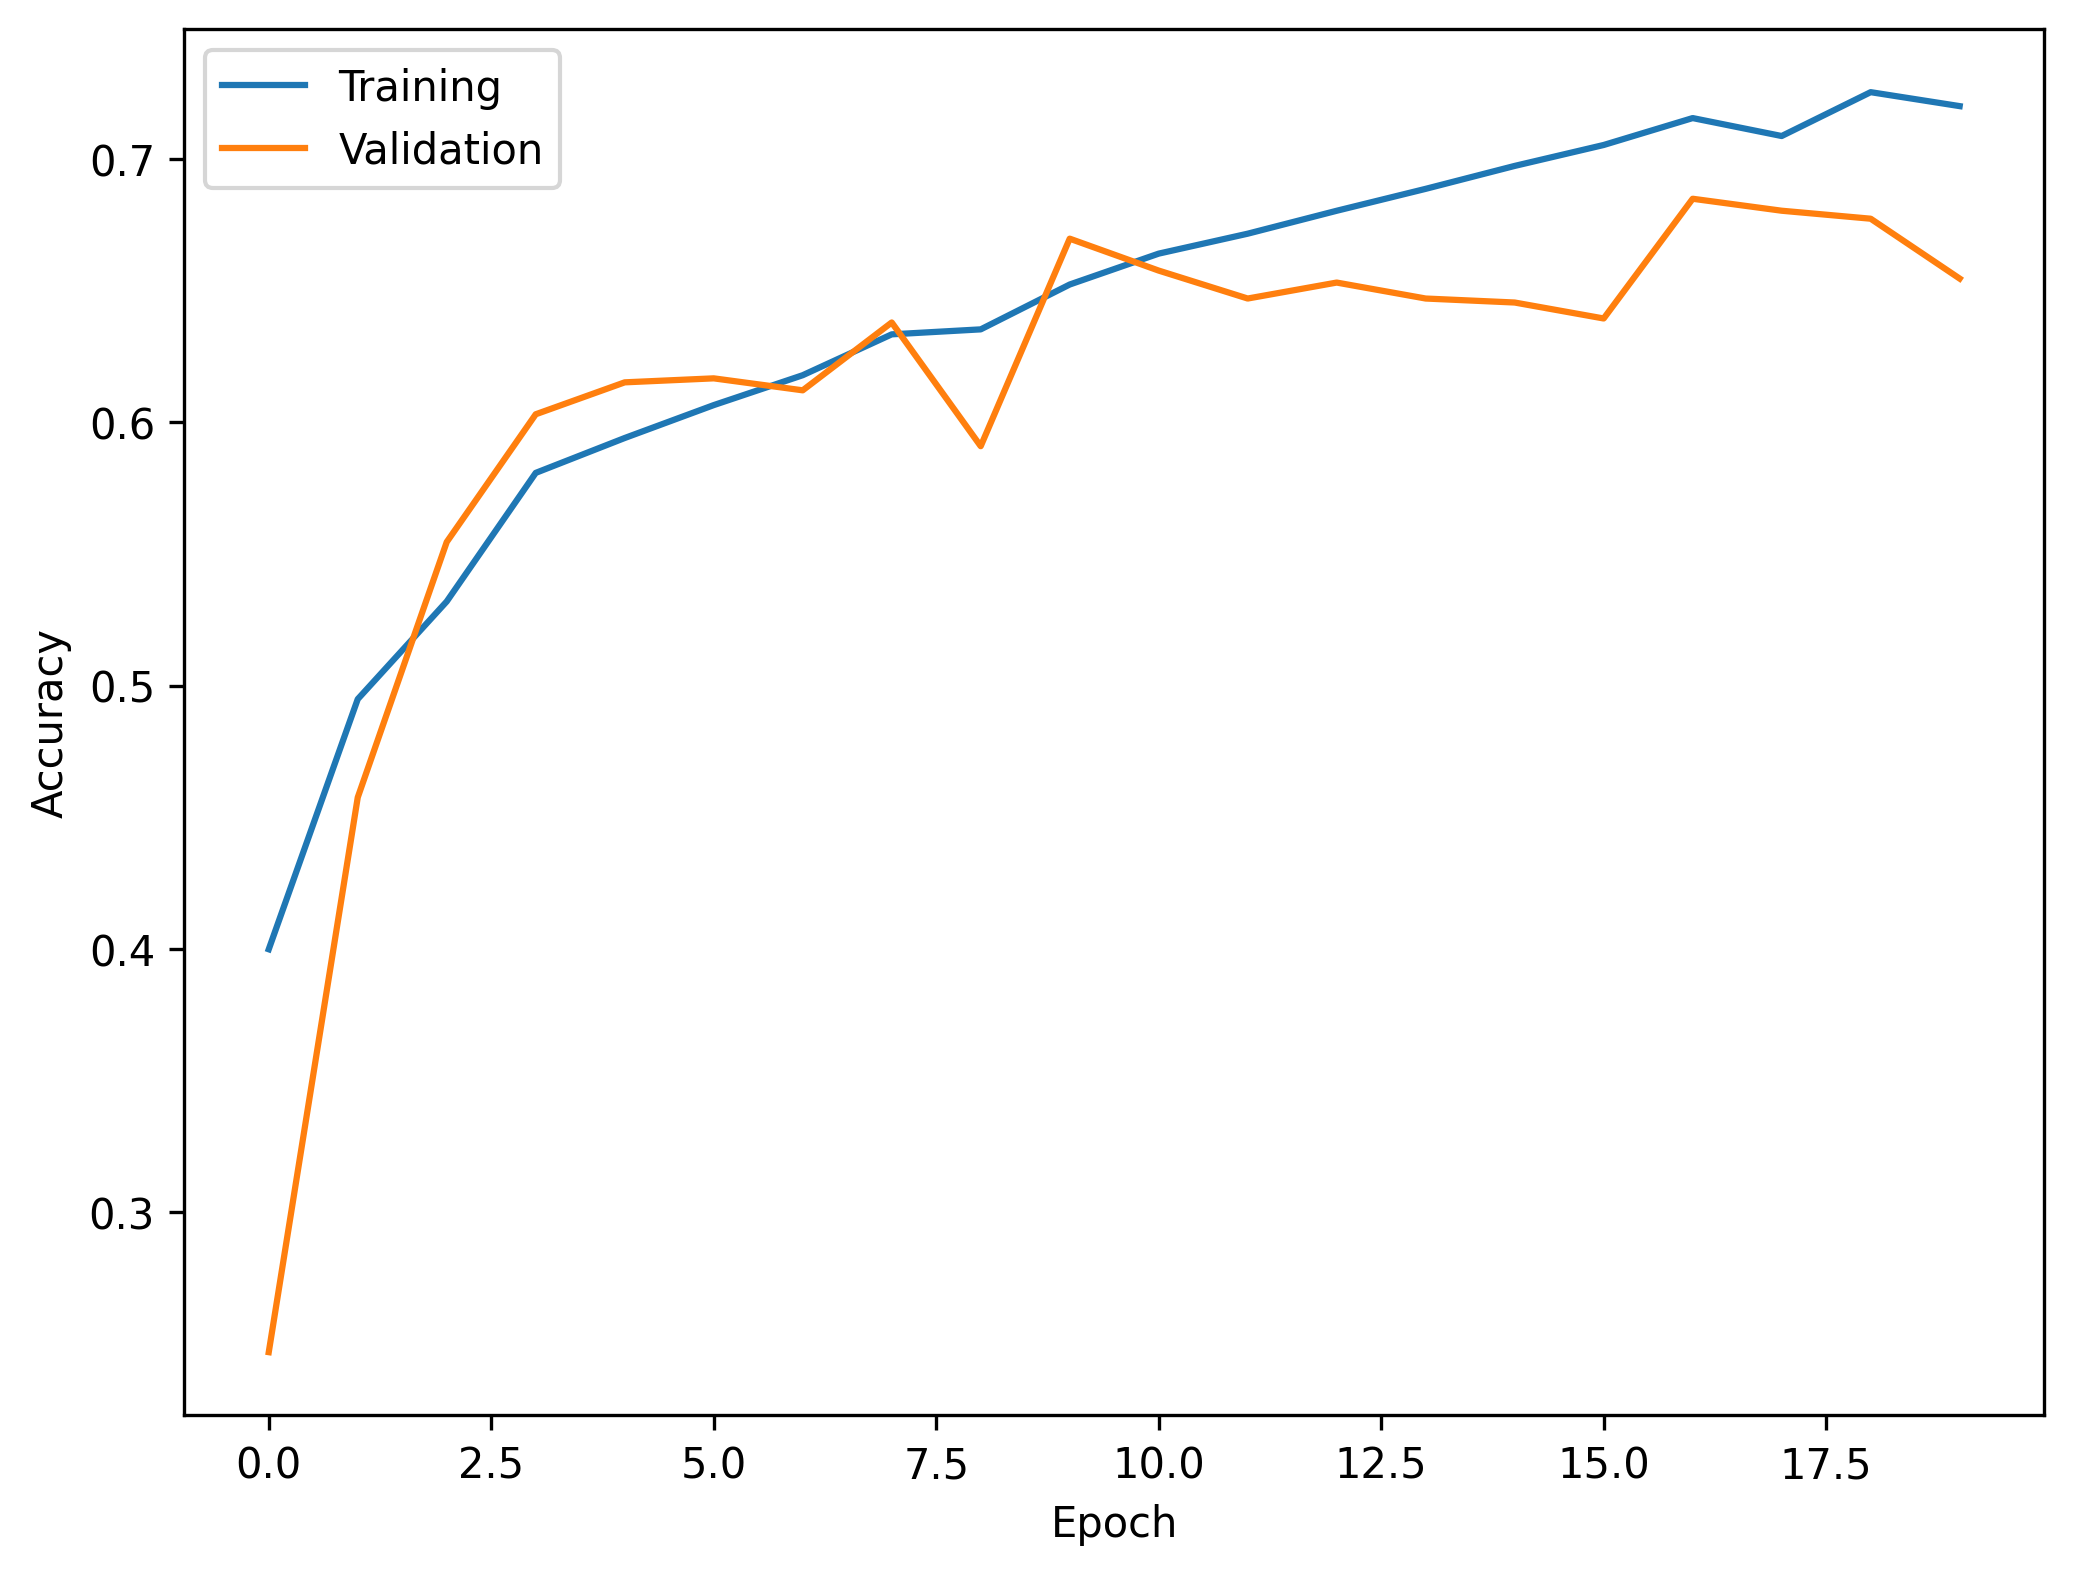

12/12 [==============================] - 1s 54ms/step


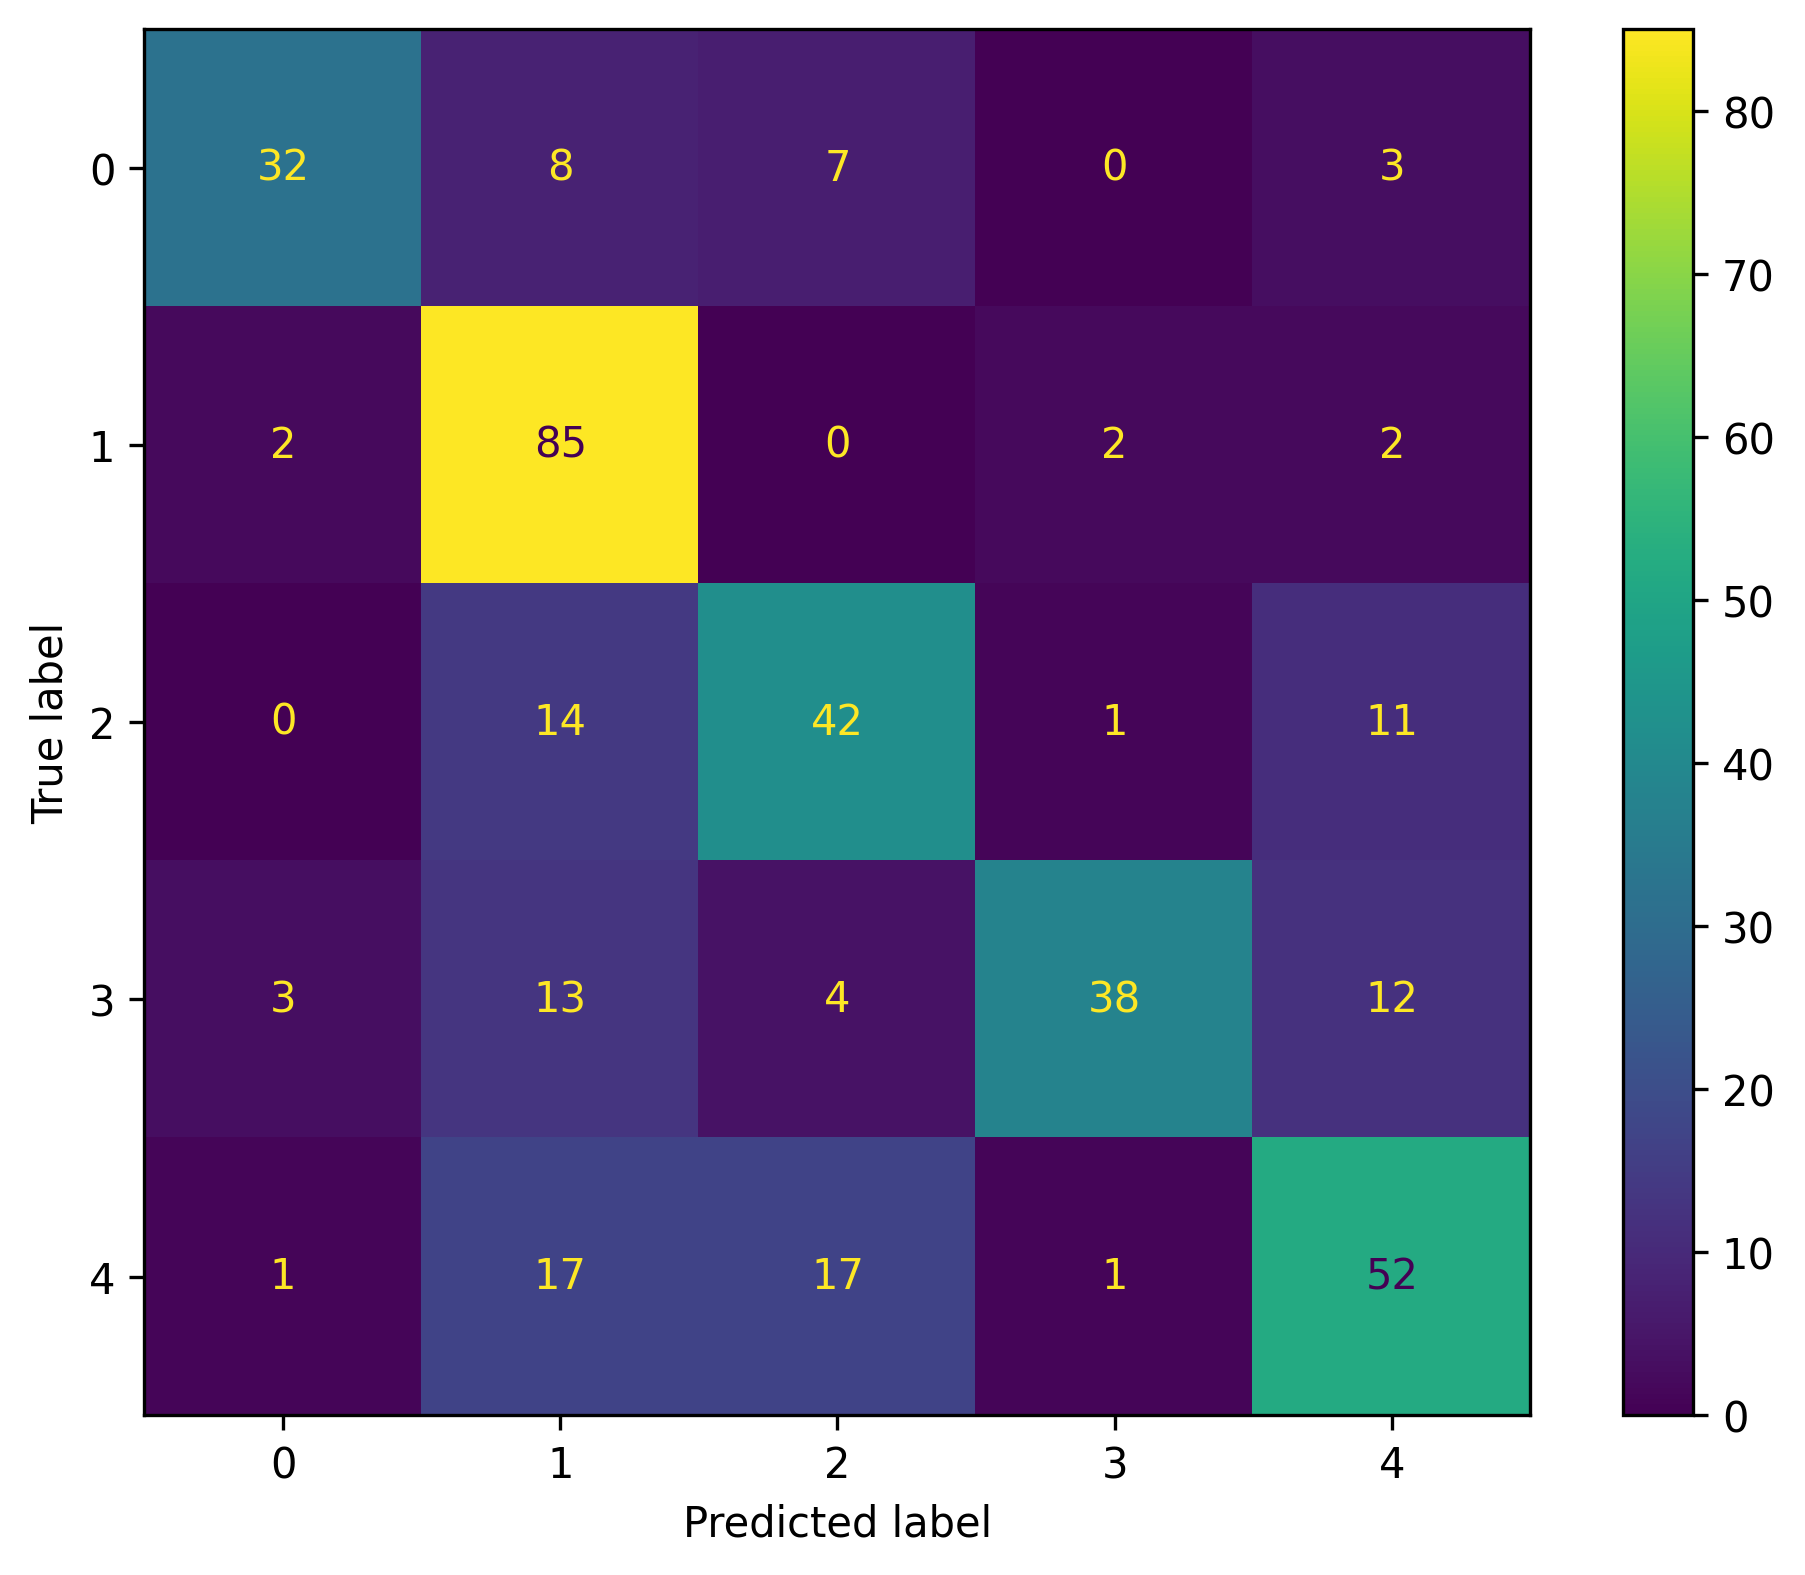

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        50
           1       0.62      0.93      0.75        91
           2       0.60      0.62      0.61        68
           3       0.90      0.54      0.68        70
           4       0.65      0.59      0.62        88

    accuracy                           0.68       367
   macro avg       0.72      0.67      0.68       367
weighted avg       0.71      0.68      0.67       367



In [38]:
# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes.

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot.

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot
plt.show()



# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Learning rate 0.0001

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d_9 (Avera  (None, 64, 64, 32)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_10 (Aver  (None, 16, 16, 64)        0         
 agePooling2D)                                                   
                                                     

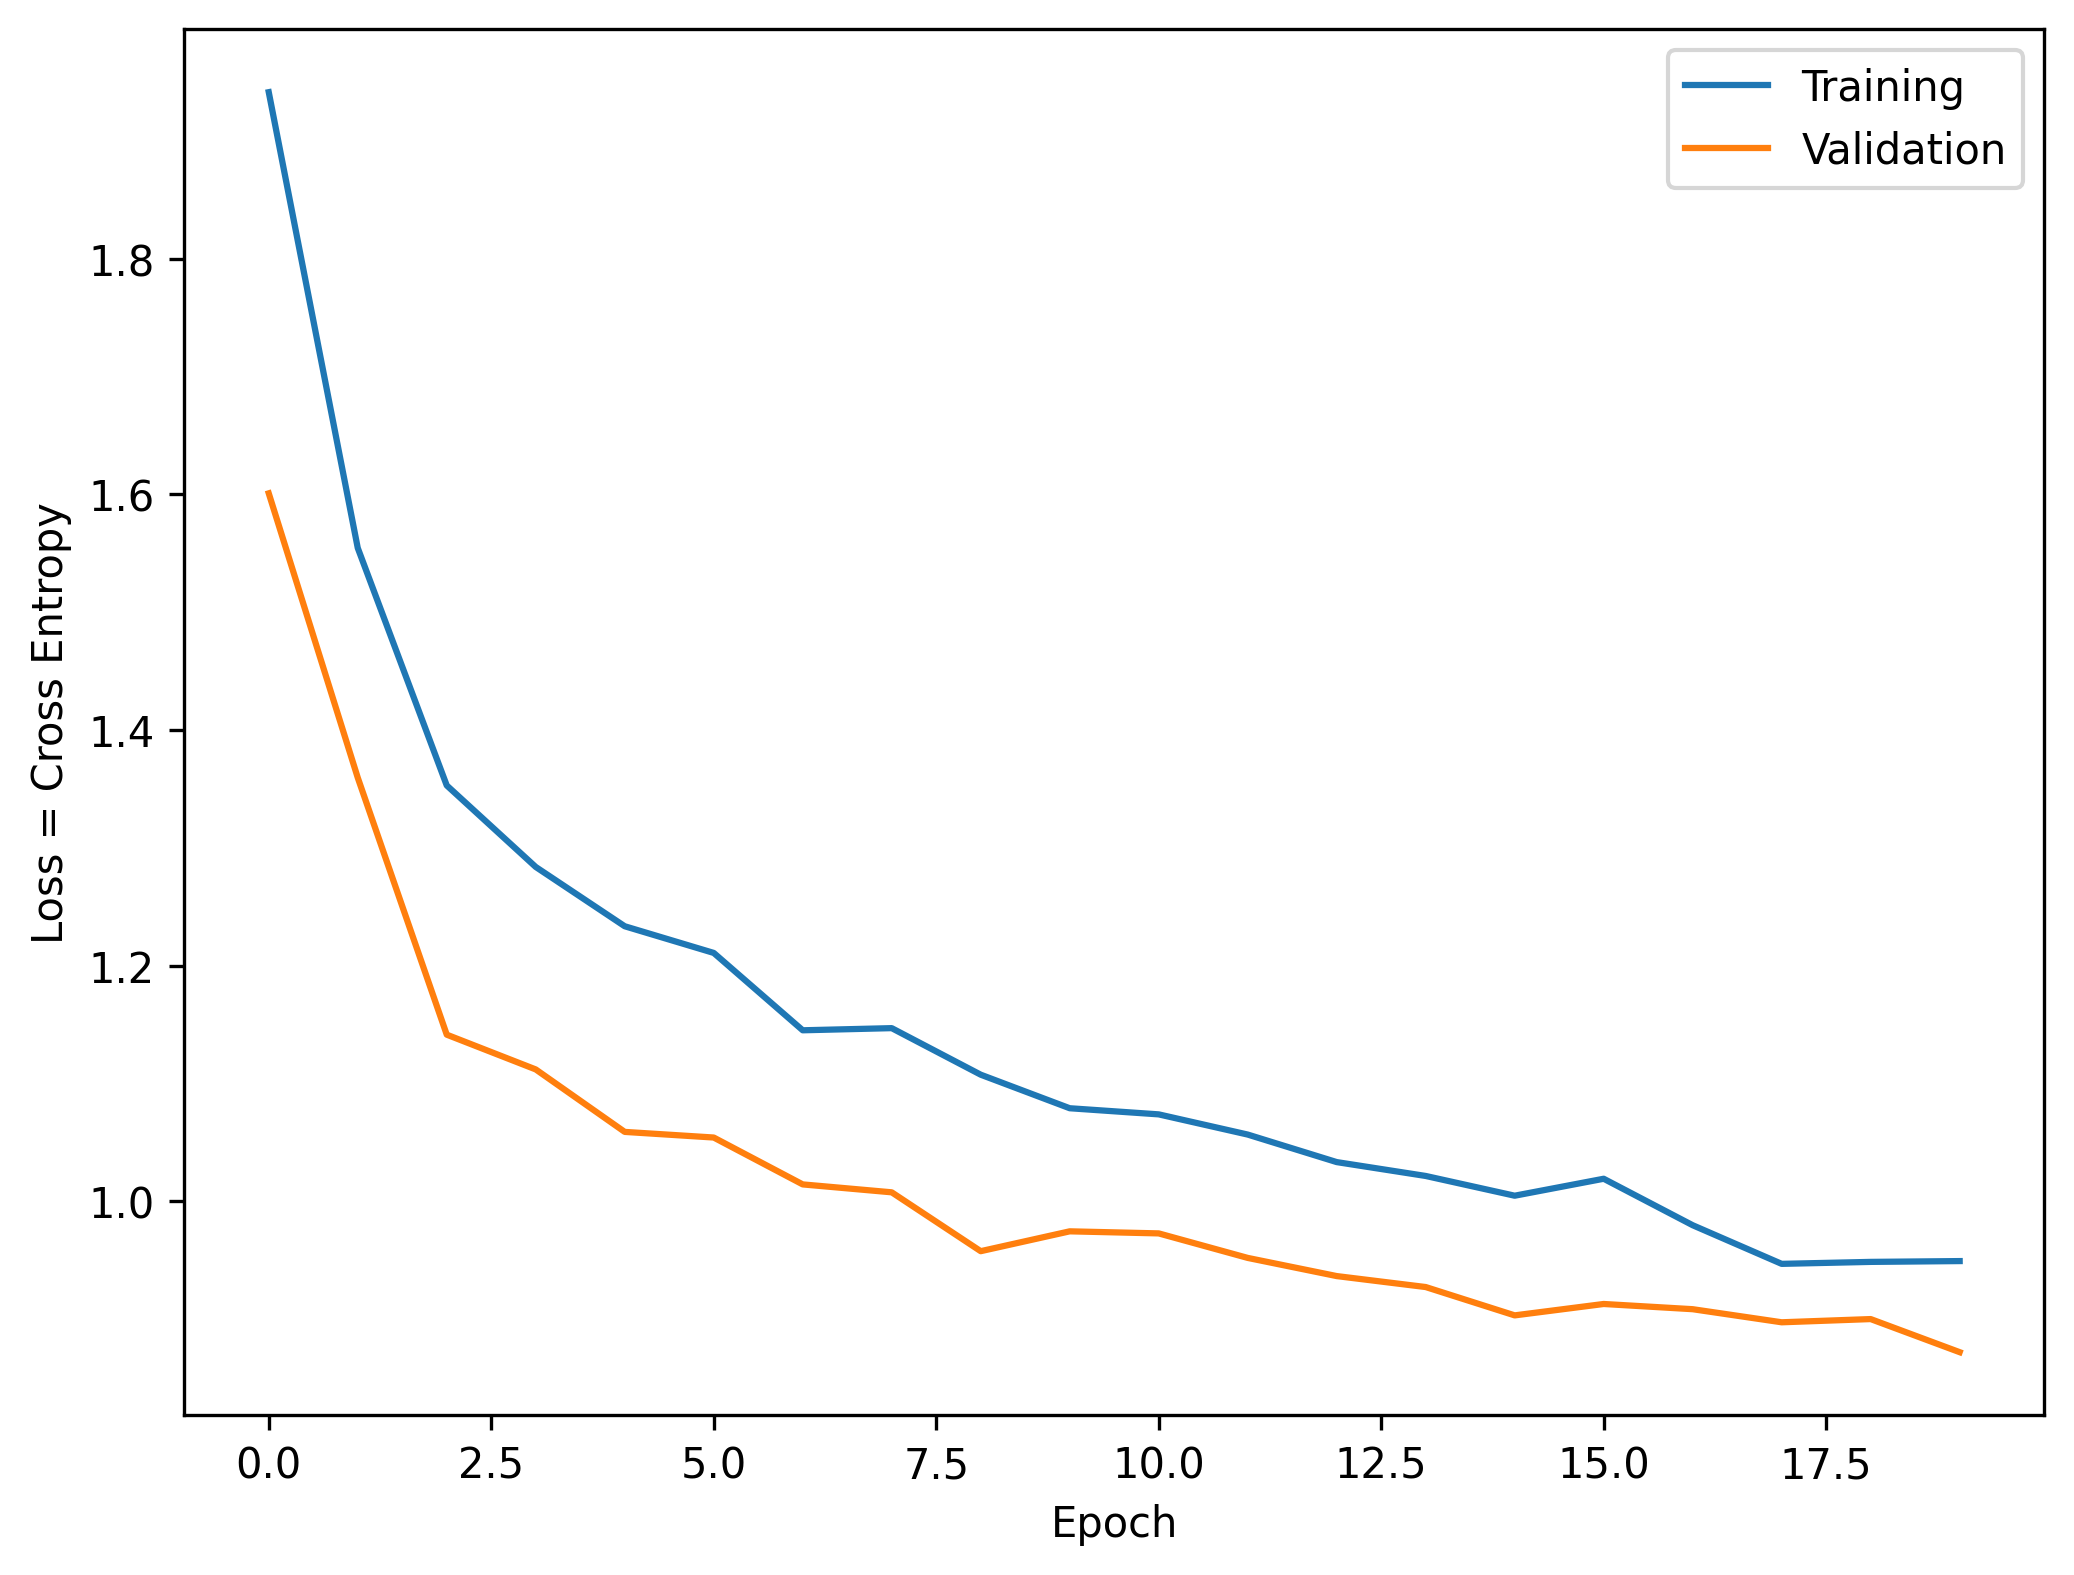

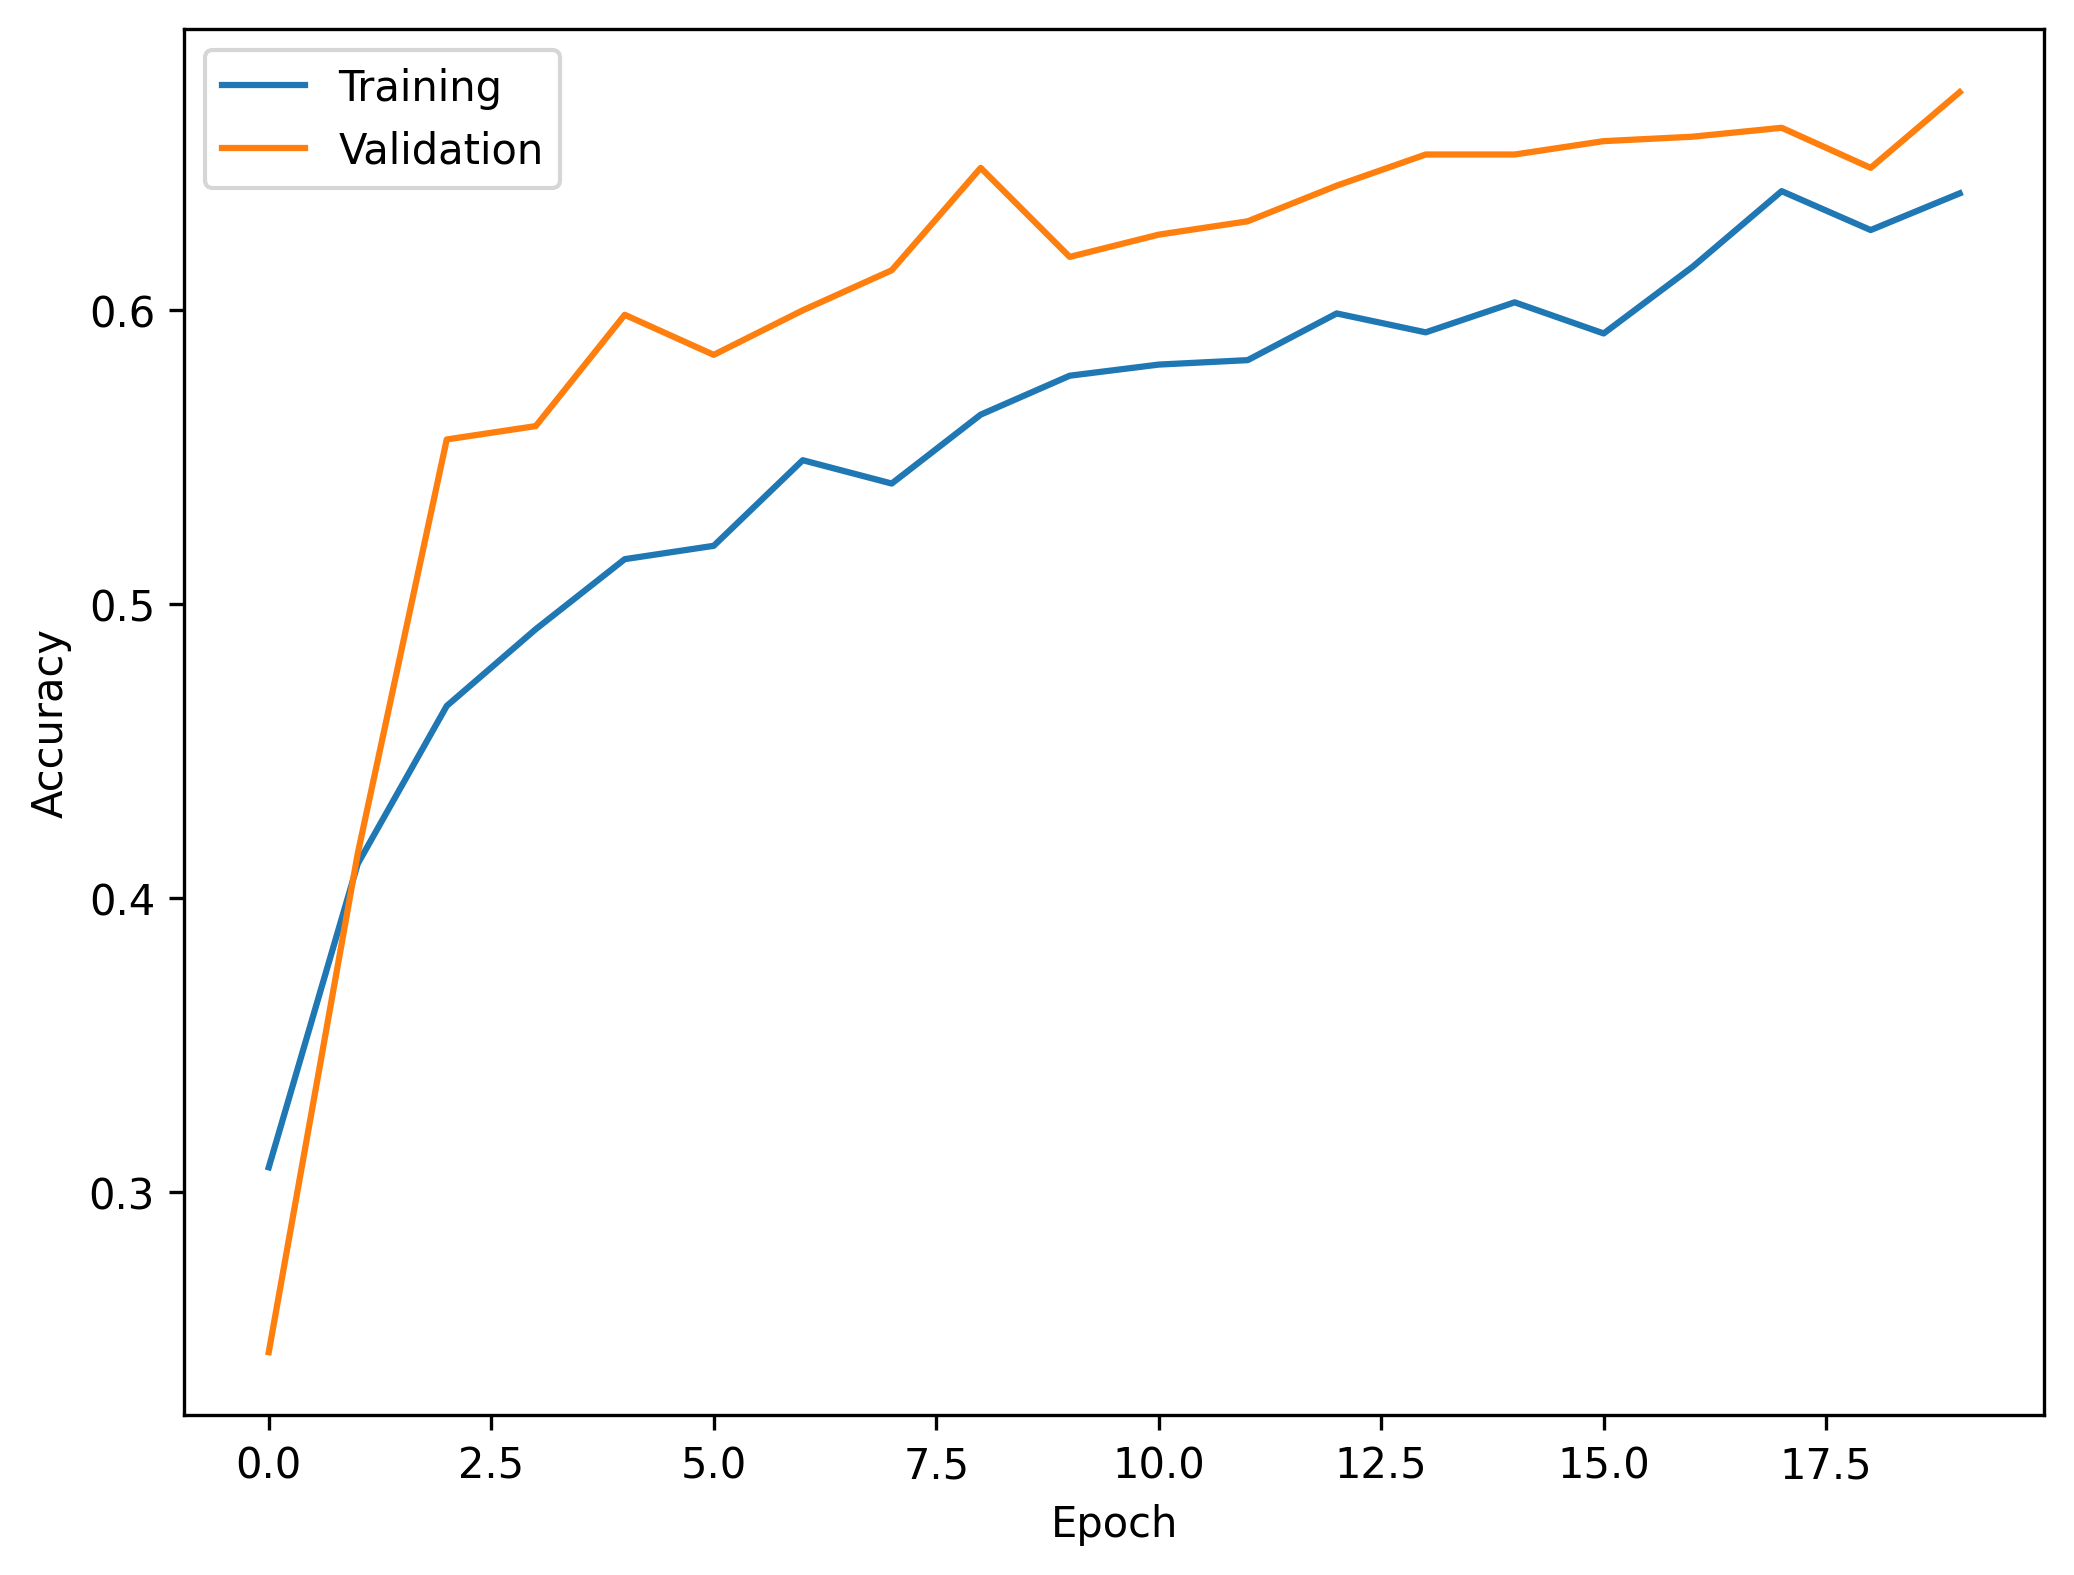

12/12 [==============================] - 1s 49ms/step


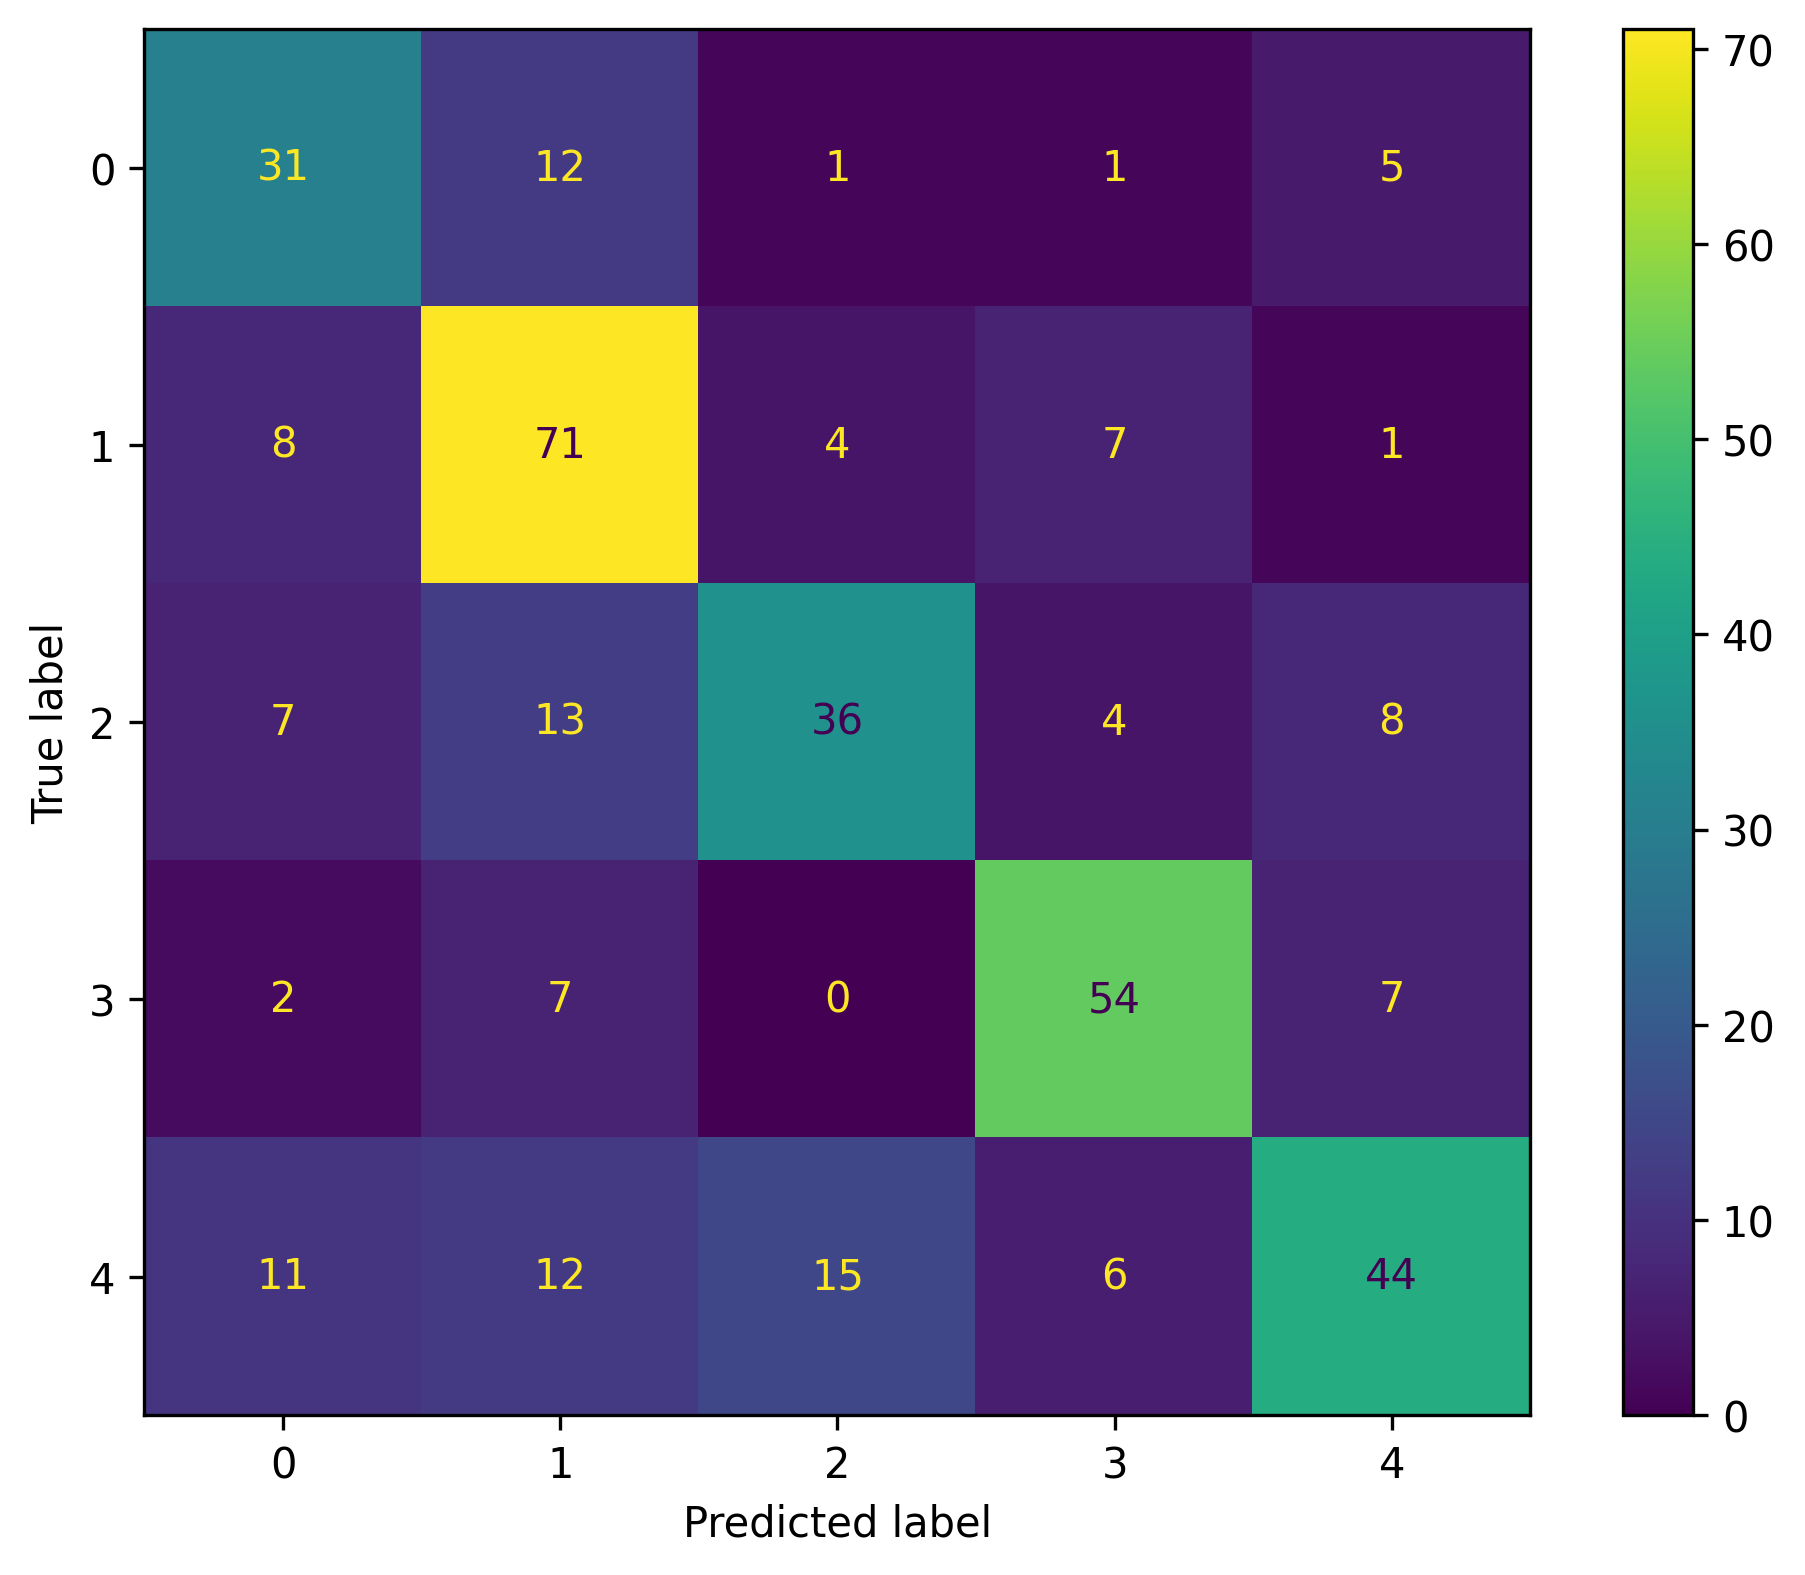

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        50
           1       0.62      0.78      0.69        91
           2       0.64      0.53      0.58        68
           3       0.75      0.77      0.76        70
           4       0.68      0.50      0.58        88

    accuracy                           0.64       367
   macro avg       0.64      0.64      0.63       367
weighted avg       0.65      0.64      0.64       367



In [40]:
# Creating an instance of the Sequential class.

model = Sequential()
# Adding the first Convolutional layer. 

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer 

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applyig Batch normalisation to the pooling layer. 

model.add(BatchNormalization(momentum = 0.9))

# Adding a second convolutional layer

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second average pooling layer

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer

model.add(BatchNormalization(momentum = 0.9))

# Adding a third convolutional layer, now with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third average pooling layer

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer

model.add(BatchNormalization(momentum = 0.9))

# Flattening the output to a 1-dimensional array,

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer

model.add(Dropout(0.5))

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model

model.summary()

# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.0001)

# Compiling the model

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128
# Fitting the model, and record the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

## Learning rate 0.01

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d_13 (Aver  (None, 64, 64, 32)        0         
 agePooling2D)                                                   
                                                                 
 batch_normalization_9 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_14 (Aver  (None, 16, 16, 64)        0         
 agePooling2D)                                                   
                                                     

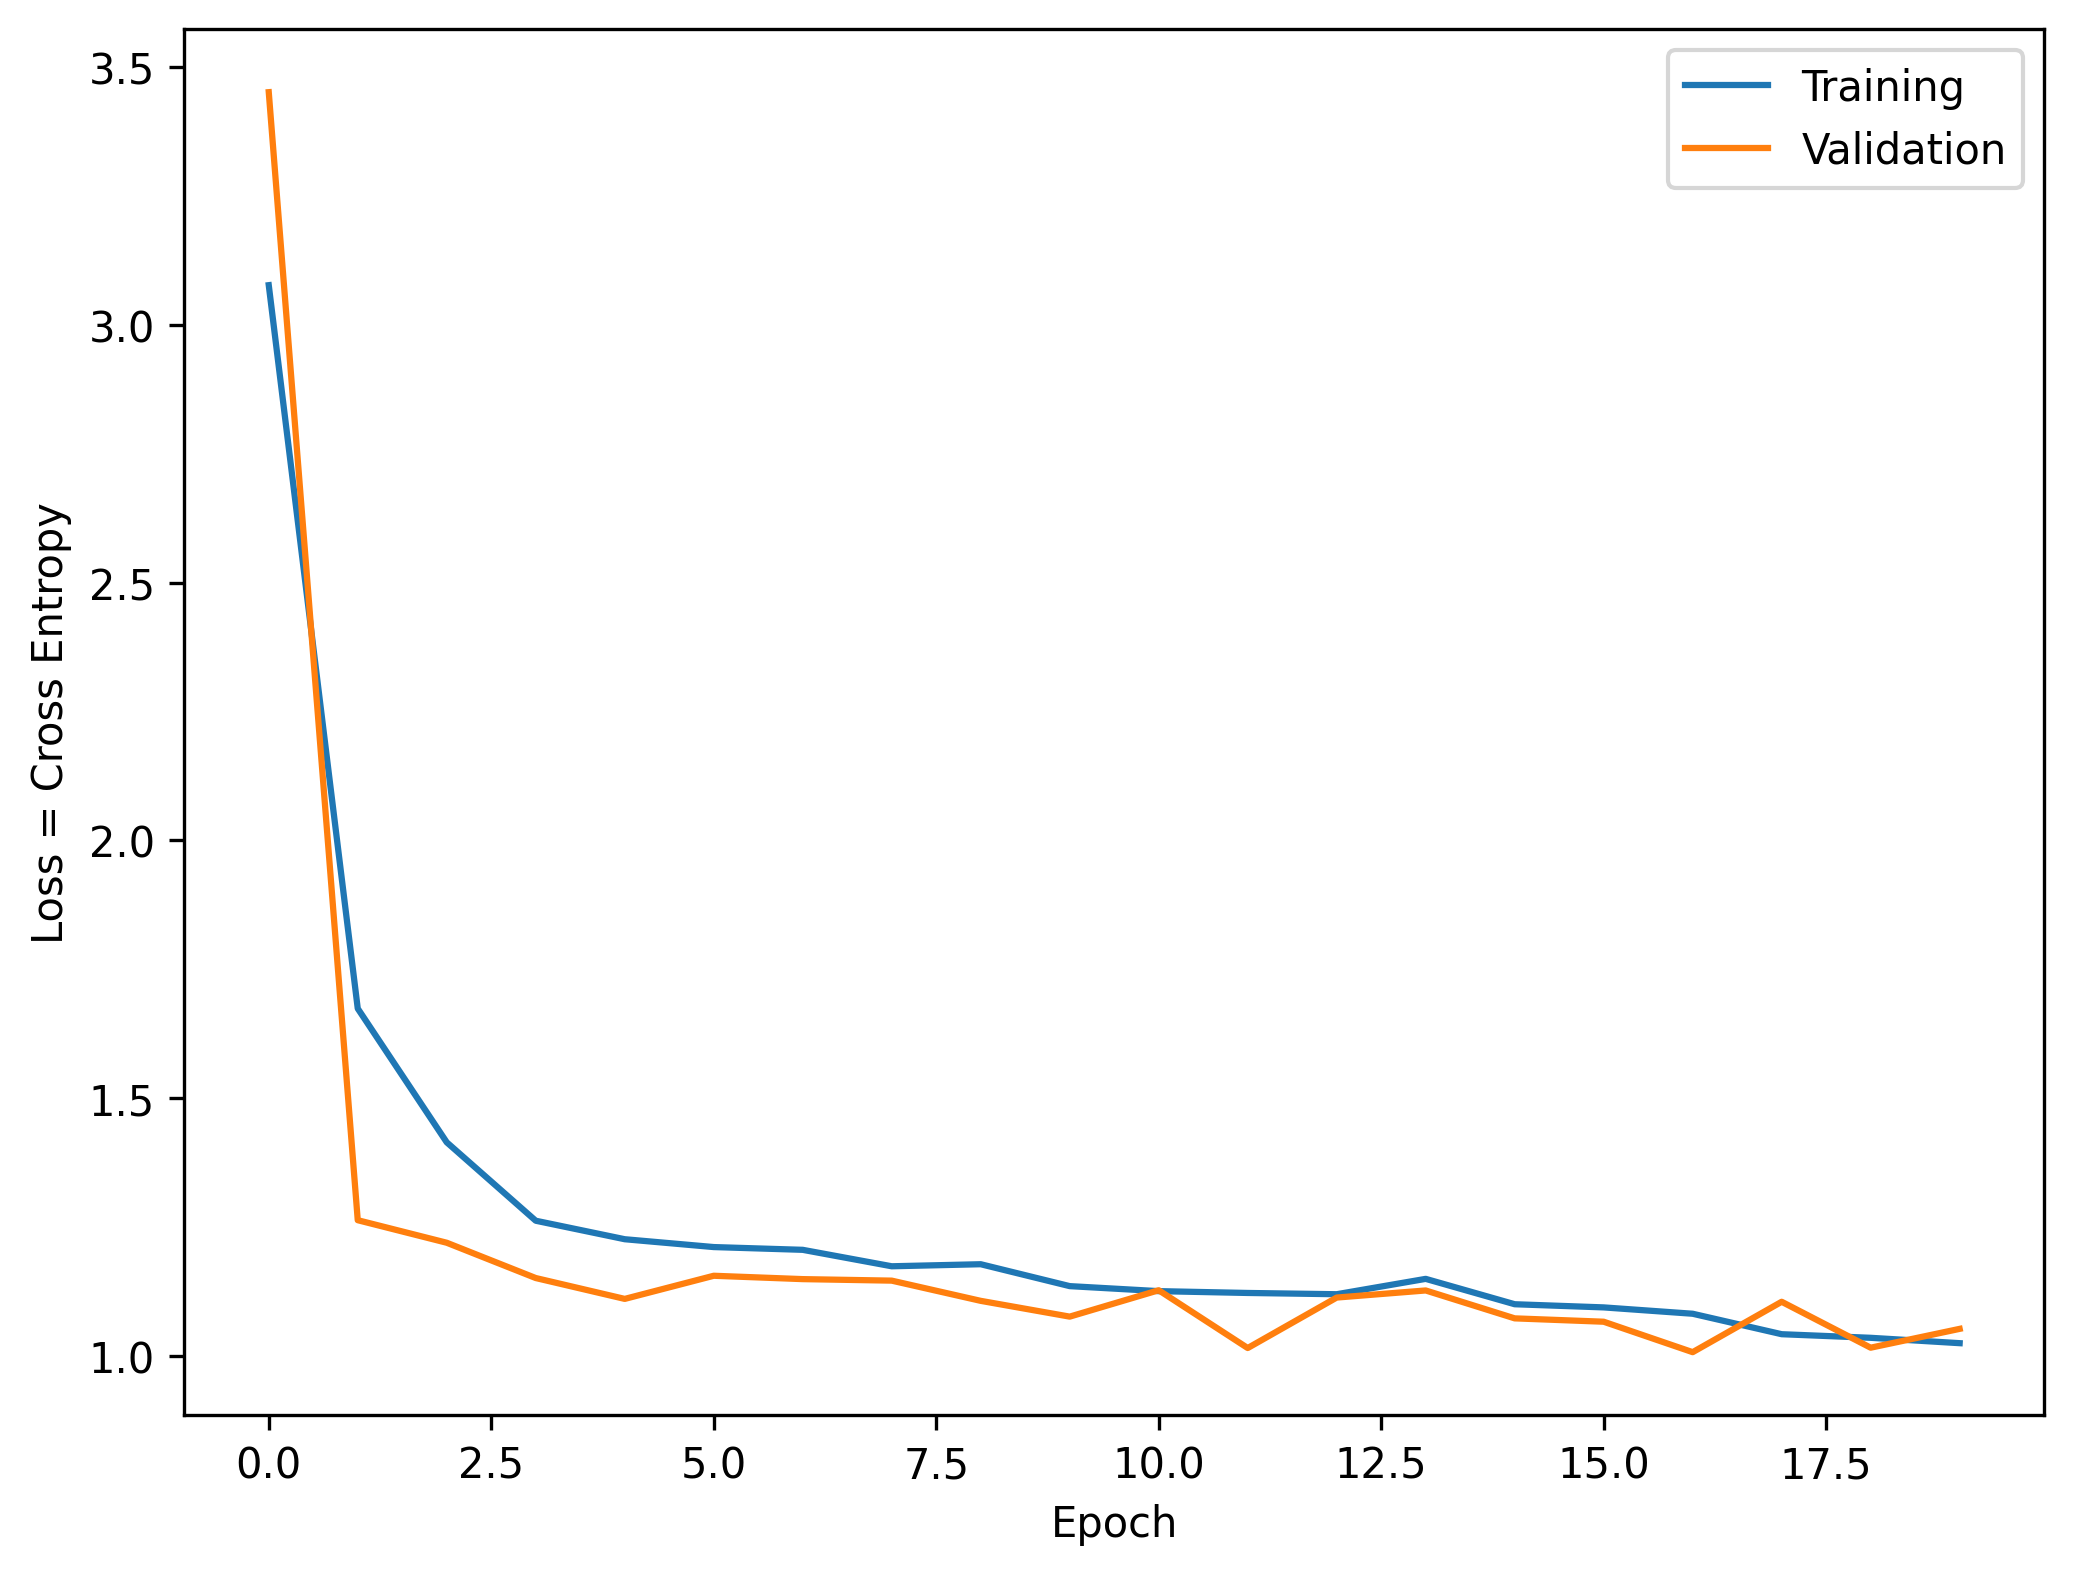

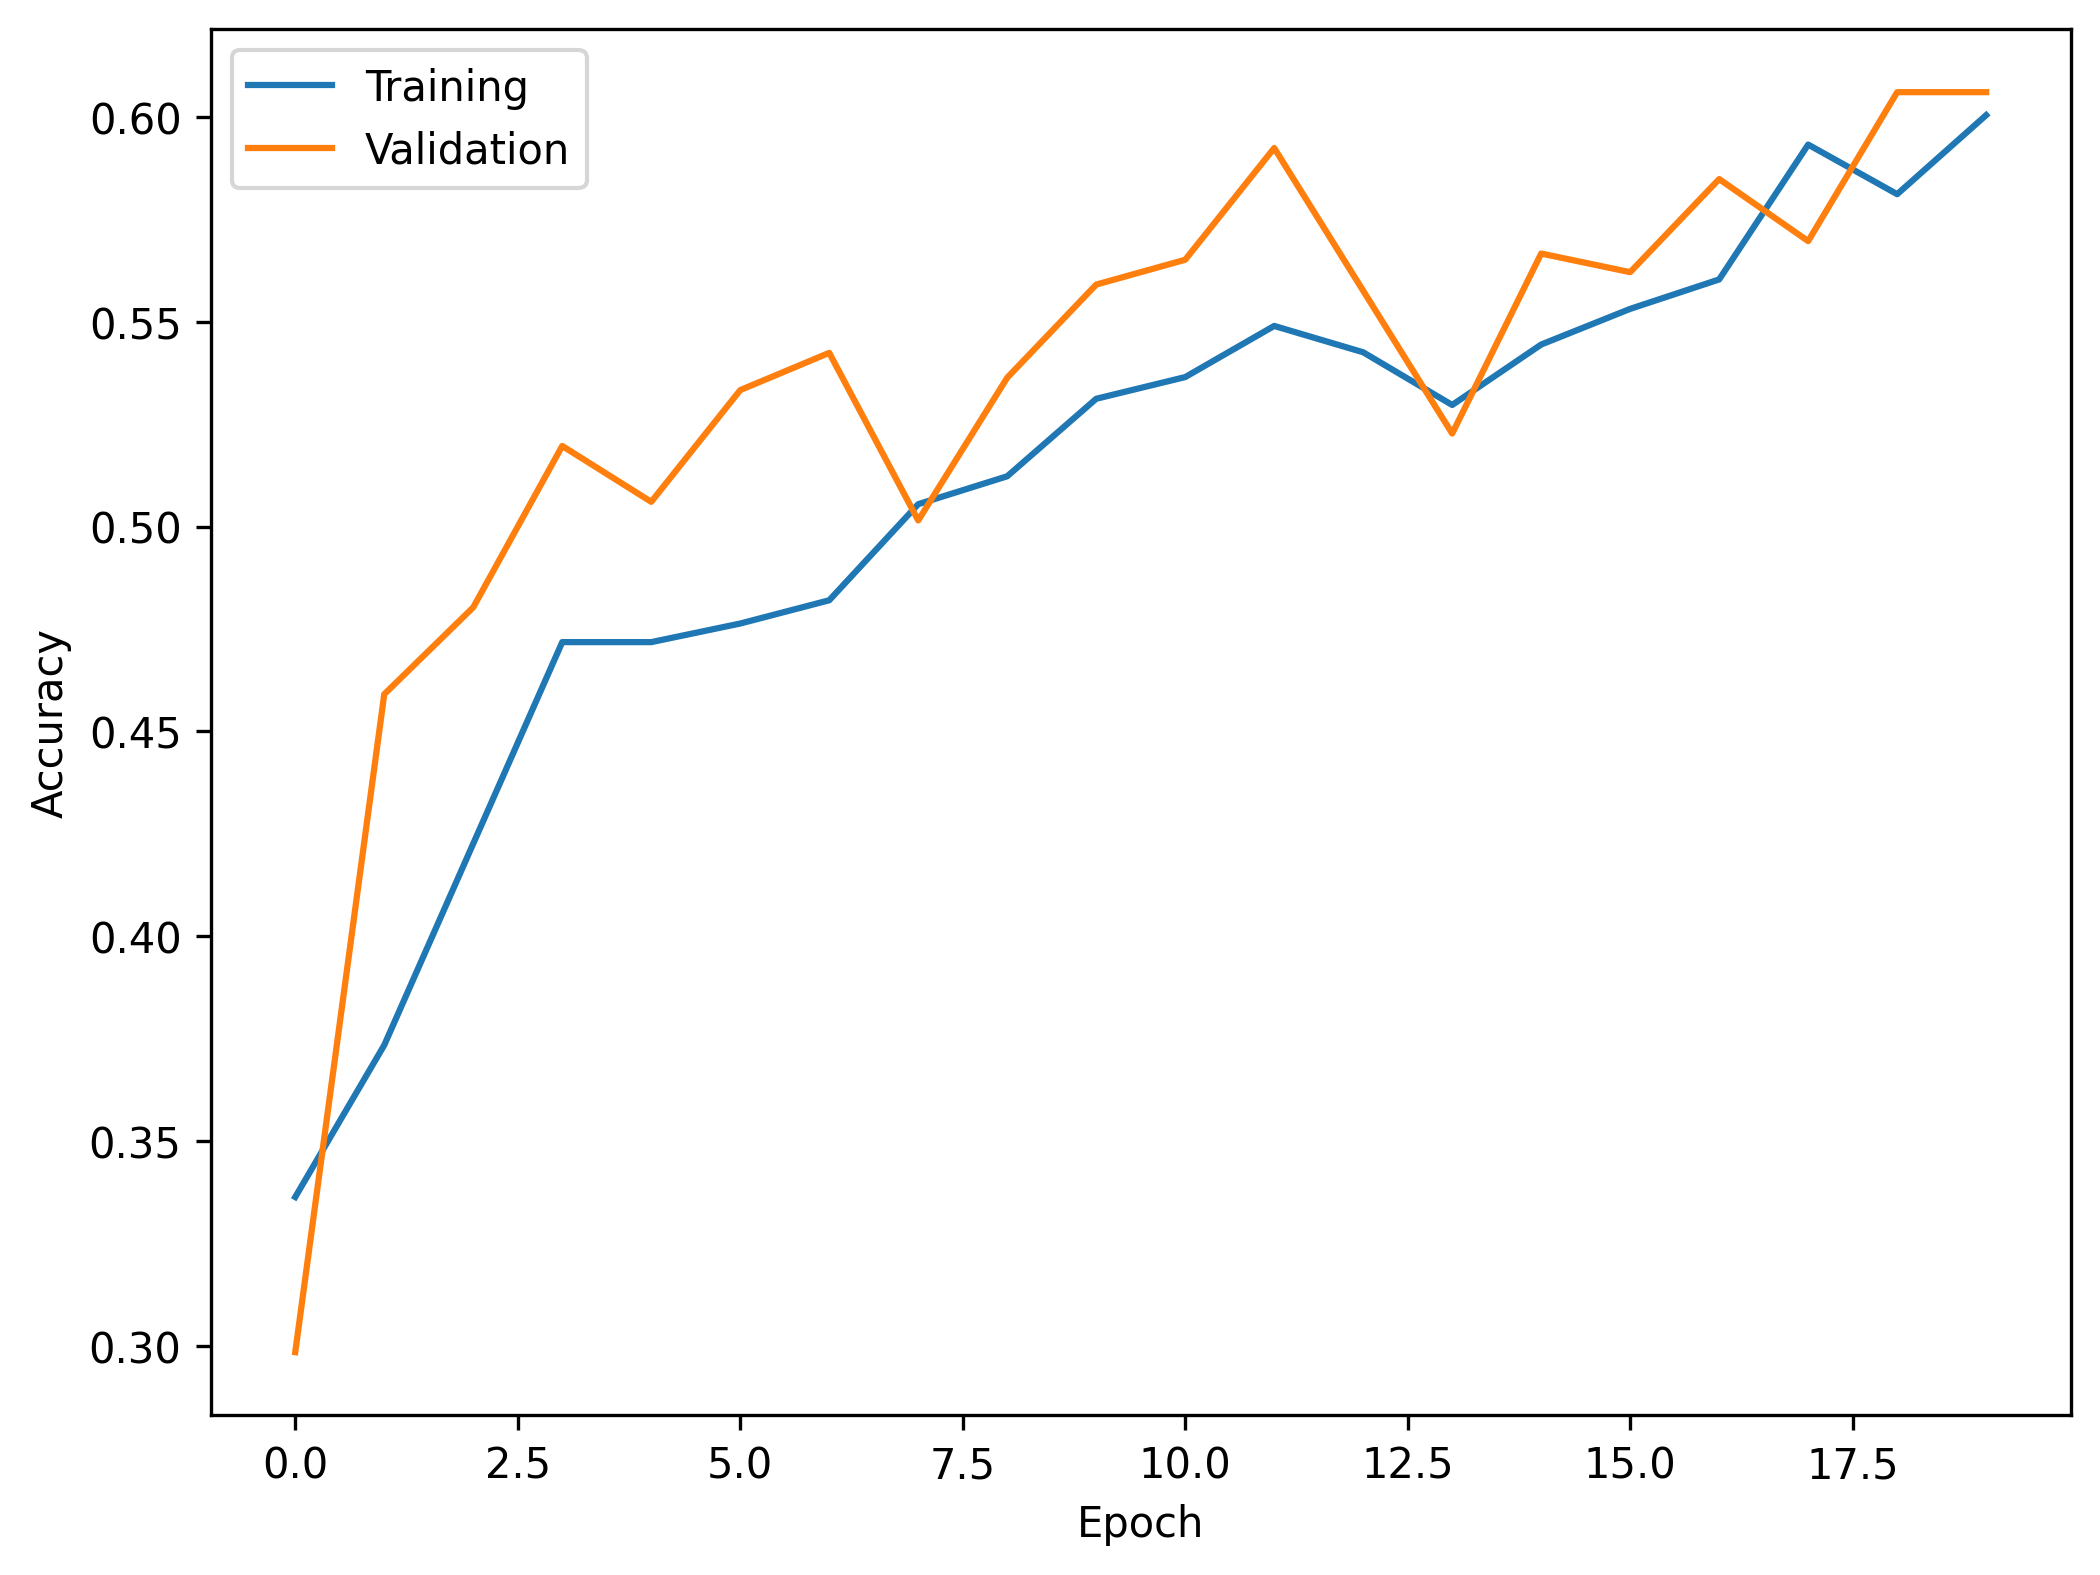

12/12 [==============================] - 1s 42ms/step


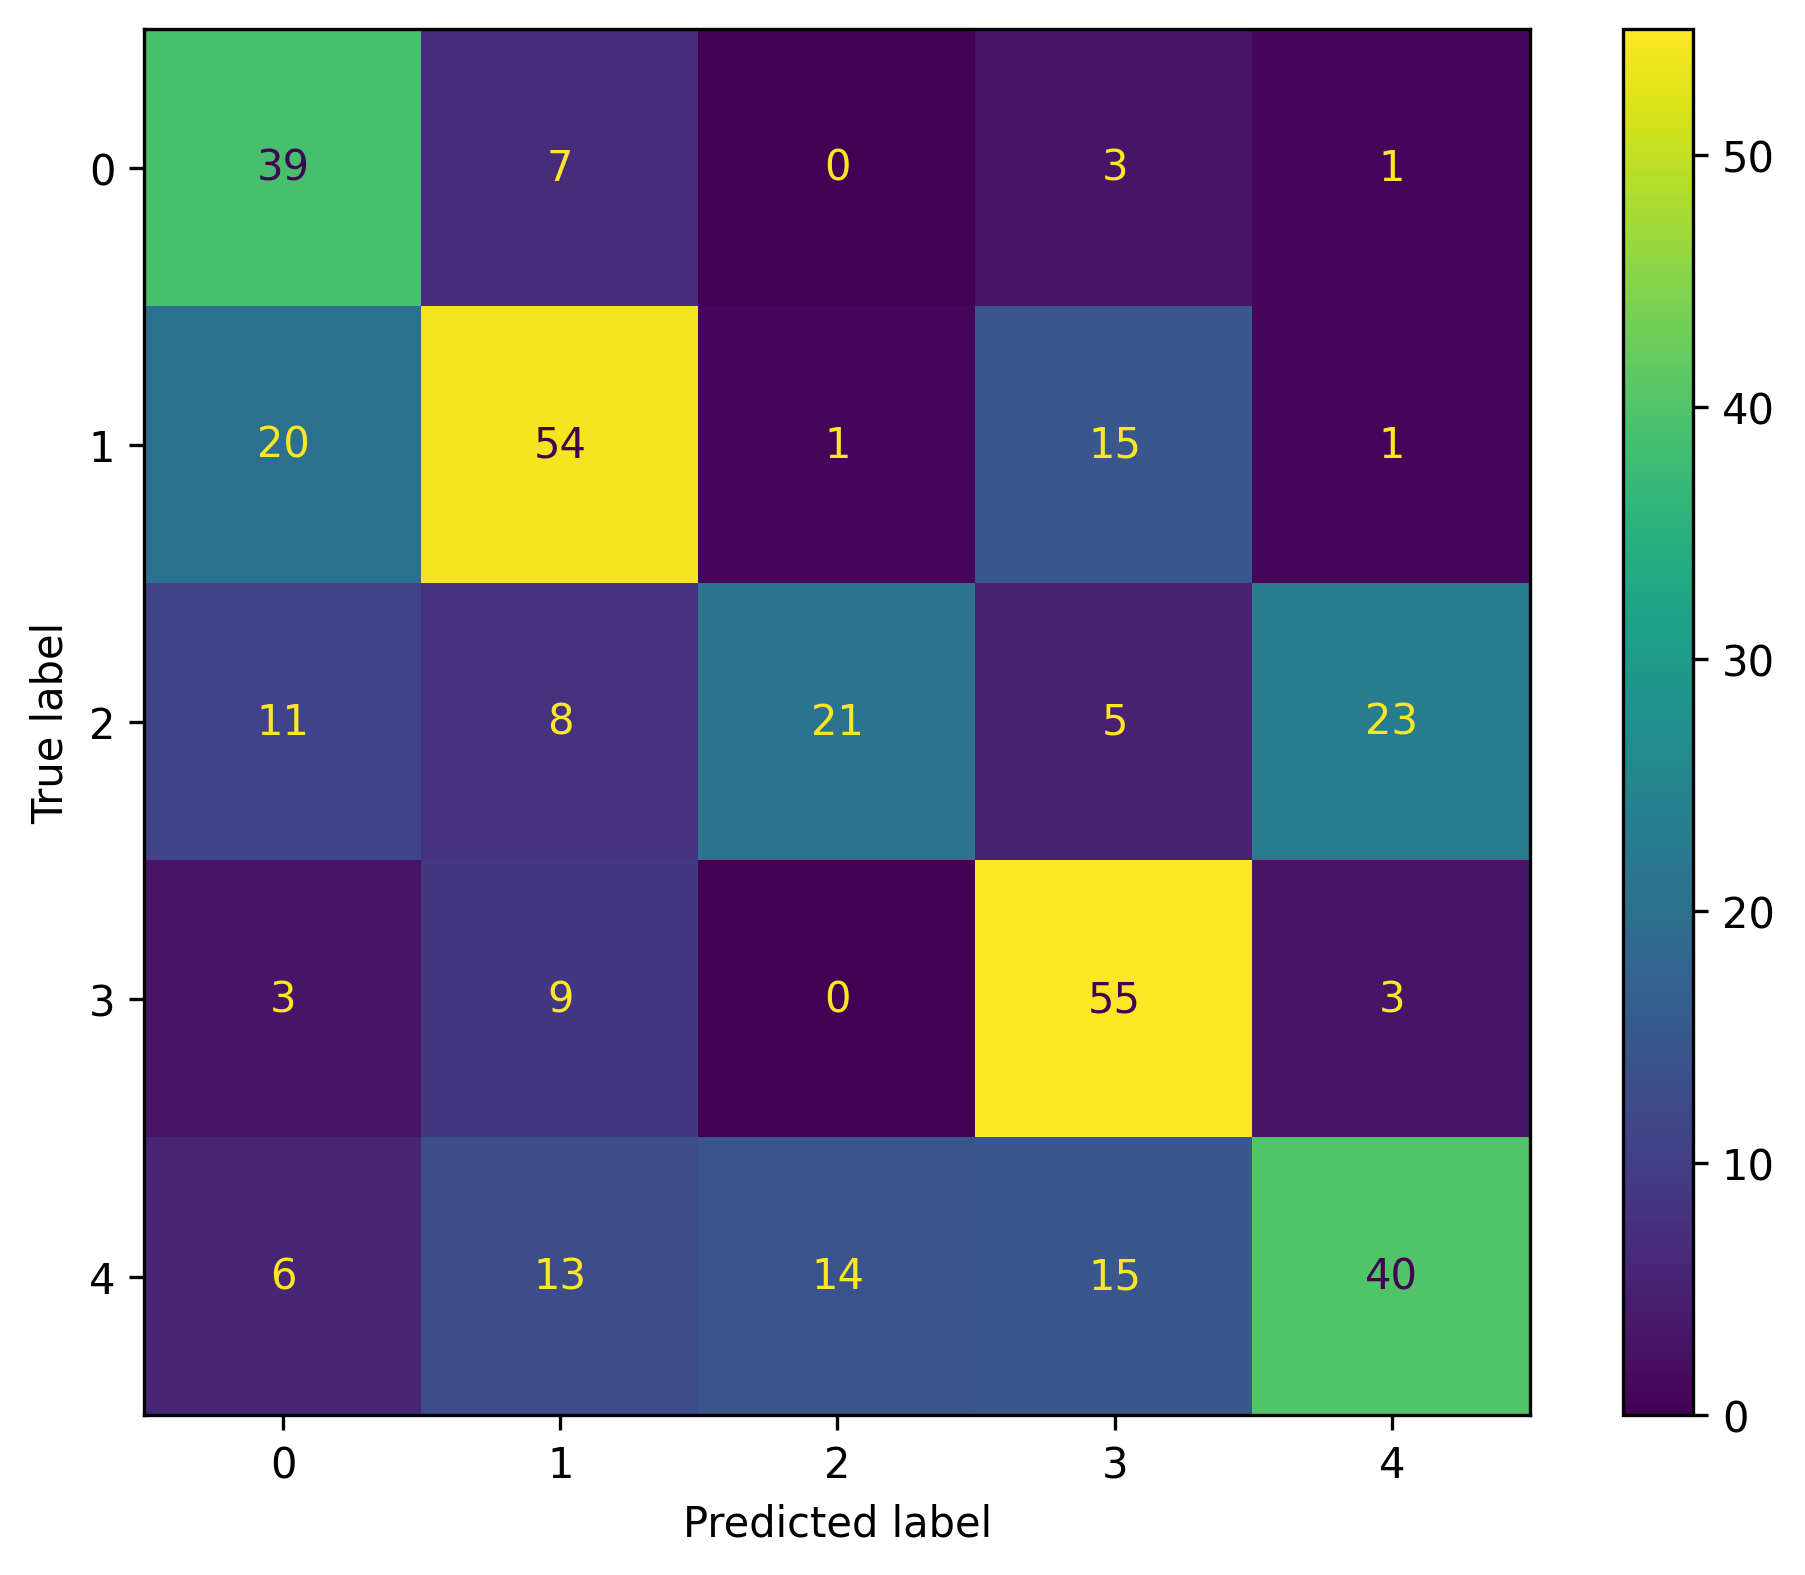

              precision    recall  f1-score   support

           0       0.49      0.78      0.60        50
           1       0.59      0.59      0.59        91
           2       0.58      0.31      0.40        68
           3       0.59      0.79      0.67        70
           4       0.59      0.45      0.51        88

    accuracy                           0.57       367
   macro avg       0.57      0.58      0.56       367
weighted avg       0.58      0.57      0.56       367



In [42]:
# Creating an instance of the Sequential class.

model = Sequential()
# Adding the first Convolutional layer. 

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding= "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Adding a pooling layer 

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applyig Batch normalisation to the pooling layer. 

model.add(BatchNormalization(momentum = 0.9))

# Adding a second convolutional layer

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second average pooling layer

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer

model.add(BatchNormalization(momentum = 0.9))

# Adding a third convolutional layer, now with 128 filters

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Adding a third average pooling layer

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Applying Batch normalisation to the pooling layer

model.add(BatchNormalization(momentum = 0.9))

# Flattening the output to a 1-dimensional array,

model.add(Flatten())

# Adding a Dense (i.e. fully connected) layer with 64 neurons and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Applying a dropout rate of 50% to the dense layer

model.add(Dropout(0.5))

model.add(Dense(5, activation = 'softmax'))

# Printing a summary of the model

model.summary()

# Creating an instance of the Adam class, and setting the learning rate.

adam_optimizer = Adam(learning_rate = 0.01)

# Compiling the model

model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Defining the batch size

batch_size = 128
# Fitting the model, and record the history of the fit.

history = model.fit(train_datagen.flow(x_train_norm, y_train_flower, batch_size = batch_size, subset = "training"), epochs = 20,validation_data = train_datagen.flow(x_train_norm,y_train_flower, batch_size = batch_size, subset = "validation"))

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Plotting the training and validation losses versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot.

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Showing the plot.

plt.show()

# Plotting the training and validation accuracy versus epoch

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Showing the plot

plt.show()

# Using the trained model to predict output classes in the test set

y_pred = model.predict(x_test_norm)

# Selecting the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Creating the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Creating the figure and axes

plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels =display_labels)
disp.plot(ax = ax)

# Showing the plot

plt.show()


# Importing the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Printing the classification report, using the predicted class labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))